In [2]:
# IMPORTO LAS LIBRERÍAS A UTILIZAR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# LLAMO A LAS DISTINTAS BASES DE DATOS
vaccination_coverage = pd.read_csv("Global vaccination coverage.csv")
life_expectancy = pd.read_csv("Life expectancy.csv")
child_mortality = pd.read_csv("Under five mortality rate.csv")
preventable_deaths_1 = pd.read_csv("Deaths vaccines could have prevented 1.csv")
preventable_deaths_2 = pd.read_csv("Deaths vaccines could have prevented 2.csv")
literacy = pd.read_csv("Literacy.csv")
gdp = pd.read_csv("Gross Domestic Product.csv")

VACCINATION_COVERAGE

In [ ]:
# EXPLORO EL DATAFRAME VACCINATION_COVERAGE
print(vaccination_coverage.head(10000))
print(vaccination_coverage.info())

for column in vaccination_coverage.columns:
    print(f"Columna: {column}")
    print(vaccination_coverage[column].unique())
    print("-" * 40) # Separa entre columna y columna.

vaccination_coverage.isna().sum()

,Entity,Code,Year,Share of one-year-olds who have received three doses of Hepatitis B containing vaccine (HEPB3),Share of one-year-olds who have received three doses of Haemophilus influenzae type b containing vaccine (HIB3),Share of one-year-olds who have received their first dose of inactivated polio containing vaccine (IPV1),Share of one-year-olds who have received their first dose of measles-containing vaccine (MCV1),Share of one-year-olds who have received their pneumococcal conjugate vaccine 3rd dose (PCV3),Share of one-year-olds who have received their third dose of either oral or inactivated polio vaccine (POL3),Share of one-year-olds who have received one dose of rubella-containing vaccine (RCV1),Share of one-year-olds who have received their final recommended dose (2nd or 3rd) of rotavirus vaccine (ROTAC),Share of one-year-olds who have received one dose of yellow fever vaccine (YFV),"Share of one-year-olds who have received three doses of combined diphtheria, tetanus toxoid and pertussis-containing vaccine (DTP3)"
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,NaN,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8766,Zimbabwe,ZWE,1990,NaN,NaN,NaN,87.0,NaN,89.0,NaN,NaN,NaN,88.0
8767,Zimbabwe,ZWE,1991,NaN,NaN,NaN,87.0,NaN,88.0,NaN,NaN,NaN,87.0
8768,Zimbabwe,ZWE,1992,NaN,NaN,NaN,86.0,NaN,86.0,NaN,NaN,NaN,86.0
8769,Zimbabwe,ZWE,1993,NaN,NaN,NaN,86.0,NaN,85.0,NaN,NaN,NaN,85.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 13 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   Entity                                                                                                                               8771 non-null   object 
 1   Code                                                                                                                                 8023 non-null   object 
 2   Year                                                                                                                                 8771 non-null   int64  
 3   Share of one-year-olds who have received three doses of Hepatitis B containing

None

Columna: Entity
['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Asia and the Pacific (UNICEF)'
 'East Timor' 'Eastern Mediterranean (WHO)'
 'Eastern and Southern Africa (UNICEF)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'European Region (WHO)' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala

Entity                                                                                                                                    0
Code                                                                                                                                    748
Year                                                                                                                                      0
Share of one-year-olds who have received three doses of Hepatitis B containing vaccine (HEPB3)                                         3510
Share of one-year-olds who have received three doses of Haemophilus influenzae type b containing vaccine (HIB3)                        4366
Share of one-year-olds who have received their first dose of inactivated polio containing vaccine (IPV1)                               6971
Share of one-year-olds who have received their first dose of measles-containing vaccine (MCV1)                                          155
Share of one-year-ol

In [14]:
# ELIMINO LAS FILAS DE GEOGRAFÍAS REPETIDAS

repeated_geographies = ['African Region (WHO)', 'Central African Republic', 'East Asia and the Pacific (UNICEF)', 
    'Eastern Mediterranean (WHO)', 'Eastern and Southern Africa (UNICEF)', 'European Region (WHO)', 
    'High-income countries', 'Latin America and the Caribbean (UNICEF)', 'Low-income countries', 
    'Lower-middle-income countries', 'Middle East and North Africa (UNICEF)', 'Middle-income countries', 
    'Region of the Americas (WHO)', 'South Asia (UNICEF)', 'South-East Asia Region (WHO)', 
    'Upper-middle-income countries', 'West and Central Africa (UNICEF)', 'Western Pacific Region (WHO)', 
    'World']
vaccination_coverage = vaccination_coverage[~vaccination_coverage['Entity'].isin(repeated_geographies)]

# CAMBIO EL NOMBRE DE LA COLUMNA "ENTITY" A "COUNTRY"
vaccination_coverage.rename(columns={"Entity": "Country"}, inplace=True)

# ELIMINO LA COLUMNA "CODE"
vaccination_coverage.drop(columns=["Code"], inplace=True)

# TRADUZCO Y REEMPLAZO LOS NOMBRES DE LOS PAÍSES Y DE LAS COLUMNAS AL ESPAÑOL
country_translation_dict = {
    'Afghanistan': 'Afganistán', 'Albania': 'Albania', 'Algeria': 'Argelia', 'Andorra': 'Andorra', 'Angola': 'Angola',
    'Antigua and Barbuda': 'Antigua y Barbuda', 'Argentina': 'Argentina', 'Armenia': 'Armenia', 'Australia': 'Australia', 'Austria': 'Austria',
    'Azerbaijan': 'Azerbaiyán', 'Bahamas': 'Bahamas', 'Bahrain': 'Baréin', 'Bangladesh': 'Bangladesh', 'Barbados': 'Barbados', 'Belarus': 'Bielorrusia',
    'Belgium': 'Bélgica', 'Belize': 'Belice', 'Benin': 'Benín', 'Bhutan': 'Bután', 'Bolivia': 'Bolivia', 'Bosnia and Herzegovina': 'Bosnia y Herzegovina',
    'Botswana': 'Botsuana', 'Brazil': 'Brasil', 'Brunei': 'Brunéi', 'Bulgaria': 'Bulgaria', 'Burkina Faso': 'Burkina Faso', 'Burundi': 'Burundi',
    'Cambodia': 'Camboya', 'Cameroon': 'Camerún', 'Canada': 'Canadá', 'Cape Verde': 'Cabo Verde', 'Chad': 'Chad', 'Chile': 'Chile', 'China': 'China',
    'Colombia': 'Colombia', 'Comoros': 'Comoras', 'Congo': 'Congo', 'Cook Islands': 'Islas Cook', 'Costa Rica': 'Costa Rica', "Cote d'Ivoire": 'Costa de Marfil',
    'Croatia': 'Croacia', 'Cuba': 'Cuba', 'Cyprus': 'Chipre', 'Czechia': 'República Checa', 'Democratic Republic of Congo': 'República Democrática del Congo',
    'Denmark': 'Dinamarca', 'Djibouti': 'Yibuti', 'Dominica': 'Dominica', 'Dominican Republic': 'República Dominicana', 'East Timor': 'Timor Oriental',
    'Ecuador': 'Ecuador', 'Egypt': 'Egipto', 'El Salvador': 'El Salvador', 'Equatorial Guinea': 'Guinea Ecuatorial', 'Eritrea': 'Eritrea', 'Estonia': 'Estonia',
    'Eswatini': 'Eswatini', 'Ethiopia': 'Etiopía', 'Fiji': 'Fiyi', 'Finland': 'Finlandia', 'France': 'Francia', 'Gabon': 'Gabón', 'Gambia': 'Gambia',
    'Georgia': 'Georgia', 'Germany': 'Alemania', 'Ghana': 'Ghana', 'Greece': 'Grecia', 'Grenada': 'Granada', 'Guatemala': 'Guatemala', 'Guinea': 'Guinea',
    'Guinea-Bissau': 'Guinea-Bisáu', 'Guyana': 'Guyana', 'Haiti': 'Haití', 'Honduras': 'Honduras', 'Hungary': 'Hungría', 'Iceland': 'Islandia', 'India': 'India',
    'Indonesia': 'Indonesia', 'Iran': 'Irán', 'Iraq': 'Irak', 'Ireland': 'Irlanda', 'Israel': 'Israel', 'Italy': 'Italia', 'Jamaica': 'Jamaica', 'Japan': 'Japón',
    'Jordan': 'Jordania', 'Kazakhstan': 'Kazajistán', 'Kenya': 'Kenia', 'Kiribati': 'Kiribati', 'Kuwait': 'Kuwait', 'Kyrgyzstan': 'Kirguistán', 'Laos': 'Laos',
    'Latvia': 'Letonia', 'Lebanon': 'Líbano', 'Lesotho': 'Lesoto', 'Liberia': 'Liberia', 'Libya': 'Libia', 'Lithuania': 'Lituania', 'Luxembourg': 'Luxemburgo',
    'Madagascar': 'Madagascar', 'Malawi': 'Malaui', 'Malaysia': 'Malasia', 'Maldives': 'Maldivas', 'Mali': 'Malí', 'Malta': 'Malta',
    'Marshall Islands': 'Islas Marshall', 'Mauritania': 'Mauritania', 'Mauritius': 'Mauricio', 'Mexico': 'México',
    'Micronesia (country)': 'Micronesia', 'Moldova': 'Moldavia', 'Monaco': 'Mónaco', 'Mongolia': 'Mongolia', 'Montenegro': 'Montenegro',
    'Morocco': 'Marruecos', 'Mozambique': 'Mozambique', 'Myanmar': 'Birmania', 'Namibia': 'Namibia', 'Nauru': 'Naurú', 'Nepal': 'Nepal', 'Netherlands': 'Países Bajos',
    'New Zealand': 'Nueva Zelanda', 'Nicaragua': 'Nicaragua', 'Niger': 'Níger', 'Nigeria': 'Nigeria', 'Niue': 'Niue', 'North Korea': 'Corea del Norte',
    'North Macedonia': 'Macedonia del Norte', 'Norway': 'Noruega', 'Oman': 'Omán', 'Pakistan': 'Pakistán', 'Palau': 'Palau', 'Palestine': 'Palestina', 'Panama': 'Panamá',
    'Papua New Guinea': 'Papúa Nueva Guinea', 'Paraguay': 'Paraguay', 'Peru': 'Perú', 'Philippines': 'Filipinas', 'Poland': 'Polonia', 'Portugal': 'Portugal',
    'Qatar': 'Catar', 'Romania': 'Rumanía', 'Russia': 'Rusia', 'Rwanda': 'Ruanda', 'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 'Saint Lucia': 'Santa Lucía',
    'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas', 'Samoa': 'Samoa', 'San Marino': 'San Marino',
    'Sao Tome and Principe': 'Santo Tomé y Príncipe', 'Saudi Arabia': 'Arabia Saudita', 'Senegal': 'Senegal', 'Serbia': 'Serbia', 'Seychelles': 'Seychelles',
    'Sierra Leone': 'Sierra Leona', 'Singapore': 'Singapur', 'Slovakia': 'Eslovaquia', 'Slovenia': 'Eslovenia', 'Solomon Islands': 'Islas Salomón',
    'Somalia': 'Somalia', 'South Africa': 'Sudáfrica', 'South Korea': 'Corea del Sur', 'South Sudan': 'Sudán del Sur', 'Spain': 'España', 'Sri Lanka': 'Sri Lanka',
    'Sudan': 'Sudán', 'Suriname': 'Surinam', 'Sweden': 'Suecia', 'Switzerland': 'Suiza', 'Syria': 'Siria', 'Tajikistan': 'Tayikistán', 'Tanzania': 'Tanzania',
    'Thailand': 'Tailandia', 'Togo': 'Togo', 'Tonga': 'Tonga', 'Trinidad and Tobago': 'Trinidad y Tobago', 'Tunisia': 'Túnez', 'Turkey': 'Turquía',
    'Turkmenistan': 'Turkmenistán', 'Tuvalu': 'Tuvalu', 'Uganda': 'Uganda', 'Ukraine': 'Ucrania', 'United Arab Emirates': 'Emiratos Árabes Unidos',
    'United Kingdom': 'Reino Unido', 'United States': 'Estados Unidos', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistán', 'Vanuatu': 'Vanuatu',
    'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam', 'Yemen': 'Yemen', 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabue'
}
vaccination_coverage['Country'] = vaccination_coverage['Country'].replace(country_translation_dict)
vaccination_coverage.columns = [
    'País',
    'Año',
    'Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)',
    'Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3)',
    'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)',
    'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1)',
    'Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3)',
    'Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3)',
    'Porcentaje de niños de un año que han recibido una dosis de vacuna contra la rubéola (RCV1)',
    'Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC)',
    'Porcentaje de niños de un año que han recibido una dosis de vacuna contra la fiebre amarilla (YFV)',
    'Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)'
]

In [ ]:
# EXPLORO EL DATAFRAME VACCINATION_COVERAGE NUEVAMENTE PARA CHEQUEAR QUE ESTÉ LIMPIO

print(vaccination_coverage.head(10000))
print(vaccination_coverage.info())

for column in vaccination_coverage.columns:
    print(f"Columna: {column}")
    print(vaccination_coverage[column].unique())
    print("-" * 40) # Separa entre columna y columna.

,País,Año,Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3),Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3),Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1),Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1),Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3),Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3),Porcentaje de niños de un año que han recibido una dosis de vacuna contra la rubéola (RCV1),Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC),Porcentaje de niños de un año que han recibido una dosis de vacuna contra la fiebre amarilla (YFV),"Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)"
0,Afganistán,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,NaN,63.0
1,Afganistán,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,NaN,64.0
2,Afganistán,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,NaN,63.0
3,Afganistán,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,NaN,66.0
4,Afganistán,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,NaN,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8766,Zimbabue,1990,NaN,NaN,NaN,87.0,NaN,89.0,NaN,NaN,NaN,88.0
8767,Zimbabue,1991,NaN,NaN,NaN,87.0,NaN,88.0,NaN,NaN,NaN,87.0
8768,Zimbabue,1992,NaN,NaN,NaN,86.0,NaN,86.0,NaN,NaN,NaN,86.0
8769,Zimbabue,1993,NaN,NaN,NaN,86.0,NaN,85.0,NaN,NaN,NaN,85.0


<class 'pandas.core.frame.DataFrame'>
Index: 7935 entries, 0 to 8770
Data columns (total 12 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   País                                                                                                                                7935 non-null   object 
 1   Año                                                                                                                                 7935 non-null   int64  
 2   Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)                                   4544 non-null   float64
 3   Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus i

None

Columna: País
['Afganistán' 'Albania' 'Argelia' 'Andorra' 'Angola' 'Antigua y Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaiyán' 'Bahamas'
 'Baréin' 'Bangladesh' 'Barbados' 'Bielorrusia' 'Bélgica' 'Belice' 'Benín'
 'Bután' 'Bolivia' 'Bosnia y Herzegovina' 'Botsuana' 'Brasil' 'Brunéi'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Camboya' 'Camerún' 'Canadá'
 'Cabo Verde' 'Chad' 'Chile' 'China' 'Colombia' 'Comoras' 'Congo'
 'Islas Cook' 'Costa Rica' 'Costa de Marfil' 'Croacia' 'Cuba' 'Chipre'
 'República Checa' 'República Democrática del Congo' 'Dinamarca' 'Yibuti'
 'Dominica' 'República Dominicana' 'Timor Oriental' 'Ecuador' 'Egipto'
 'El Salvador' 'Guinea Ecuatorial' 'Eritrea' 'Estonia' 'Eswatini'
 'Etiopía' 'Fiyi' 'Finlandia' 'Francia' 'Gabón' 'Gambia' 'Georgia'
 'Alemania' 'Ghana' 'Grecia' 'Granada' 'Guatemala' 'Guinea' 'Guinea-Bisáu'
 'Guyana' 'Haití' 'Honduras' 'Hungría' 'Islandia' 'India' 'Indonesia'
 'Irán' 'Irak' 'Irlanda' 'Israel' 'Italia' 'Jamaica' 'Japón' 'Jordania'
 

In [ ]:
# EXPORTO EL DATAFRAME A CSV, PUES ASÍ COMO ESTÁ YA SIRVE PARA VISUALIZAR EN POWER BI
# vaccination_coverage.to_csv('vaccination_coverage_processed.csv', index=False)

In [15]:
# HAGO ANÁLISIS ESTADÍSTICO DESCRIPTIVO 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

vaccines_columns = vaccination_coverage.columns.difference(['País', 'Año'])
vaccination_coverage_mean = vaccination_coverage[vaccines_columns].mean()
vaccination_coverage_median = vaccination_coverage[vaccines_columns].median()
vaccination_coverage_mode = vaccination_coverage[vaccines_columns].mode().iloc[0]
vaccination_coverage_std = vaccination_coverage[vaccines_columns].std()
vaccination_coverage_var = vaccination_coverage[vaccines_columns].var()
vaccination_coverage_percentile_25 = vaccination_coverage[vaccines_columns].quantile(0.25)
vaccination_coverage_percentile_50 = vaccination_coverage[vaccines_columns].quantile(0.50)
vaccination_coverage_percentile_75 = vaccination_coverage[vaccines_columns].quantile(0.75)
vaccination_coverage_min = vaccination_coverage[vaccines_columns].min()
vaccination_coverage_max = vaccination_coverage[vaccines_columns].max()
vaccination_coverage_range = vaccination_coverage_max - vaccination_coverage_min

print(f"La media para cada vacuna es:\n{vaccination_coverage_mean}\n")
print(f"La mediana para cada vacuna es:\n{vaccination_coverage_median}\n")
print(f"La moda para cada vacuna es:\n{vaccination_coverage_mode}\n")
print(f"La desviación estándar para cada vacuna es:\n{vaccination_coverage_std}\n")
print(f"La varianza para cada vacuna es:\n{vaccination_coverage_var}\n")
print(f"El percentil 25 para cada vacuna es:\n{vaccination_coverage_percentile_25}\n")
print(f"El percentil 50 para cada vacuna es:\n{vaccination_coverage_percentile_50}\n")
print(f"El percentil 75 para cada vacuna es:\n{vaccination_coverage_percentile_75}\n")
print(f"El valor mínimo para cada vacuna es:\n{vaccination_coverage_min}\n")
print(f"El valor máximo para cada vacuna es:\n{vaccination_coverage_max}\n")
print(f"El rango para cada vacuna es:\n{vaccination_coverage_range}\n")

La media para cada vacuna es:
Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3)                        80.720165
Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC)             75.342173
Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1)                                  79.231362
Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)                   84.842234
Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3)            80.836051
Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)    80.362636
Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


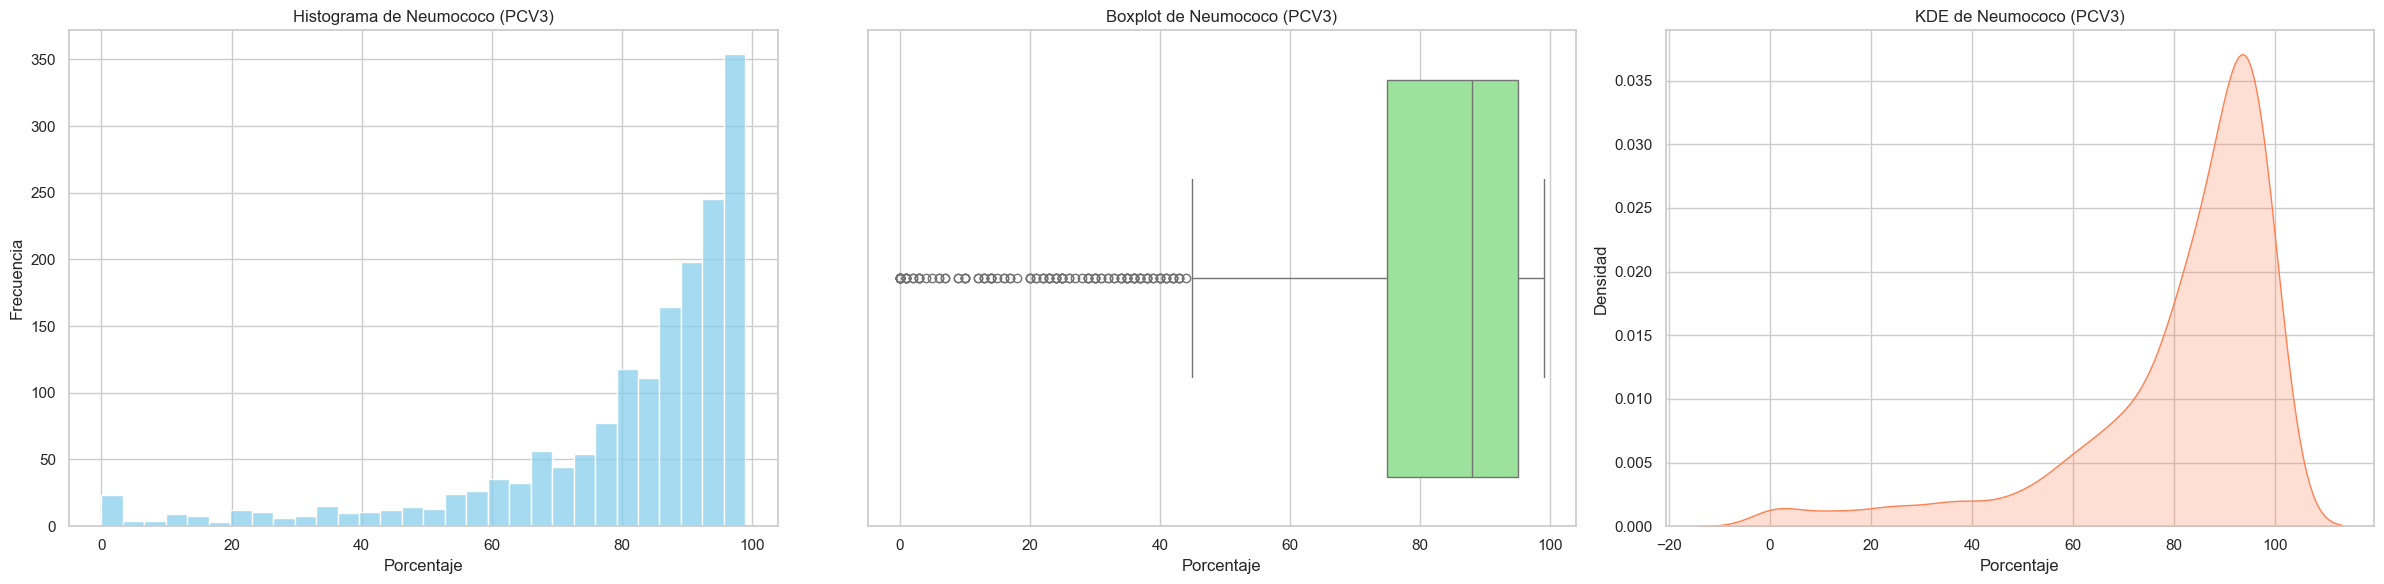

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


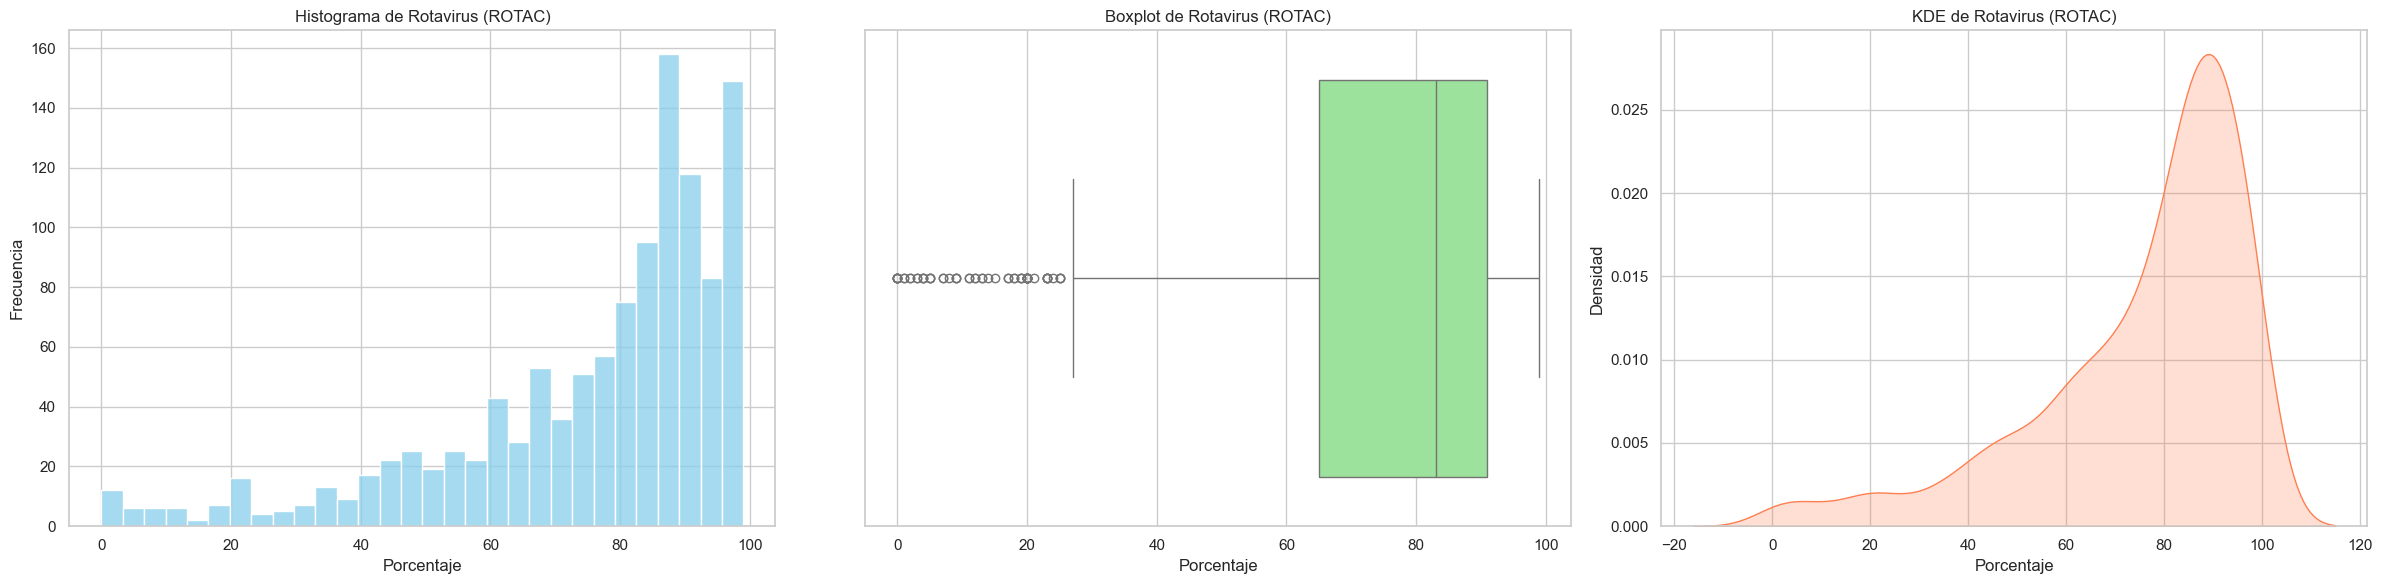

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


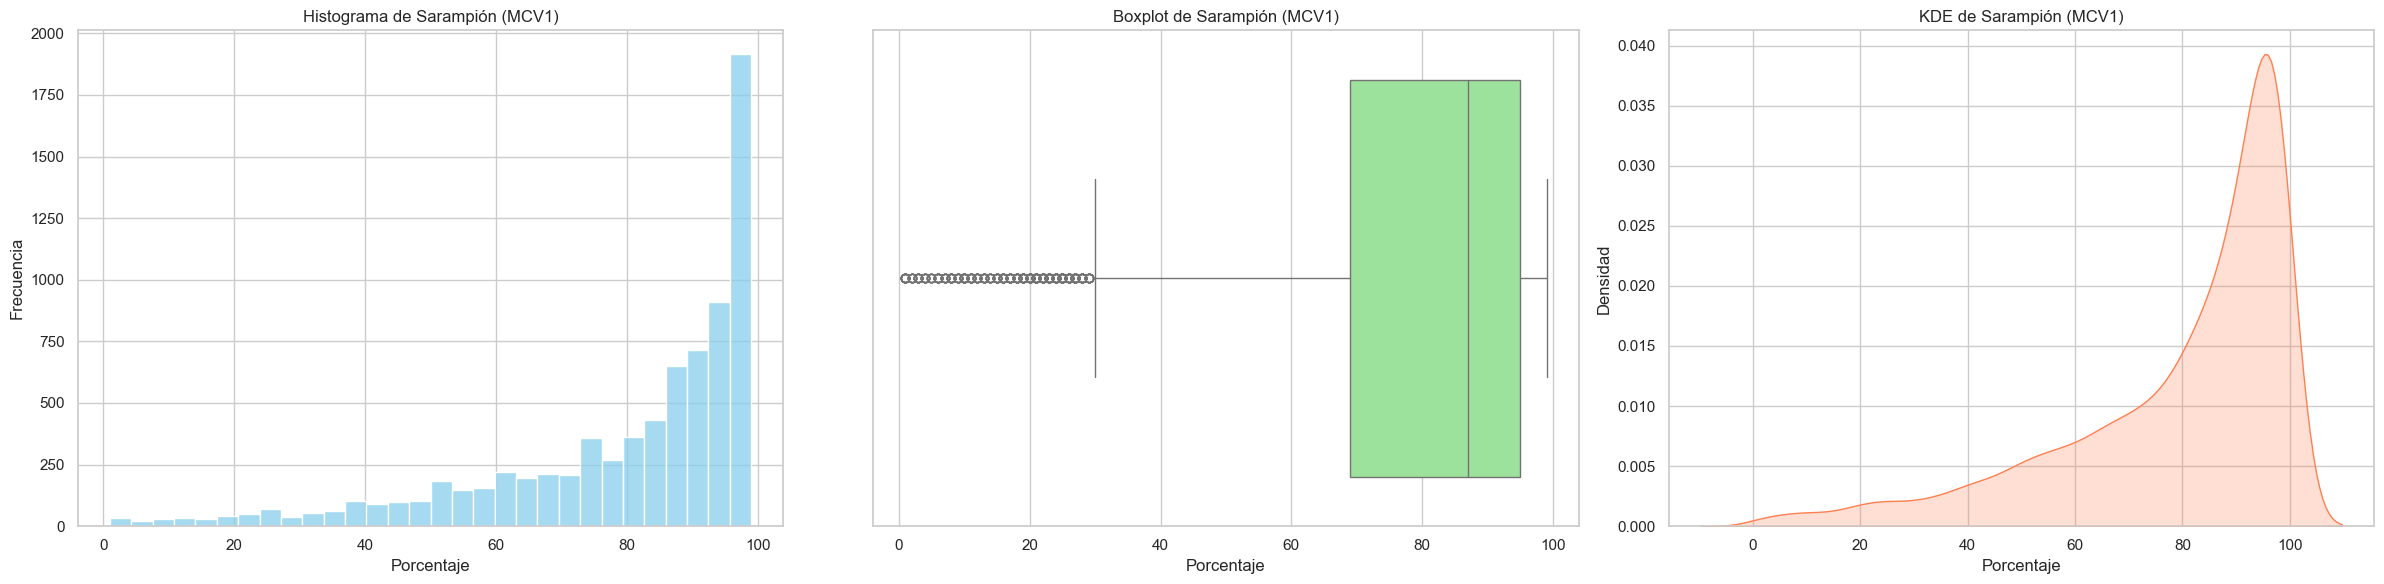

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


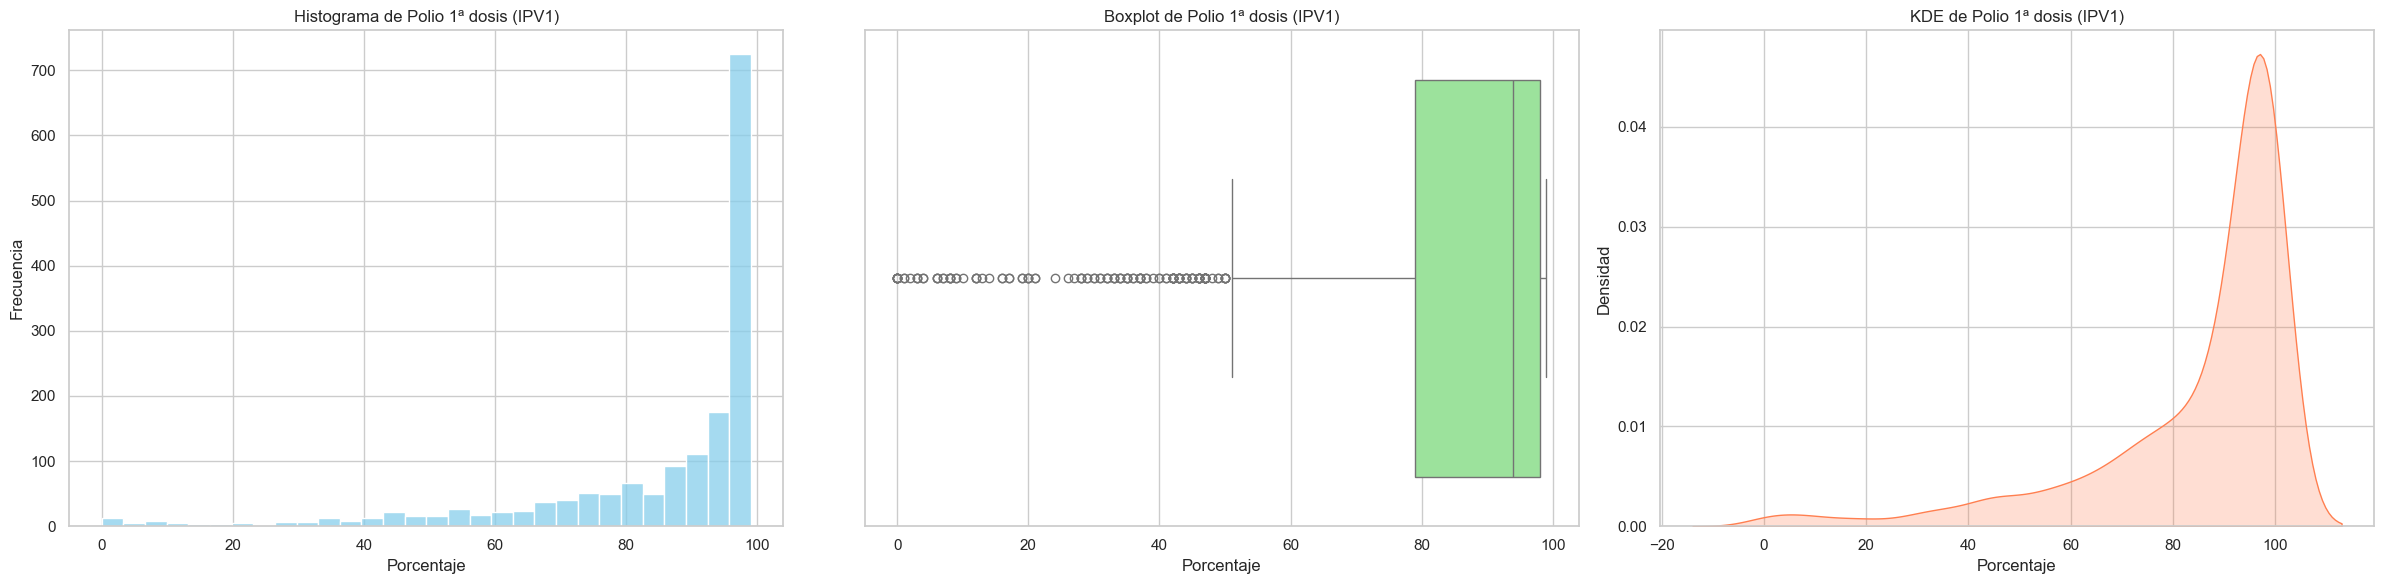

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


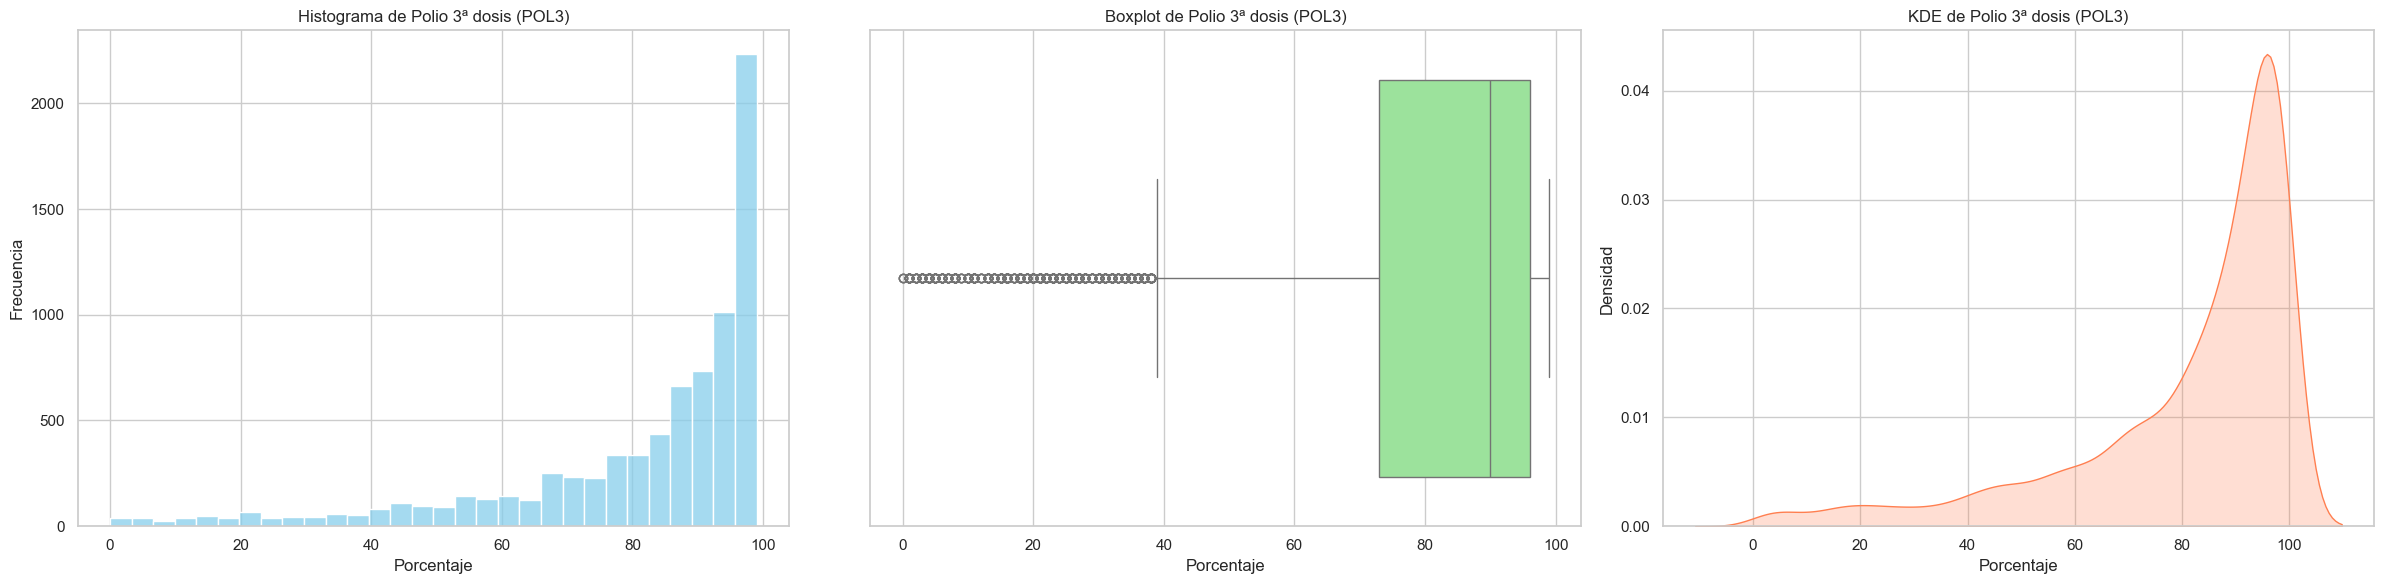

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


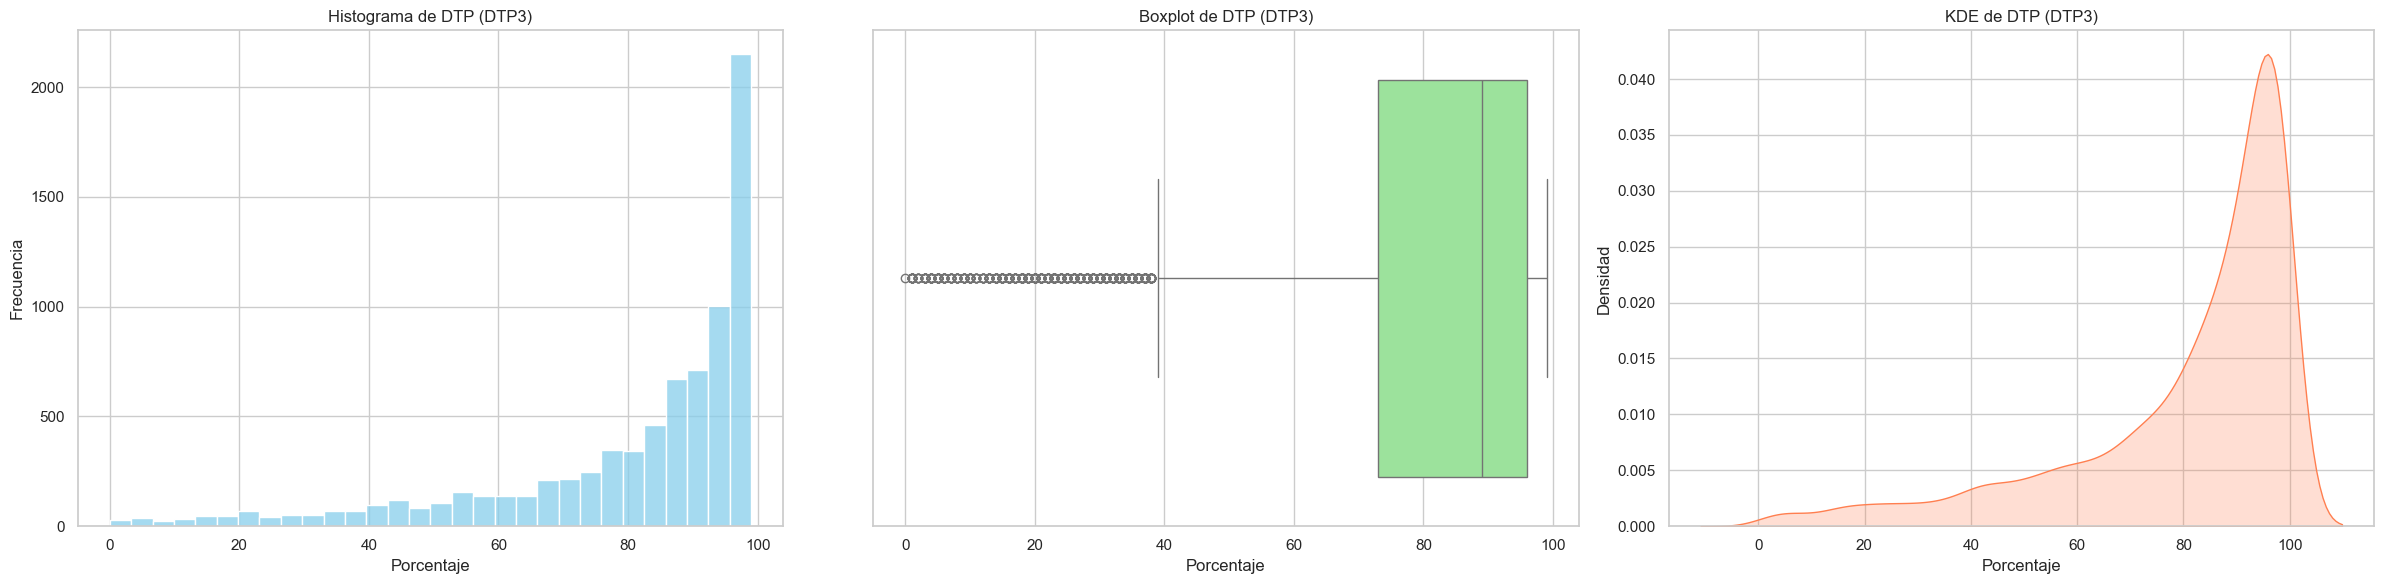

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


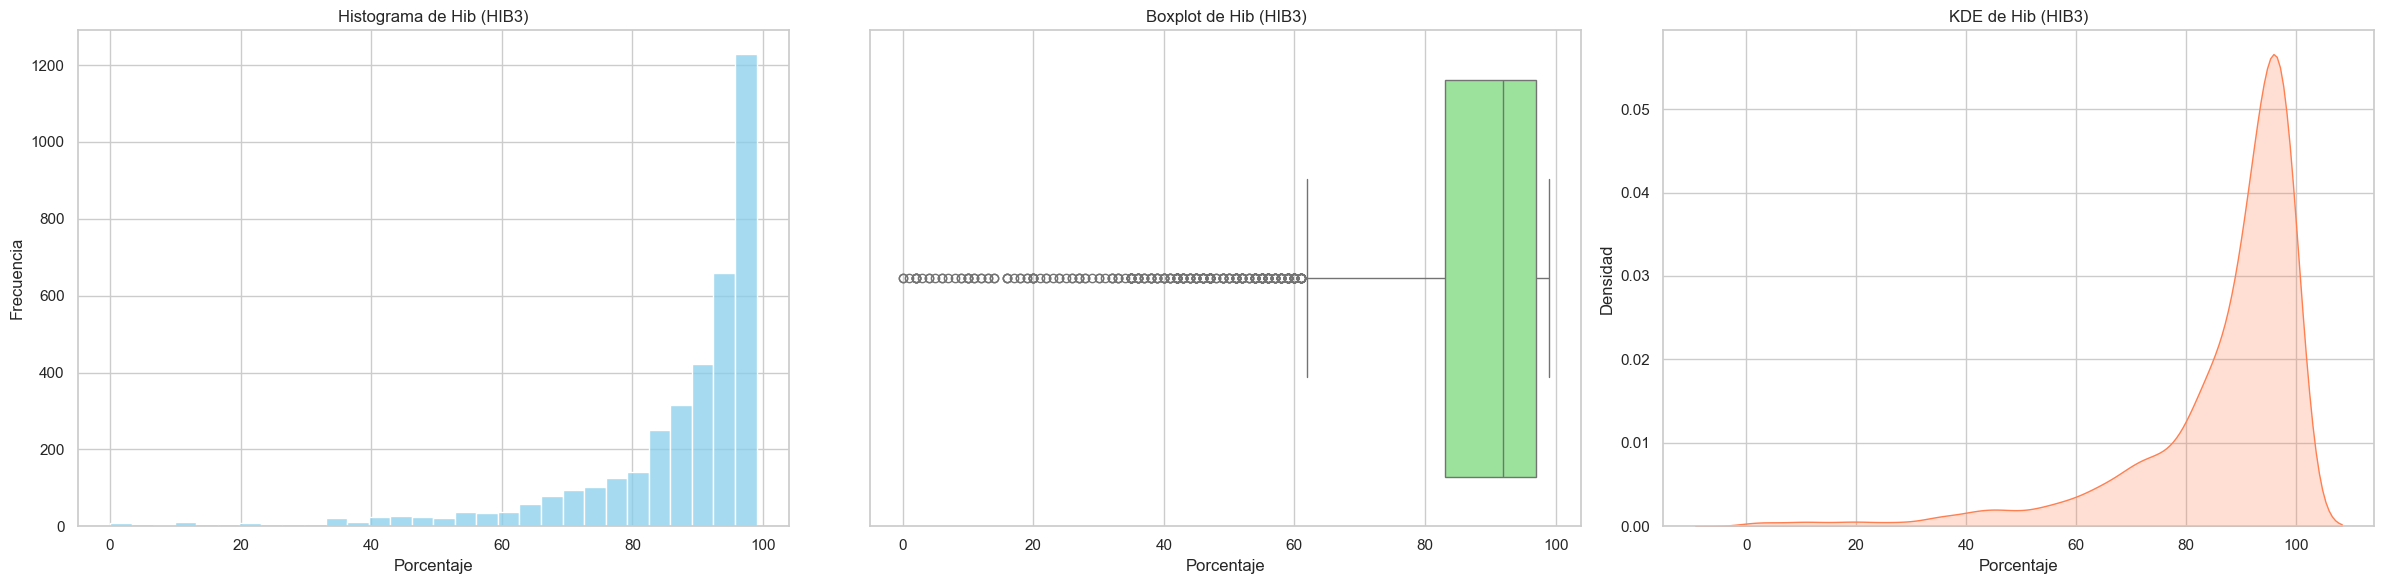

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


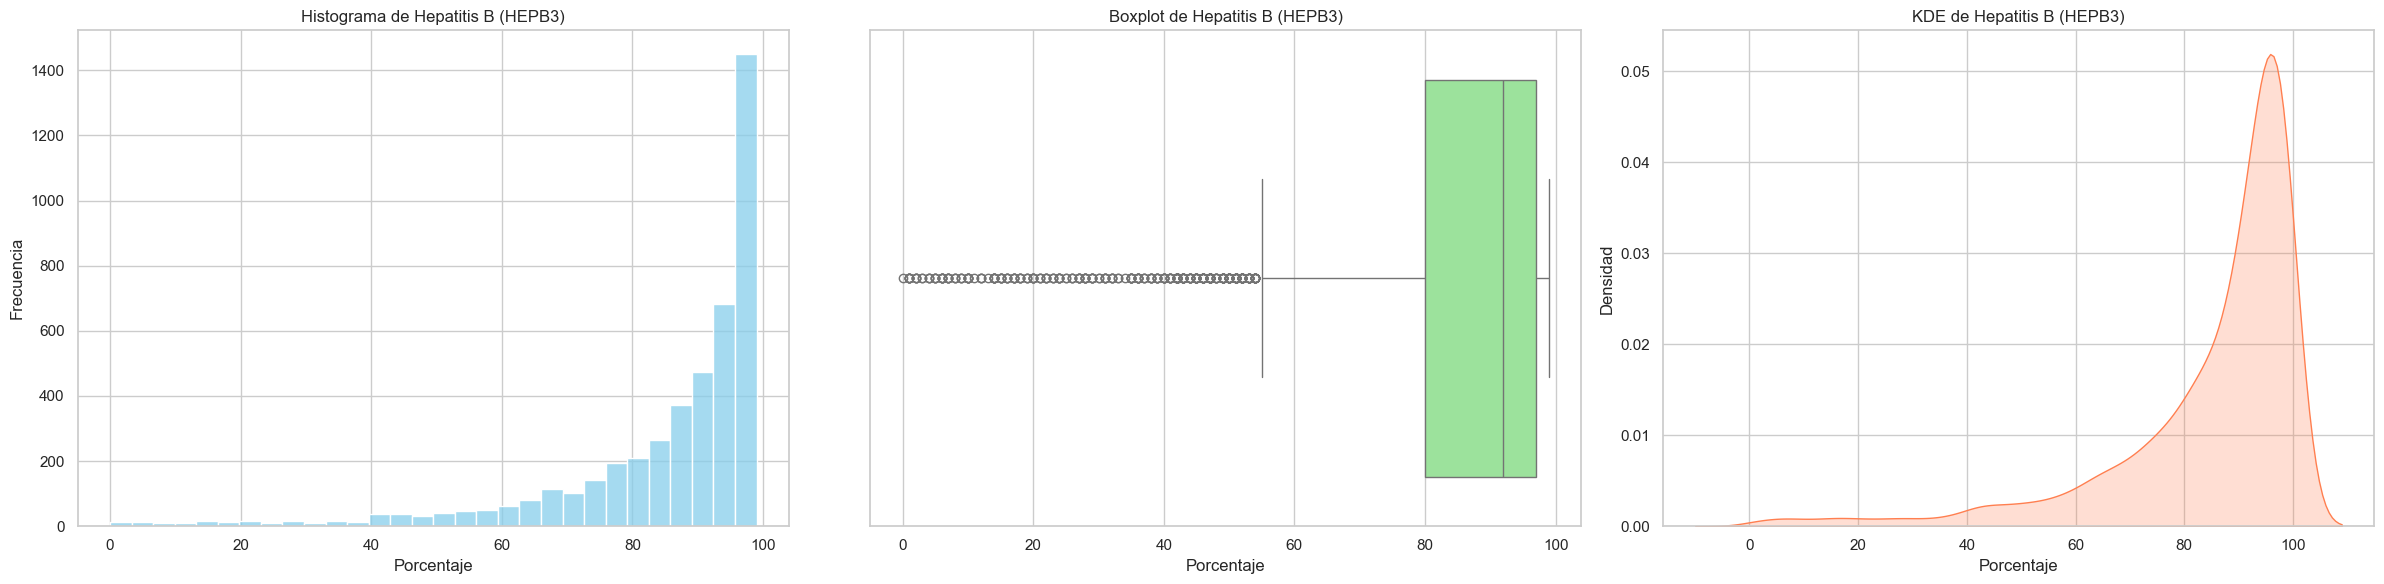

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


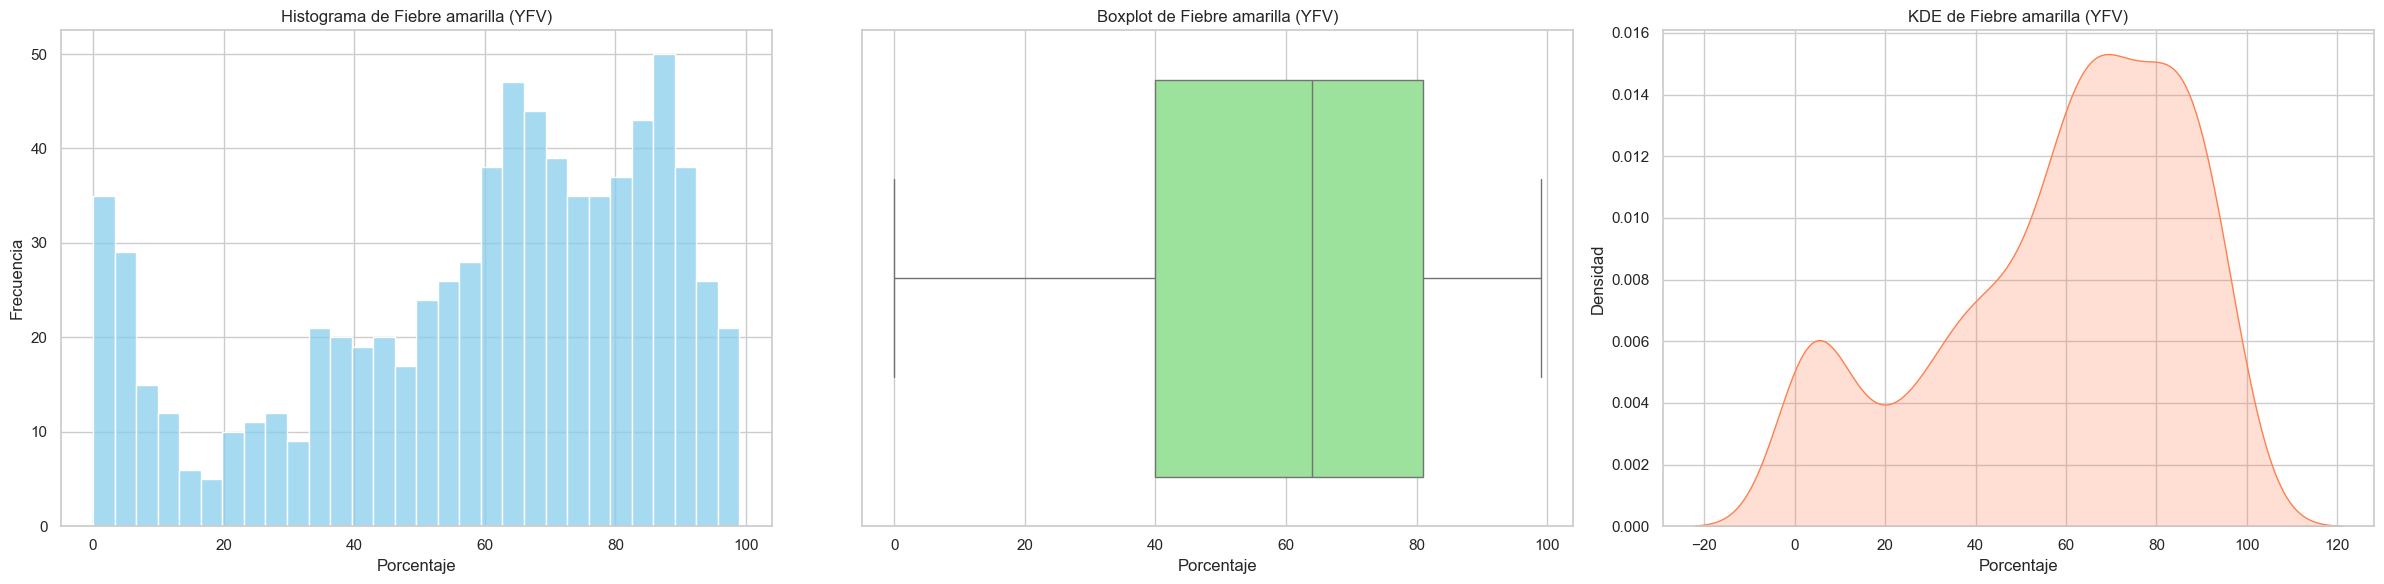

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\3794299840.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")


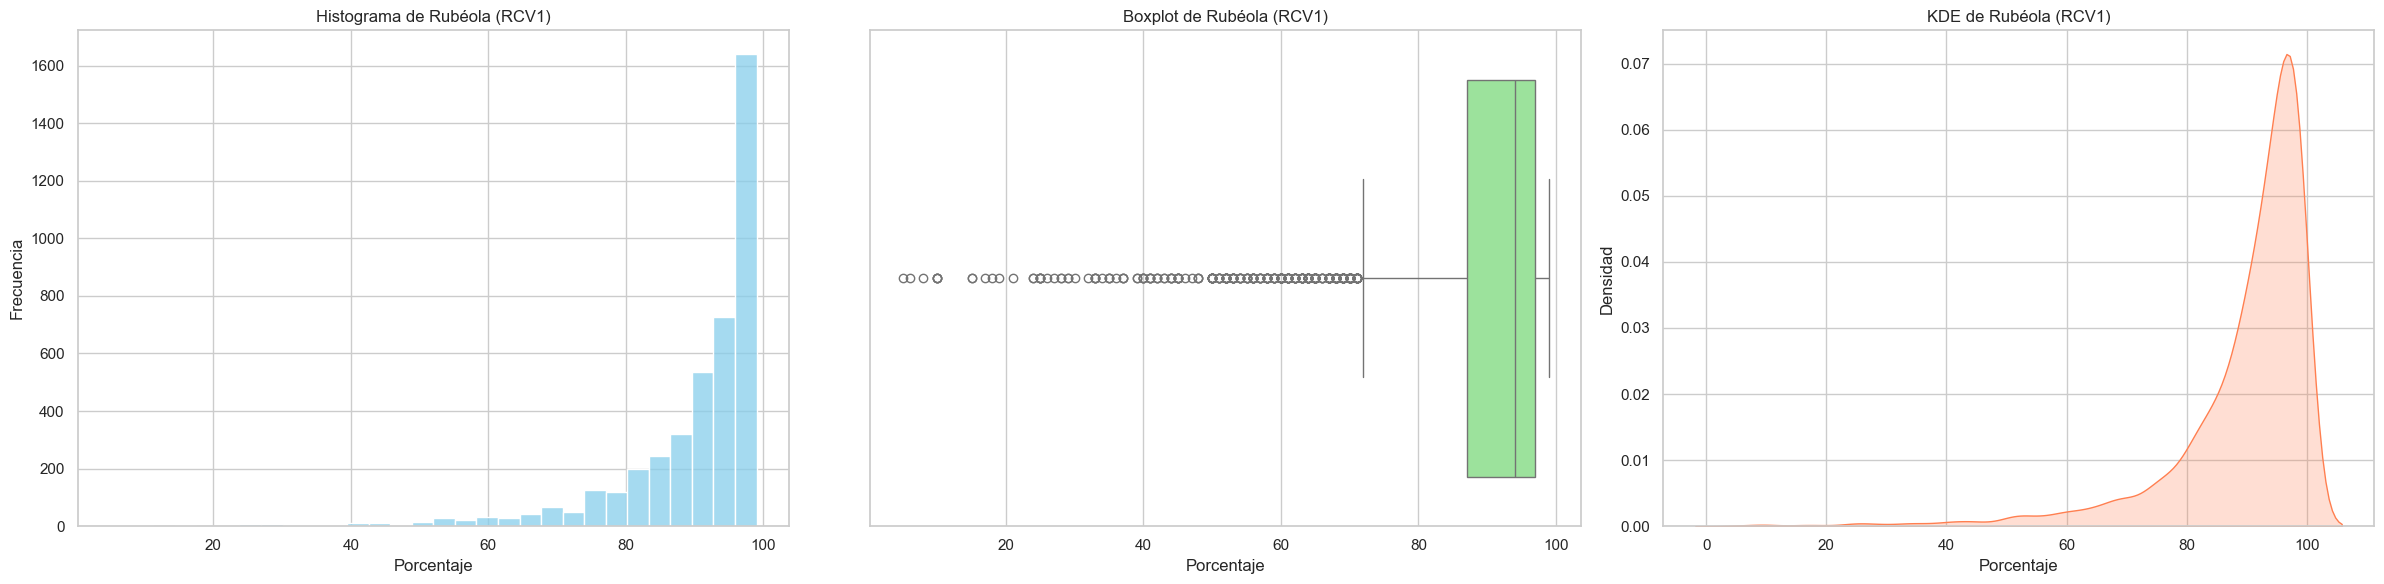

In [ ]:
# GRAFICO HISTOGRAMA, BOXPLOT Y KDE DE CADA VACUNA
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

sns.set(style="whitegrid")

# RENOMBRO PARA QUE LOS TÍTULOS EN LAS GRÁFICAS NO SE SUPERPONGAN
short_names = {
    'Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)': 'Hepatitis B (HEPB3)',
    'Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3)': 'Hib (HIB3)',
    'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)': 'Polio 1ª dosis (IPV1)',
    'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1)': 'Sarampión (MCV1)',
    'Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3)': 'Neumococo (PCV3)',
    'Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3)': 'Polio 3ª dosis (POL3)',
    'Porcentaje de niños de un año que han recibido una dosis de vacuna contra la rubéola (RCV1)': 'Rubéola (RCV1)',
    'Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC)': 'Rotavirus (ROTAC)',
    'Porcentaje de niños de un año que han recibido una dosis de vacuna contra la fiebre amarilla (YFV)': 'Fiebre amarilla (YFV)',
    'Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)': 'DTP (DTP3)',
}

for column in vaccines_columns:
    plt.figure(figsize=(24, 6))

    # HISTOGRAMA
    plt.subplot(1, 3, 1)
    sns.histplot(vaccination_coverage[column], kde=False, color="skyblue", bins=30)
    plt.title(f"Histograma de {short_names[column]}")
    plt.xlabel('Porcentaje')
    plt.ylabel('Frecuencia')

    # BOXPLOT
    plt.subplot(1, 3, 2)
    sns.boxplot(x=vaccination_coverage[column], color="lightgreen")
    plt.title(f"Boxplot de {short_names[column]}")
    plt.xlabel('Porcentaje')

    # KDE
    plt.subplot(1, 3, 3)
    sns.kdeplot(vaccination_coverage[column].dropna(), shade=True, color="coral")
    plt.title(f"KDE de {short_names[column]}")
    plt.xlabel('Porcentaje')
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

In [ ]:
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA LA VACUNA IPV1 PARA EL AÑO 2019 EN TODO EL MUNDO
ipv1 = "Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)"
global_vaccination_2019 = vaccination_coverage[vaccination_coverage['Año'] == 2019]
values_2019 = global_vaccination_2019[ipv1]

print(f"Estadísticas descriptivas globales para '{ipv1}' en 2019:")
print(f"Media: {values_2019.mean():.2f}")
print(f"Mediana: {values_2019.median():.2f}")
print(f"Moda: {values_2019.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {values_2019.std():.2f}")
print(f"Varianza: {values_2019.var():.2f}")
print(f"Mínimo: {values_2019.min():.2f}")
print(f"Máximo: {values_2019.max():.2f}")
print(f"Rango: {values_2019.max() - values_2019.min():.2f}")
print(f"Percentil 25: {values_2019.quantile(0.25):.2f}")
print(f"Percentil 50: {values_2019.quantile(0.50):.2f}")
print(f"Percentil 75: {values_2019.quantile(0.75):.2f}")


# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA LA VACUNA IPV1 PARA ESPAÑA A LO LARGO DE LOS AÑOS
polio_spain = vaccination_coverage[vaccination_coverage['País'] == 'España']
spain_values = polio_spain[ipv1]

print(f"\nEstadísticas descriptivas de '{ipv1}' en España a lo largo de los años:")
print(f"Media: {spain_values.mean():.2f}")
print(f"Mediana: {spain_values.median():.2f}")
print(f"Moda: {spain_values.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {spain_values.std():.2f}")
print(f"Varianza: {spain_values.var():.2f}")
print(f"Mínimo: {spain_values.min():.2f}")
print(f"Máximo: {spain_values.max():.2f}")
print(f"Rango: {spain_values.max() - spain_values.min():.2f}")
print(f"Percentil 25: {spain_values.quantile(0.25):.2f}")
print(f"Percentil 50: {spain_values.quantile(0.50):.2f}")
print(f"Percentil 75: {spain_values.quantile(0.75):.2f}")

Estadísticas descriptivas globales para 'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)' en 2019:
Media: 89.44
Mediana: 95.00
Moda: 99.00
Desviación estándar: 12.85
Varianza: 165.24
Mínimo: 35.00
Máximo: 99.00
Rango: 64.00
Percentil 25: 85.00
Percentil 50: 95.00
Percentil 75: 98.00

Estadísticas descriptivas de 'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)' en España a lo largo de los años:
Media: 97.89
Mediana: 98.00
Moda: 98.00
Desviación estándar: 0.93
Varianza: 0.86
Mínimo: 96.00
Máximo: 99.00
Rango: 3.00
Percentil 25: 98.00
Percentil 50: 98.00
Percentil 75: 98.00


C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\2613974569.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values_2019.dropna(), shade=True, color="coral")


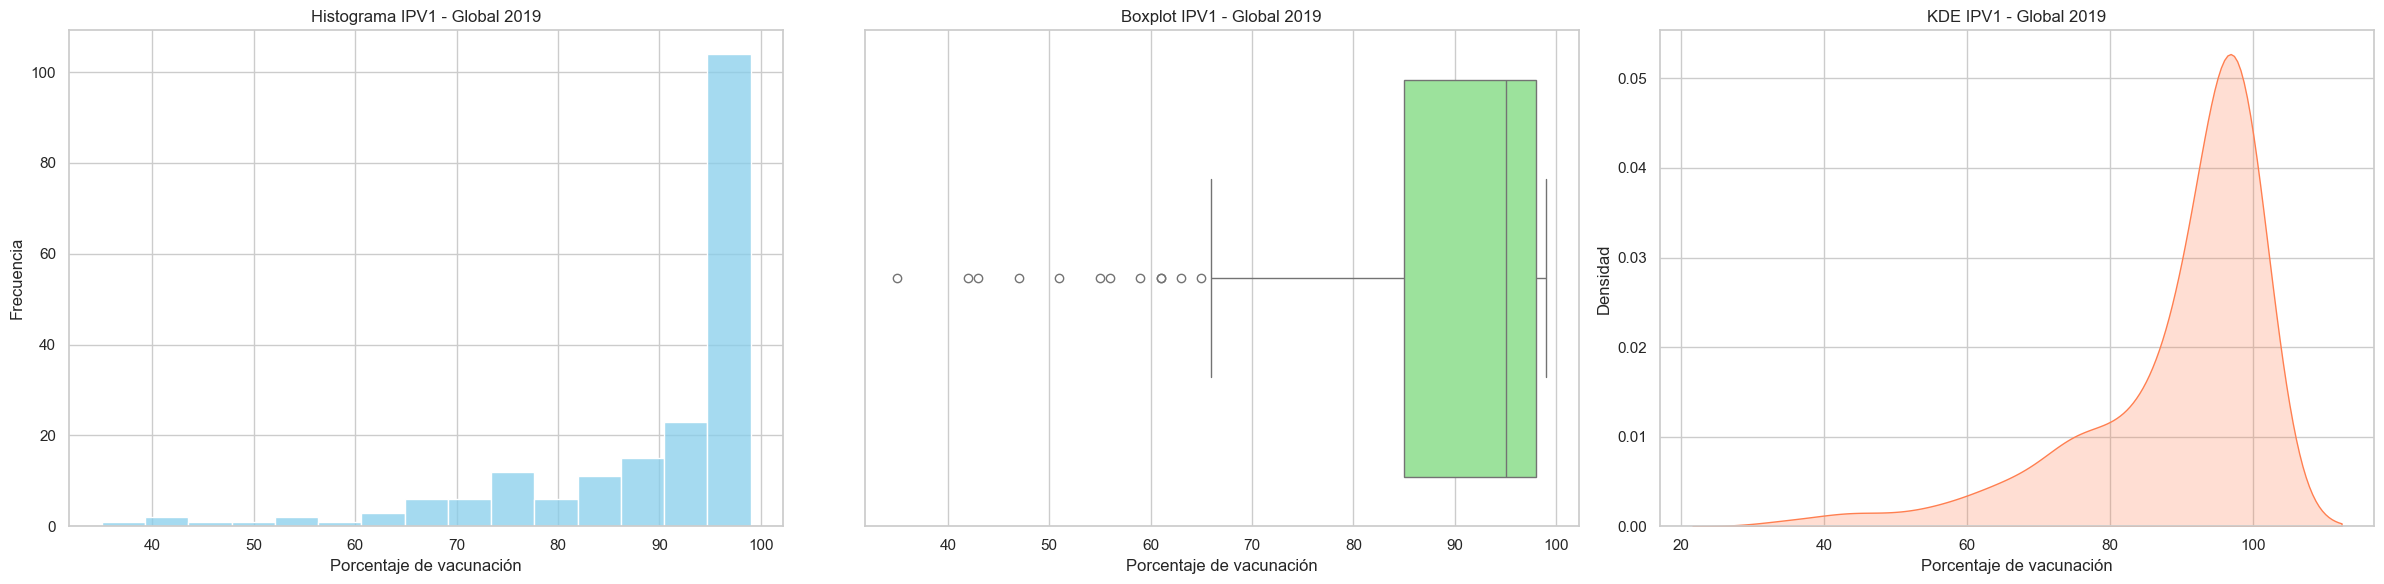

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\2613974569.py:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(spain_values.dropna(), shade=True, color="sienna")


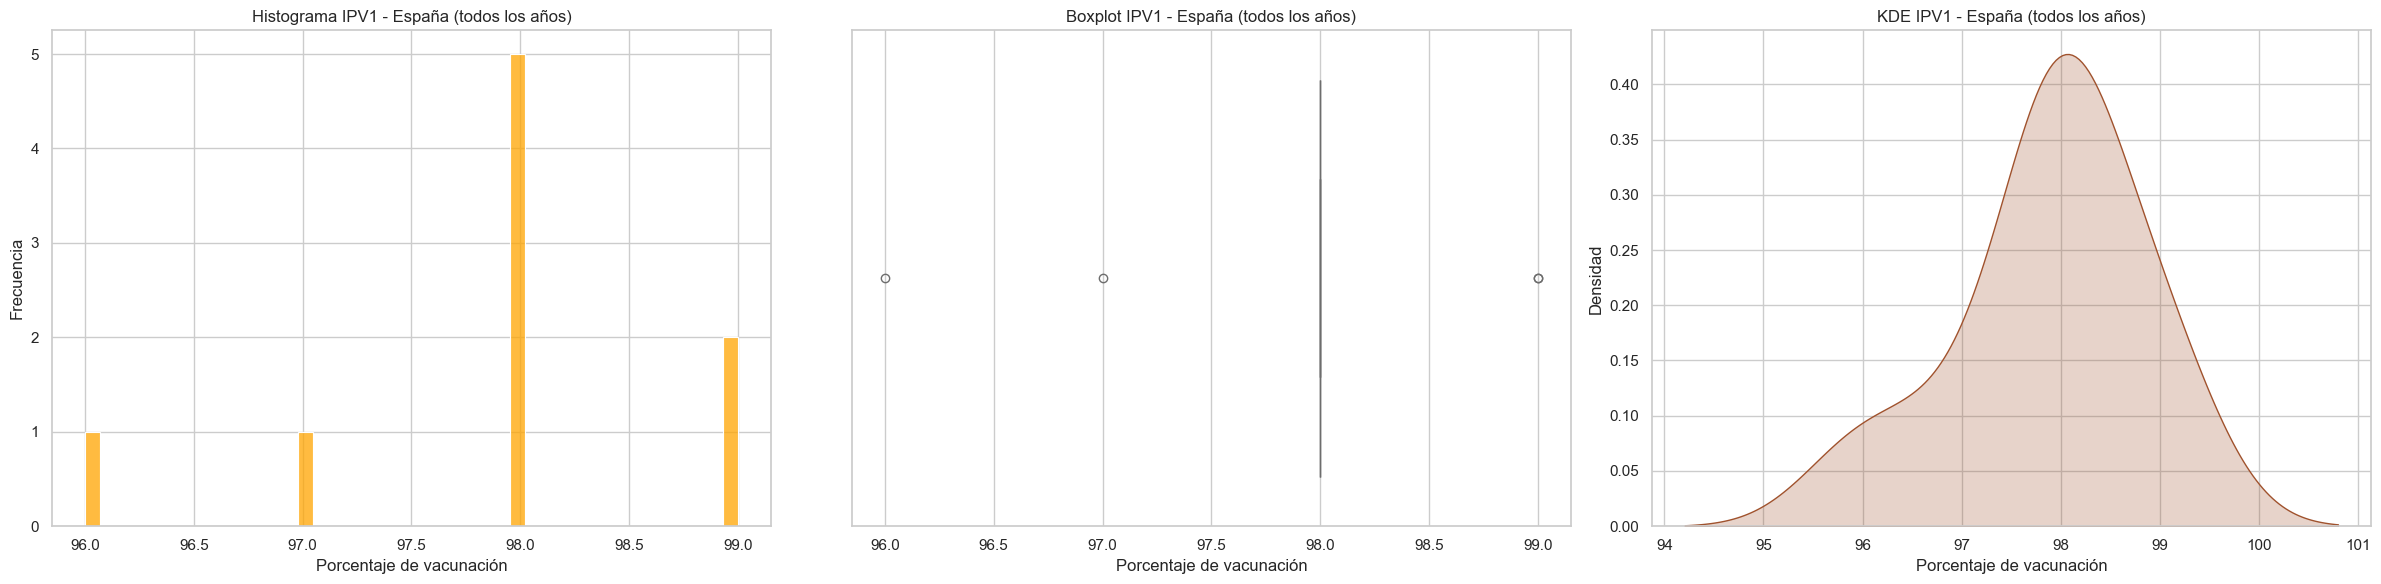

In [ ]:
# GRAFICO HISTOGRAMA, BOXPLOT Y KDE DE LA VACUNA IPV1 PARA EL AÑO 2019 A NIVEL GLOBAL Y EN ESPAÑA A LO LARGO DE LOS AÑOS
'''
La dispersión en los datos para 2019 a nivel mundial puede explicarse por diferencias en acceso a sistemas de
salud en los países menos desarrollados, infraestructura de vacunación, conflictos geopolíticos o crisis
humanitarias, recursos disponibles y prioridades nacionales de salud pública. Por eso, los outliers son hacia 
valores bajos. Existe una alta varianza en la cobertura global: mientras algunos países todavía presentaban 
coberturas alarmantemente bajas, otros habían alcanzado coberturas casi universales.

En los datos de España a lo largo del tiempo, se observan ores consistentemente altos y muy poco dispersos. 
Esto se traduce en una varianza y desviación estándar muy bajas. Este patrón es esperable en países con
sistemas sanitarios sólidos y políticas públicas de inmunización bien establecidas. No se observan caídas 
pronunciadas ni repuntes dramáticos, y la cobertura se mantiene dentro de un rango estrecho de valores 
cercanos al 100%. El bajo nivel de dispersión estadística indica estabilidad y consistencia.
'''

sns.set(style="whitegrid")

# GLOBAL 2019
plt.figure(figsize=(24, 6))

# HISTOGRAMA 2019
plt.subplot(1, 3, 1)
sns.histplot(values_2019, kde=False, color="skyblue", bins=15)
plt.title("Histograma IPV1 - Global 2019")
plt.xlabel("Porcentaje de vacunación")
plt.ylabel("Frecuencia")

# BOXPLOT 2019
plt.subplot(1, 3, 2)
sns.boxplot(x=values_2019, color="lightgreen")
plt.title("Boxplot IPV1 - Global 2019")
plt.xlabel("Porcentaje de vacunación")

# KDE 2019
plt.subplot(1, 3, 3)
sns.kdeplot(values_2019.dropna(), shade=True, color="coral")
plt.title("KDE IPV1 - Global 2019")
plt.xlabel("Porcentaje de vacunación")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

# ESPAÑA A LO LARGO DE LOS AÑOS
plt.figure(figsize=(24, 6))

# HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 1)
sns.histplot(spain_values, kde=False, color="orange", bins=len(spain_values))
plt.title("Histograma IPV1 - España (todos los años)")
plt.xlabel("Porcentaje de vacunación")
plt.ylabel("Frecuencia")

# BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 2)
sns.boxplot(x=spain_values, color="salmon")
plt.title("Boxplot IPV1 - España (todos los años)")
plt.xlabel("Porcentaje de vacunación")

# KDE ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 3)
sns.kdeplot(spain_values.dropna(), shade=True, color="sienna")
plt.title("KDE IPV1 - España (todos los años)")
plt.xlabel("Porcentaje de vacunación")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [ ]:
# IMPUTO LOS VALORES NAN CON LA MEDIANA DE CADA COLUMNA, AGRUPADO POR PAÍS, PUES LA DISTRIBUCIÓN DE LOS VALORES FALTANTES ES TOTALMENTE ALEATORIA. NO ES NECESARIO PARA VISUALIZAR EN POWER BI, PERO SÍ PARA EL ANÁLISIS DE ESTADÍSTICA INFERENCIAL. 
vaccines = [col for col in vaccination_coverage.columns if col not in ['País', 'Año']]
vaccination_coverage[vaccines] = vaccination_coverage[vaccines].transform(lambda x: x.fillna(x.median()))

# EXPLORO EL DATAFRAME VACCINATION_COVERAGE NUEVAMENTE PARA CHEQUEAR QUE LOS VALORES NAN HAYAN SIDO CORRECTAMENTE REEMPLAZADOS
print(vaccination_coverage.head(10000))
print(vaccination_coverage.info())

for column in vaccination_coverage.columns:
    print(f"Columna: {column}")
    print(vaccination_coverage[column].unique())
    print("-" * 40) # Separa entre columna y columna.

vaccination_coverage.isna().sum()


,País,Año,Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3),Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3),Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1),Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1),Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3),Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3),Porcentaje de niños de un año que han recibido una dosis de vacuna contra la rubéola (RCV1),Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC),Porcentaje de niños de un año que han recibido una dosis de vacuna contra la fiebre amarilla (YFV),"Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)"
0,Afganistán,2007,63.0,92.0,94.0,55.0,88.0,63.0,94.0,83.0,64.0,63.0
1,Afganistán,2008,64.0,92.0,94.0,59.0,88.0,64.0,94.0,83.0,64.0,64.0
2,Afganistán,2009,63.0,63.0,94.0,60.0,88.0,63.0,94.0,83.0,64.0,63.0
3,Afganistán,2010,66.0,66.0,94.0,62.0,88.0,66.0,94.0,83.0,64.0,66.0
4,Afganistán,2011,68.0,68.0,94.0,64.0,88.0,68.0,94.0,83.0,64.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8766,Zimbabue,1990,92.0,92.0,94.0,87.0,88.0,89.0,94.0,83.0,64.0,88.0
8767,Zimbabue,1991,92.0,92.0,94.0,87.0,88.0,88.0,94.0,83.0,64.0,87.0
8768,Zimbabue,1992,92.0,92.0,94.0,86.0,88.0,86.0,94.0,83.0,64.0,86.0
8769,Zimbabue,1993,92.0,92.0,94.0,86.0,88.0,85.0,94.0,83.0,64.0,85.0


<class 'pandas.core.frame.DataFrame'>
Index: 7935 entries, 0 to 8770
Data columns (total 12 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   País                                                                                                                                7935 non-null   object 
 1   Año                                                                                                                                 7935 non-null   int64  
 2   Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)                                   7935 non-null   float64
 3   Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus i

None

Columna: País
['Afganistán' 'Albania' 'Argelia' 'Andorra' 'Angola' 'Antigua y Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaiyán' 'Bahamas'
 'Baréin' 'Bangladesh' 'Barbados' 'Bielorrusia' 'Bélgica' 'Belice' 'Benín'
 'Bután' 'Bolivia' 'Bosnia y Herzegovina' 'Botsuana' 'Brasil' 'Brunéi'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Camboya' 'Camerún' 'Canadá'
 'Cabo Verde' 'Chad' 'Chile' 'China' 'Colombia' 'Comoras' 'Congo'
 'Islas Cook' 'Costa Rica' 'Costa de Marfil' 'Croacia' 'Cuba' 'Chipre'
 'República Checa' 'República Democrática del Congo' 'Dinamarca' 'Yibuti'
 'Dominica' 'República Dominicana' 'Timor Oriental' 'Ecuador' 'Egipto'
 'El Salvador' 'Guinea Ecuatorial' 'Eritrea' 'Estonia' 'Eswatini'
 'Etiopía' 'Fiyi' 'Finlandia' 'Francia' 'Gabón' 'Gambia' 'Georgia'
 'Alemania' 'Ghana' 'Grecia' 'Granada' 'Guatemala' 'Guinea' 'Guinea-Bisáu'
 'Guyana' 'Haití' 'Honduras' 'Hungría' 'Islandia' 'India' 'Indonesia'
 'Irán' 'Irak' 'Irlanda' 'Israel' 'Italia' 'Jamaica' 'Japón' 'Jordania'
 

País                                                                                                                                  0
Año                                                                                                                                   0
Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)                                     0
Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3)                       0
Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)                   0
Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1)                                  0
Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3)                        0
Porcentaje de niños de un año que han recibido s

LIFE_EXPECTANCY

In [ ]:
# EXPLORO EL DATAFRAME LIFE_EXPECTANCY 
print(life_expectancy.head(10000)) 
print(life_expectancy.info()) 
for column in life_expectancy.columns: 
    print(f"Columna: {column}") 
    print(life_expectancy[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
life_expectancy.isna().sum() 


,Entity,Code,Year,Period life expectancy at birth - Sex: total - Age: 0
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975
...,...,...,...,...
9995,Kyrgyzstan,KGZ,2000,65.2419
9996,Kyrgyzstan,KGZ,2001,65.3191
9997,Kyrgyzstan,KGZ,2002,65.3418
9998,Kyrgyzstan,KGZ,2003,65.4485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 21565 non-null  object 
 1   Code                                                   19609 non-null  object 
 2   Year                                                   21565 non-null  int64  
 3   Period life expectancy at birth - Sex: total - Age: 0  21565 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 674.0+ KB


None

Columna: Entity
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Americas'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England and Wales' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland'
 'France' 'Fre

Entity                                                      0
Code                                                     1956
Year                                                        0
Period life expectancy at birth - Sex: total - Age: 0       0
dtype: int64

In [ ]:
# ELIMINO LAS FILAS DE GEOGRAFÍAS REPETIDAS 
repeated_geographies = ['Africa', 'Americas', 'Asia', 'England and Wales', 'Europe', 'Falkland Islands', 'High-and-upper-middle-income countries', 'High-income countries', 'Land-locked Developing Countries (LLDC)', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 'Low-and-Lower-middle-income countries', 'Low-and-middle-income countries', 'Low-income countries', 'Lower-middle-income countries', 'Middle-income countries', 'More developed regions', 'No income group available', 'Northern America', 'Oceania', 'Small Island Developing States (SIDS)', 'USSR', 'Upper-middle-income countries', 'World'] 
life_expectancy = life_expectancy[~life_expectancy['Entity'].isin(repeated_geographies)] 

# CAMBIO EL NOMBRE DE LA COLUMNA "ENTITY" A "COUNTRY" 
life_expectancy.rename(columns={"Entity": "Country"}, inplace=True) 

# ELIMINO LA COLUMNA "CODE"
life_expectancy.drop(columns=["Code"], inplace=True) 

# TRADUZCO Y REEMPLAZO LOS NOMBRES DE LOS PAÍSES Y DE LAS COLUMNAS AL ESPAÑOL 
country_translation_dict = {
    'Afghanistan': 'Afganistán', 'Albania': 'Albania', 'Algeria': 'Argelia', 'American Samoa': 'Samoa Americana', 
    'Andorra': 'Andorra', 'Angola': 'Angola', 'Anguilla': 'Anguila', 'Antigua and Barbuda': 'Antigua y Barbuda', 
    'Argentina': 'Argentina', 'Armenia': 'Armenia', 'Aruba': 'Aruba', 'Australia': 'Australia', 'Austria': 'Austria', 
    'Azerbaijan': 'Azerbaiyán', 'Bahamas': 'Bahamas', 'Bahrain': 'Baréin', 'Bangladesh': 'Bangladés', 
    'Barbados': 'Barbados', 'Belarus': 'Bielorrusia', 'Belgium': 'Bélgica', 'Belize': 'Belice', 'Benin': 'Benín', 
    'Bermuda': 'Bermudas', 'Bhutan': 'Bután', 'Bolivia': 'Bolivia', 'Bonaire Sint Eustatius and Saba': 'Bonaire, Sint Eustatius y Saba', 
    'Bosnia and Herzegovina': 'Bosnia y Herzegovina', 'Botswana': 'Botsuana', 'Brazil': 'Brasil', 
    'British Virgin Islands': 'Islas Vírgenes Británicas', 'Brunei': 'Brunéi', 'Bulgaria': 'Bulgaria', 
    'Burkina Faso': 'Burkina Faso', 'Burundi': 'Burundi', 'Cambodia': 'Camboya', 'Cameroon': 'Camerún', 
    'Canada': 'Canadá', 'Cape Verde': 'Cabo Verde', 'Cayman Islands': 'Islas Caimán', 
    'Central African Republic': 'República Centroafricana', 'Chad': 'Chad', 'Chile': 'Chile', 'China': 'China', 
    'Colombia': 'Colombia', 'Comoros': 'Comoras', 'Congo': 'Congo', 'Cook Islands': 'Islas Cook', 
    'Costa Rica': 'Costa Rica', "Cote d'Ivoire": 'Costa de Marfil', 'Croatia': 'Croacia', 'Cuba': 'Cuba', 
    'Curacao': 'Curazao', 'Cyprus': 'Chipre', 'Czechia': 'República Checa', 'Democratic Republic of Congo': 'República Democrática del Congo', 
    'Denmark': 'Dinamarca', 'Djibouti': 'Yibuti', 'Dominica': 'Dominica', 'Dominican Republic': 'República Dominicana', 
    'East Timor': 'Timor Oriental', 'Ecuador': 'Ecuador', 'Egypt': 'Egipto', 'El Salvador': 'El Salvador', 
    'Equatorial Guinea': 'Guinea Ecuatorial', 'Eritrea': 'Eritrea', 'Estonia': 'Estonia', 'Eswatini': 'Esuatini', 
    'Ethiopia': 'Etiopía', 'Faroe Islands': 'Islas Feroe', 'Fiji': 'Fiyi', 'Finland': 'Finlandia', 'France': 'Francia', 
    'French Guiana': 'Guayana Francesa', 'French Polynesia': 'Polinesia Francesa', 'Gabon': 'Gabón', 
    'Gambia': 'Gambia', 'Georgia': 'Georgia', 'Germany': 'Alemania', 'Ghana': 'Ghana', 'Gibraltar': 'Gibraltar', 
    'Greece': 'Grecia', 'Greenland': 'Groenlandia', 'Grenada': 'Granada', 'Guadeloupe': 'Guadalupe', 'Guam': 'Guam', 
    'Guatemala': 'Guatemala', 'Guernsey': 'Guernsey', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bisáu', 
    'Guyana': 'Guyana', 'Haiti': 'Haití', 'Honduras': 'Honduras', 'Hong Kong': 'Hong Kong', 'Hungary': 'Hungría', 
    'Iceland': 'Islandia', 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Irán', 'Iraq': 'Irak', 
    'Ireland': 'Irlanda', 'Isle of Man': 'Isla de Man', 'Israel': 'Israel', 'Italy': 'Italia', 'Jamaica': 'Jamaica', 
    'Japan': 'Japón', 'Jersey': 'Jersey', 'Jordan': 'Jordania', 'Kazakhstan': 'Kazajistán', 'Kenya': 'Kenia', 
    'Kiribati': 'Kiribati', 'Kosovo': 'Kosovo', 'Kuwait': 'Kuwait', 'Kyrgyzstan': 'Kirguistán', 'Laos': 'Laos', 
    'Latvia': 'Letonia', 'Lebanon': 'Líbano', 'Lesotho': 'Lesoto', 'Liberia': 'Liberia', 'Libya': 'Libia', 
    'Liechtenstein': 'Liechtenstein', 'Lithuania': 'Lituania', 'Luxembourg': 'Luxemburgo', 'Macao': 'Macao', 
    'Madagascar': 'Madagascar', 'Malawi': 'Malawi', 'Malaysia': 'Malasia', 'Maldives': 'Maldivas', 'Mali': 'Malí', 
    'Malta': 'Malta', 'Marshall Islands': 'Islas Marshall', 'Martinique': 'Martinica', 'Mauritania': 'Mauritania', 
    'Mauritius': 'Mauricio', 'Mayotte': 'Mayotte', 'Mexico': 'México', 'Micronesia (country)': 'Micronesia', 
    'Moldova': 'Moldavia', 'Monaco': 'Mónaco', 'Mongolia': 'Mongolia', 'Montenegro': 'Montenegro', 
    'Montserrat': 'Montserrat', 'Morocco': 'Marruecos', 'Mozambique': 'Mozambique', 'Myanmar': 'Birmania', 
    'Namibia': 'Namibia', 'Nauru': 'Nauru', 'Nepal': 'Nepal', 'Netherlands': 'Países Bajos', 'New Caledonia': 'Nueva Caledonia', 
    'New Zealand': 'Nueva Zelanda', 'Nicaragua': 'Nicaragua', 'Niger': 'Níger', 'Nigeria': 'Nigeria', 'Niue': 'Niue', 
    'North Korea': 'Corea del Norte', 'North Macedonia': 'Macedonia del Norte', 'Northern Ireland': 'Irlanda del Norte', 
    'Northern Mariana Islands': 'Islas Marianas del Norte', 'Norway': 'Noruega', 'Oman': 'Omán', 'Pakistan': 'Pakistán', 
    'Palau': 'Palau', 'Palestine': 'Palestina', 'Panama': 'Panamá', 'Papua New Guinea': 'Papúa Nueva Guinea', 'Paraguay': 'Paraguay', 
    'Peru': 'Perú', 'Philippines': 'Filipinas', 'Poland': 'Polonia', 'Portugal': 'Portugal', 'Puerto Rico': 'Puerto Rico', 
    'Qatar': 'Catar', 'Reunion': 'Reunión', 'Romania': 'Rumanía', 'Russia': 'Rusia', 'Rwanda': 'Ruanda', 
    'Saint Barthelemy': 'San Bartolomé', 'Saint Helena': 'Santa Elena', 'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 
    'Saint Lucia': 'Santa Lucía', 'Saint Martin (French part)': 'San Martín (parte francesa)', 
    'Saint Pierre and Miquelon': 'San Pedro y Miquelón', 'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas', 
    'Samoa': 'Samoa', 'San Marino': 'San Marino', 'Sao Tome and Principe': 'Santo Tomé y Príncipe', 'Saudi Arabia': 'Arabia Saudita', 
    'Scotland': 'Escocia', 'Senegal': 'Senegal', 'Serbia': 'Serbia', 'Seychelles': 'Seychelles', 'Sierra Leone': 'Sierra Leona', 
    'Singapore': 'Singapur', 'Sint Maarten (Dutch part)': 'Sint Maarten (parte holandesa)', 'Slovakia': 'Eslovaquia', 
    'Slovenia': 'Eslovenia', 'Solomon Islands': 'Islas Salomón', 'Somalia': 'Somalia', 'South Africa': 'Sudáfrica', 'South Korea': 'Corea del Sur', 
    'South Sudan': 'Sudán del Sur', 'Spain': 'España', 'Sri Lanka': 'Sri Lanka', 'Sudan': 'Sudán', 'Suriname': 'Surinam', 
    'Sweden': 'Suecia', 'Switzerland': 'Suiza', 'Syria': 'Siria', 'Taiwan': 'Taiwán', 'Tajikistan': 'Tayikistán', 
    'Tanzania': 'Tanzania', 'Thailand': 'Tailandia', 'Togo': 'Togo', 'Tokelau': 'Tokelau', 'Tonga': 'Tonga', 
    'Trinidad and Tobago': 'Trinidad y Tobago', 'Tunisia': 'Túnez', 'Turkey': 'Turquía', 'Turkmenistan': 'Turkmenistán', 
    'Turks and Caicos Islands': 'Islas Turcas y Caicos', 'Tuvalu': 'Tuvalu', 'Uganda': 'Uganda', 'Ukraine': 'Ucrania', 
    'United Arab Emirates': 'Emiratos Árabes Unidos', 'United Kingdom': 'Reino Unido', 'United States': 'Estados Unidos', 
    'United States Virgin Islands': 'Islas Vírgenes de los Estados Unidos', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistán', 
    'Vanuatu': 'Vanuatu', 'Vatican': 'Vaticano', 'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam', 'Wallis and Futuna': 'Wallis y Futuna', 
    'Western Sahara': 'Sáhara Occidental', 'Yemen': 'Yemen', 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabue'
}

life_expectancy['Country'] = life_expectancy['Country'].replace(country_translation_dict) 
life_expectancy.columns=['País', 'Año', 'Esperanza de vida al nacer']

# EXPLORO EL DATAFRAME LIFE_EXPECTANCY NUEVAMENTE PARA CHEQUEAR QUE ESTÉ LIMPIO 
print(life_expectancy.head(10000))
print(life_expectancy.info()) 
for column in life_expectancy.columns: 
    print(f"Columna: {column}")
    print(life_expectancy[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
life_expectancy.isna().sum() 



,País,Año,Esperanza de vida al nacer
0,Afganistán,1950,28.1563
1,Afganistán,1951,28.5836
2,Afganistán,1952,29.0138
3,Afganistán,1953,29.4521
4,Afganistán,1954,29.6975
...,...,...,...
11381,Luxemburgo,1926,53.4060
11382,Luxemburgo,1927,55.8590
11383,Luxemburgo,1928,55.3520
11384,Luxemburgo,1929,52.7030


<class 'pandas.core.frame.DataFrame'>
Index: 19575 entries, 0 to 21564
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   País                        19575 non-null  object 
 1   Año                         19575 non-null  int64  
 2   Esperanza de vida al nacer  19575 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 611.7+ KB


None

Columna: País
['Afganistán' 'Albania' 'Argelia' 'Samoa Americana' 'Andorra' 'Angola'
 'Anguila' 'Antigua y Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaiyán' 'Bahamas' 'Baréin' 'Bangladés' 'Barbados'
 'Bielorrusia' 'Bélgica' 'Belice' 'Benín' 'Bermudas' 'Bután' 'Bolivia'
 'Bonaire, Sint Eustatius y Saba' 'Bosnia y Herzegovina' 'Botsuana'
 'Brasil' 'Islas Vírgenes Británicas' 'Brunéi' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Camboya' 'Camerún' 'Canadá' 'Cabo Verde' 'Islas Caimán'
 'República Centroafricana' 'Chad' 'Chile' 'China' 'Colombia' 'Comoras'
 'Congo' 'Islas Cook' 'Costa Rica' 'Costa de Marfil' 'Croacia' 'Cuba'
 'Curazao' 'Chipre' 'República Checa' 'República Democrática del Congo'
 'Dinamarca' 'Yibuti' 'Dominica' 'República Dominicana' 'Timor Oriental'
 'Ecuador' 'Egipto' 'El Salvador' 'Guinea Ecuatorial' 'Eritrea' 'Estonia'
 'Esuatini' 'Etiopía' 'Islas Feroe' 'Fiyi' 'Finlandia' 'Francia'
 'Guayana Francesa' 'Polinesia Francesa' 'Gabón' 'Gambia' 'Georgia'
 '

País                          0
Año                           0
Esperanza de vida al nacer    0
dtype: int64

In [24]:
# HAGO ANÁLISIS ESTADÍSTICO DESCRIPTIVO 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

life_expectancy_mean = life_expectancy['Esperanza de vida al nacer'].mean() 
life_expectancy_median = life_expectancy['Esperanza de vida al nacer'].median() 
life_expectancy_mode = life_expectancy['Esperanza de vida al nacer'].mode().iloc[0] 
life_expectancy_std = life_expectancy['Esperanza de vida al nacer'].std() 
life_expectancy_var = life_expectancy['Esperanza de vida al nacer'].var() 
life_expectancy_percentile_25 = life_expectancy['Esperanza de vida al nacer'].quantile(0.25) 
life_expectancy_percentile_50 = life_expectancy['Esperanza de vida al nacer'].quantile(0.50) 
life_expectancy_percentile_75 = life_expectancy['Esperanza de vida al nacer'].quantile(0.75) 
life_expectancy_min = life_expectancy['Esperanza de vida al nacer'].min() 
life_expectancy_max = life_expectancy['Esperanza de vida al nacer'].max()
life_expectancy_range = life_expectancy_max - life_expectancy_min
print(f"La media de la esperanza de vida es:\n{life_expectancy_mean}\n") 
print(f"La mediana de la esperanza de vida es:\n{life_expectancy_median}\n") 
print(f"La moda de la esperanza de vida es:\n{life_expectancy_mode}\n") 
print(f"La desviación estándar de la esperanza de vida es:\n{life_expectancy_std}\n") 
print(f"La varianza de la esperanza de vida es:\n{life_expectancy_var}\n")
print(f"El percentil 25 para la esperanza de vida es:\n{life_expectancy_percentile_25}\n") 
print(f"El percentil 50 para la esperanza de vida es:\n{life_expectancy_percentile_50}\n") 
print(f"El percentil 75 para la esperanza de vida es:\n{life_expectancy_percentile_75}\n") 
print(f"El valor mínimo para la esperanza de vida es:\n{life_expectancy_min}\n") 
print(f"El valor máximo para la esperanza de vida es:\n{life_expectancy_max}\n") 
print(f"El rango para la esperanza de vida es:\n{life_expectancy_range}\n") 


La media de la esperanza de vida es:
62.043035509578544

La mediana de la esperanza de vida es:
64.7459

La moda de la esperanza de vida es:
34.0

La desviación estándar de la esperanza de vida es:
13.05788744331533

La varianza de la esperanza de vida es:
170.50842448229218

El percentil 25 para la esperanza de vida es:
52.8418

El percentil 50 para la esperanza de vida es:
64.7459

El percentil 75 para la esperanza de vida es:
72.1336

El valor mínimo para la esperanza de vida es:
10.9891

El valor máximo para la esperanza de vida es:
86.3724

El rango para la esperanza de vida es:
75.38329999999999



C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\1970250524.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(life_expectancy['Esperanza de vida al nacer'].dropna(), shade=True, color="coral")


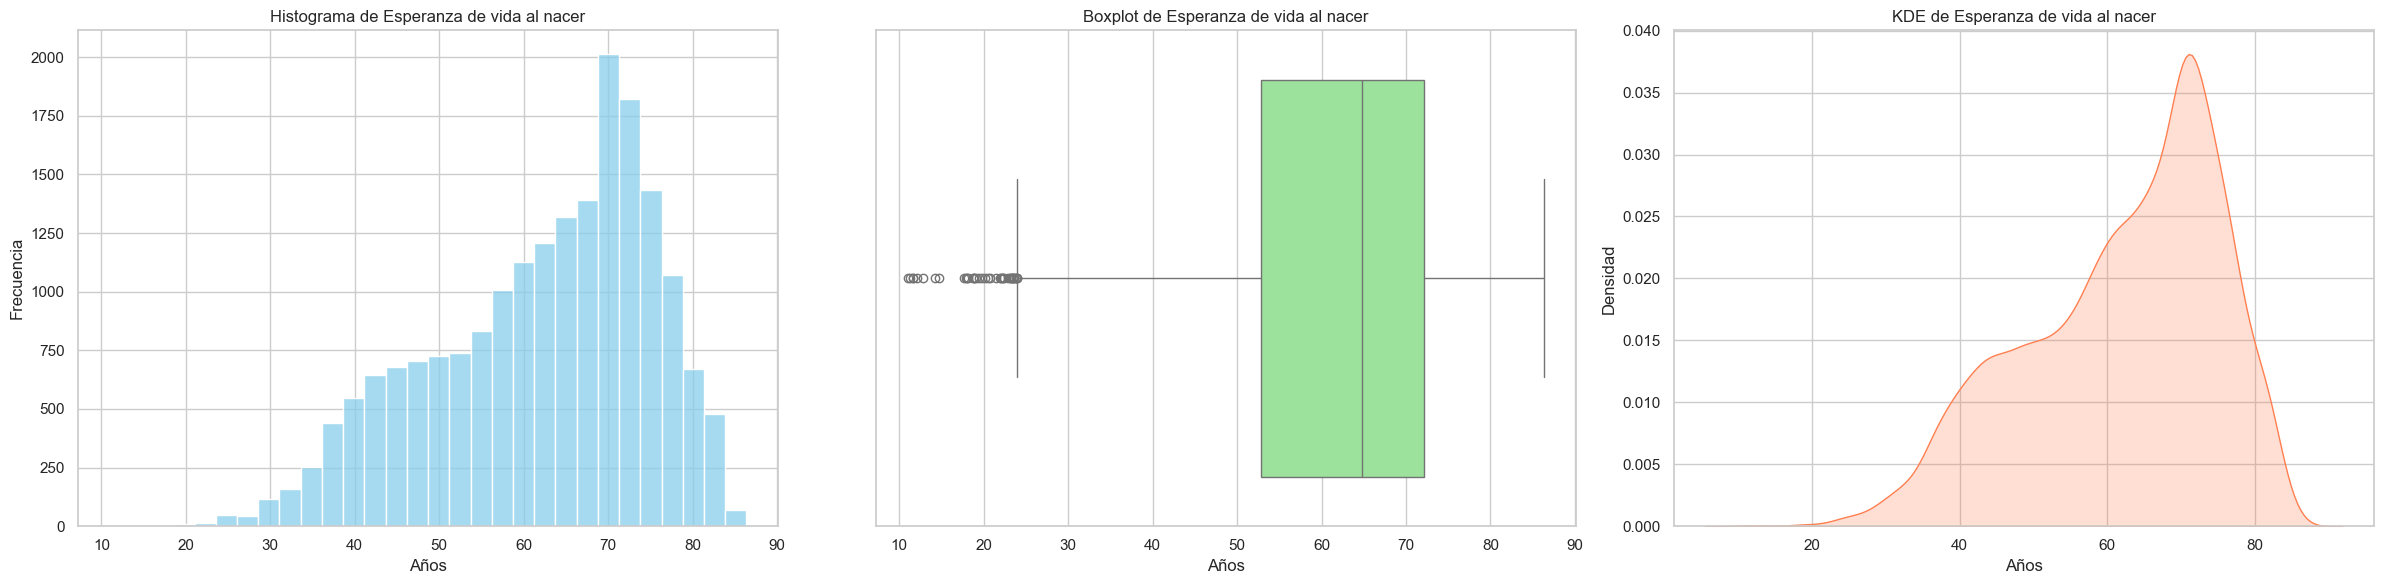

In [ ]:
# GRAFICO HISTOGRAMA, BOXPLOT Y KDE DE LA ESPERANZA DE VIDA
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

# HISTOGRAMA
plt.subplot(1, 3, 1)
sns.histplot(life_expectancy['Esperanza de vida al nacer'], kde=False, color="skyblue", bins=30)
plt.title("Histograma de Esperanza de vida al nacer")
plt.xlabel('Años')
plt.ylabel('Frecuencia')

# BOXPLOT
plt.subplot(1, 3, 2)
sns.boxplot(x=life_expectancy['Esperanza de vida al nacer'], color="lightgreen")
plt.title("Boxplot de Esperanza de vida al nacer")
plt.xlabel('Años')

# KDE
plt.subplot(1, 3, 3)
sns.kdeplot(life_expectancy['Esperanza de vida al nacer'].dropna(), shade=True, color="coral")
plt.title("KDE de Esperanza de vida al nacer")
plt.xlabel('Años')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [ ]:
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA ESPERANZA DE VIDA AL NACER EN 2019 A NIVEL GLOBAL
vida_col = "Esperanza de vida al nacer"
global_life_2019 = life_expectancy[life_expectancy['Año'] == 2019]
values_vida_2019 = global_life_2019[vida_col]

print(f"Estadísticas descriptivas globales para '{vida_col}' en 2019:")
print(f"Media: {values_vida_2019.mean():.2f}")
print(f"Mediana: {values_vida_2019.median():.2f}")
print(f"Moda: {values_vida_2019.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {values_vida_2019.std():.2f}")
print(f"Varianza: {values_vida_2019.var():.2f}")
print(f"Mínimo: {values_vida_2019.min():.2f}")
print(f"Máximo: {values_vida_2019.max():.2f}")
print(f"Rango: {values_vida_2019.max() - values_vida_2019.min():.2f}")
print(f"Percentil 25: {values_vida_2019.quantile(0.25):.2f}")
print(f"Percentil 50: {values_vida_2019.quantile(0.50):.2f}")
print(f"Percentil 75: {values_vida_2019.quantile(0.75):.2f}")

# ANÁLISIS ESTADÍSTICO PARA ESPERANZA DE VIDA AL NACER EN ESPAÑA A LO LARGO DEL TIEMPO
vida_spain = life_expectancy[life_expectancy['País'] == 'España']
spain_vida_values = vida_spain[vida_col]

print(f"\nEstadísticas descriptivas de '{vida_col}' en España a lo largo de los años:")
print(f"Media: {spain_vida_values.mean():.2f}")
print(f"Mediana: {spain_vida_values.median():.2f}")
print(f"Moda: {spain_vida_values.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {spain_vida_values.std():.2f}")
print(f"Varianza: {spain_vida_values.var():.2f}")
print(f"Mínimo: {spain_vida_values.min():.2f}")
print(f"Máximo: {spain_vida_values.max():.2f}")
print(f"Rango: {spain_vida_values.max() - spain_vida_values.min():.2f}")
print(f"Percentil 25: {spain_vida_values.quantile(0.25):.2f}")
print(f"Percentil 50: {spain_vida_values.quantile(0.50):.2f}")
print(f"Percentil 75: {spain_vida_values.quantile(0.75):.2f}")

Estadísticas descriptivas globales para 'Esperanza de vida al nacer' en 2019:
Media: 73.35
Mediana: 74.92
Moda: 31.53
Desviación estándar: 7.80
Varianza: 60.89
Mínimo: 31.53
Máximo: 86.15
Rango: 54.62
Percentil 25: 67.89
Percentil 50: 74.92
Percentil 75: 79.09

Estadísticas descriptivas de 'Esperanza de vida al nacer' en España a lo largo de los años:
Media: 64.76
Mediana: 70.49
Moda: 29.50
Desviación estándar: 15.50
Varianza: 240.24
Mínimo: 29.50
Máximo: 83.67
Rango: 54.17
Percentil 25: 49.27
Percentil 50: 70.49
Percentil 75: 77.92


C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\1138163194.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values_vida_2019.dropna(), shade=True, color="coral")


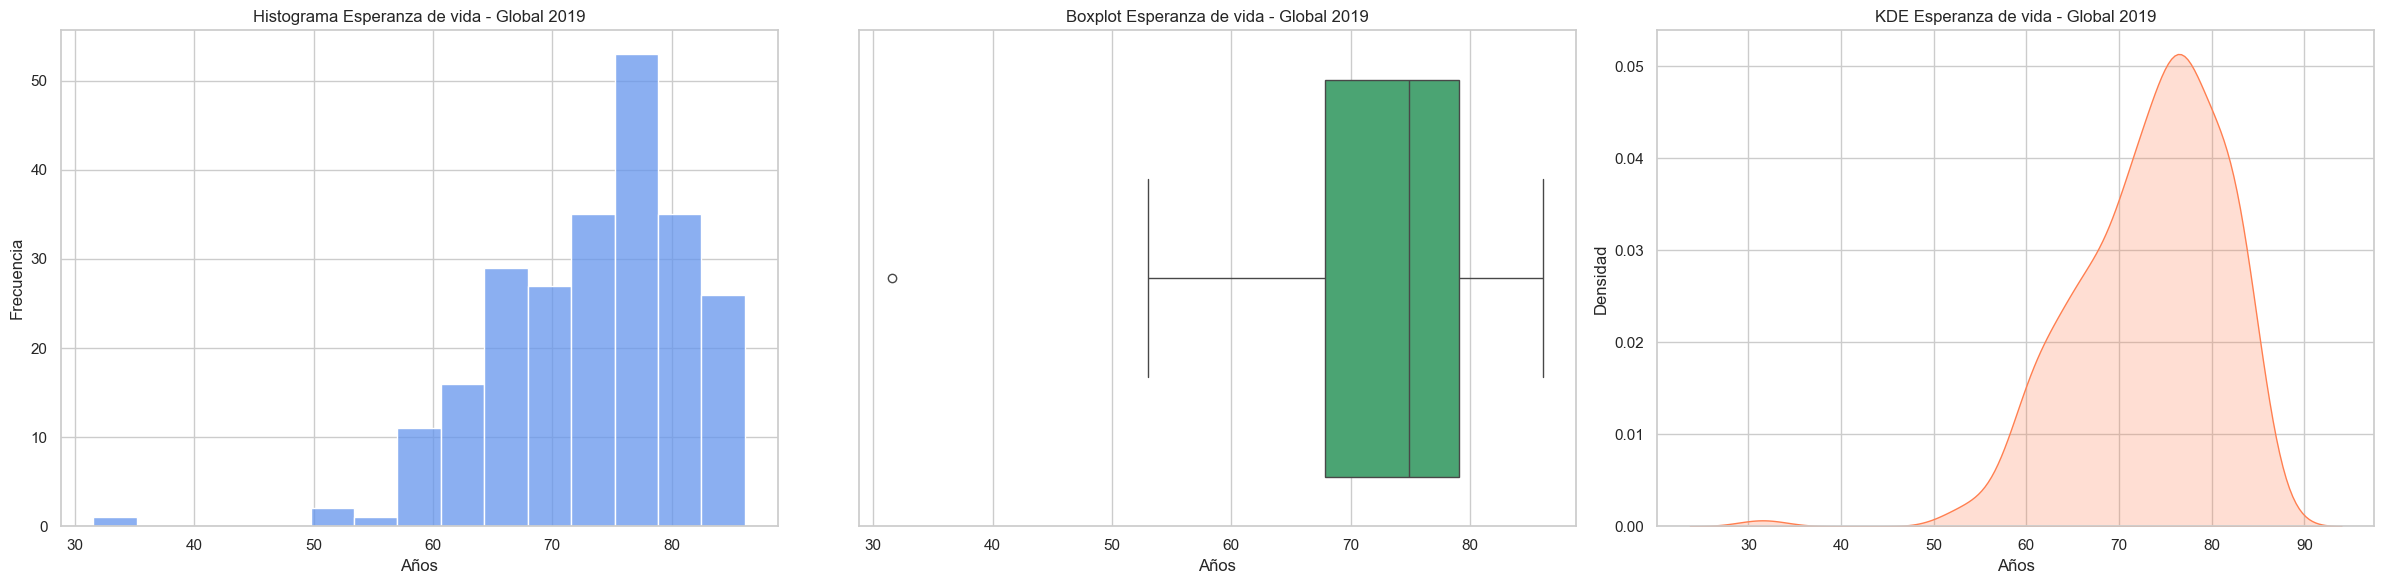

C:\Users\Jeron\AppData\Local\Temp\ipykernel_16372\1138163194.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(spain_vida_values.dropna(), shade=True, color="orangered")


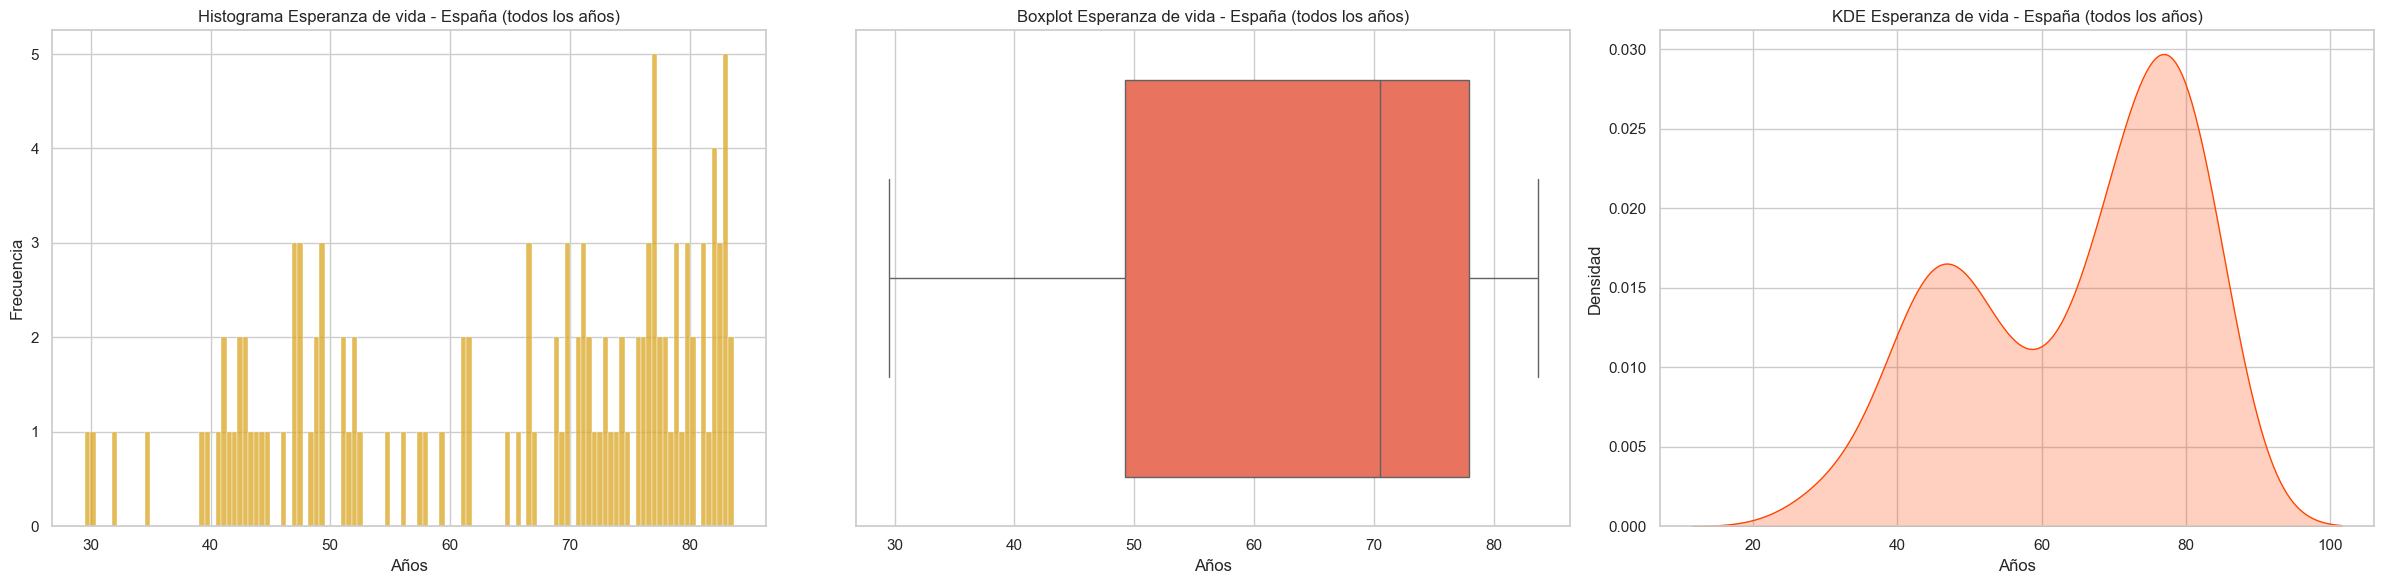

In [ ]:
# GRAFICO HISTOGRAMA, BOXPLOT Y KDE DE LA DE ESPERANZA DE VIDA AL NACER PARA EL AÑO 2019 A NIVEL GLOBAL Y EN ESPAÑA A LO LARGO DE LOS AÑOS
sns.set(style="whitegrid")

# GLOBAL 2019
plt.figure(figsize=(24, 6))

# HISTOGRAMA 2019
plt.subplot(1, 3, 1)
sns.histplot(values_vida_2019, kde=False, color="cornflowerblue", bins=15)
plt.title("Histograma Esperanza de vida - Global 2019")
plt.xlabel("Años")
plt.ylabel("Frecuencia")

# BOXPLOT 2019
plt.subplot(1, 3, 2)
sns.boxplot(x=values_vida_2019, color="mediumseagreen")
plt.title("Boxplot Esperanza de vida - Global 2019")
plt.xlabel("Años")

# KDE 2019
plt.subplot(1, 3, 3)
sns.kdeplot(values_vida_2019.dropna(), shade=True, color="coral")
plt.title("KDE Esperanza de vida - Global 2019")
plt.xlabel("Años")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

# ESPAÑA A LO LARGO DE LOS AÑOS 
plt.figure(figsize=(24, 6))

# HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS 
plt.subplot(1, 3, 1)
sns.histplot(spain_vida_values, kde=False, color="goldenrod", bins=len(spain_vida_values))
plt.title("Histograma Esperanza de vida - España (todos los años)")
plt.xlabel("Años")
plt.ylabel("Frecuencia")

# BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS 
plt.subplot(1, 3, 2)
sns.boxplot(x=spain_vida_values, color="tomato")
plt.title("Boxplot Esperanza de vida - España (todos los años)")
plt.xlabel("Años")

# KDE ESPAÑA A LO LARGO DE LOS AÑOS 
plt.subplot(1, 3, 3)
sns.kdeplot(spain_vida_values.dropna(), shade=True, color="orangered")
plt.title("KDE Esperanza de vida - España (todos los años)")
plt.xlabel("Años")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

PREVENTABLE_DEATHS

In [30]:
# UNO VERTICALMENTE LOS DOS DATAFRAMES DE DEATHS VACCINES COULD HAVE PREVENTED
preventable_deaths = pd.concat([preventable_deaths_1, preventable_deaths_2], ignore_index=True)

In [ ]:
# EXPLORO EL DATAFRAME PREVENTABLE_DEATHS 
print(preventable_deaths.head(10000)) 
print(preventable_deaths.info()) 
for column in preventable_deaths.columns: 
    print(f"Columna: {column}") 
    print(preventable_deaths[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
preventable_deaths.isna().sum() 


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Muertes,68,Corea del Sur,3,Ambos,22,Todas las edades,435,Cáncer de cuerpo de útero,1,Número,1980,368.462258,559.769797,187.399581
1,1,Muertes,68,Corea del Sur,3,Ambos,22,Todas las edades,435,Cáncer de cuerpo de útero,2,Porcentaje,1980,0.001500,0.002270,0.000764
2,1,Muertes,68,Corea del Sur,3,Ambos,22,Todas las edades,435,Cáncer de cuerpo de útero,3,Tasa,1980,0.957086,1.454010,0.486773
3,1,Muertes,1,Mundo,3,Ambos,22,Todas las edades,358,Fiebre amarilla,1,Número,1980,13476.508177,28615.689769,5201.181141
4,1,Muertes,1,Mundo,3,Ambos,22,Todas las edades,358,Fiebre amarilla,2,Porcentaje,1980,0.000306,0.000653,0.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,Muertes,47,República Checa,3,Ambos,22,Todas las edades,338,Difteria,3,Tasa,1980,0.000045,0.000079,0.000026
9996,1,Muertes,47,República Checa,3,Ambos,22,Todas las edades,340,Tétanos,1,Número,1980,1.026300,1.943531,0.480423
9997,1,Muertes,47,República Checa,3,Ambos,22,Todas las edades,340,Tétanos,2,Porcentaje,1980,0.000008,0.000015,0.000004
9998,1,Muertes,47,República Checa,3,Ambos,22,Todas las edades,340,Tétanos,3,Tasa,1980,0.009992,0.018923,0.004678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796320 entries, 0 to 796319
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   measure_id     796320 non-null  int64  
 1   measure_name   796320 non-null  object 
 2   location_id    796320 non-null  int64  
 3   location_name  796320 non-null  object 
 4   sex_id         796320 non-null  int64  
 5   sex_name       796320 non-null  object 
 6   age_id         796320 non-null  int64  
 7   age_name       796320 non-null  object 
 8   cause_id       796320 non-null  int64  
 9   cause_name     796320 non-null  object 
 10  metric_id      796320 non-null  int64  
 11  metric_name    796320 non-null  object 
 12  year           796320 non-null  int64  
 13  val            796320 non-null  float64
 14  upper          796320 non-null  float64
 15  lower          796320 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 97.2+ MB


None

Columna: measure_id
[1]
----------------------------------------
Columna: measure_name
['Muertes']
----------------------------------------
Columna: location_id
[   68     1    19     4    69   117     5    36   166    52   133    70
   101    20   134     6    21    71    85   167   182   118   349   216
    37   102   150    53   135   183   200   351   435   168   119    86
    22     7   184   151   478    72   560    38   217    54   528   103
 35427   201   169     8 35443   136  4621    87   367  4873   218   544
   120   104   170    39    55  4755  4668  4652   479 35444    73   561
   185  4735 35617   137  4855   152    23  4719   369   121  4669   202
   105   171  4772 35460    88 35634     9 35445    24 44667 35428  4622
   529   239 35618   545   482   186 44560   153   203    56   562    40
  4756    25    89  4874 35650  4773   138 44683   159  4670 44650 35635
   154    90 44559  4736   530 44748 53618    61 44732   546  4856   106
   187 35429 44781 44765   122   172

measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

In [31]:
# ELIMINO LAS FILAS DE GEOGRAFÍAS REPETIDAS 
repeated_geographies = ['Aceh', 'Acre', 'Advanced Health System', 'Adís Abeda', 'Afar', 'Africa Subsahariana', 'Africa Subsahariana Central',  'Africa Subsahariana Occidental', 'Africa Subsahariana Sur', 'Agder', 'Aguascalientes', 'Aichi', 'Akita',
 'Alabama', 'Alagoas', 'Alaska', 'Amapa', 'Amazonas', 'Amhara', 'América', 'América Latina & Caribe - BM', 'América Latina Andina', 'América Latina Central', 'América Latina Tropical', 'América Latina y el Caribe',
 'América del Norte', 'América del Norte Ingresos Altos', 'América del Sur', 'Andhra Pradesh', 'Aomori', 'Ardebil', 'Arizona', 'Arkansas', 'Arunachal Pradesh', 'Asia', 'Asia Central', 'Asia Oriental',
 'Asia Oriental & Pacífico - BM', 'Asia del Sur', 'Asia del Sur - BM', 'Asia-Pacífico Ingresos Altos', 'Assam', 'Association of Southeast Asian Nations', 'Australasia', 'Azad Jammu y Cachemira',
 'Azerbaiyán Occidental', 'Azerbaiyán Oriental', 'Bahréin', 'Bahía', 'Bahía de Homa', 'Baja California', 'Baja California Sur', 'Bali', 'Baluchistán','Bantén', 'Baringo', 'Barnet', 'Barnsley', 'Basic Health System',
 'Bath y Noreste de Somerset', 'Bedford', 'Bedfordshire central', 'Bengala Occidental', 'Bengkulu', 'Benishangul-Gumaz', 'Bexley', 'Bihar', 'Birmingham', 'Blackburn con Darwen', 'Blackpool', 'Bolton', 'Bomet',
 'Borneo Central', 'Borneo Meridional', 'Borneo Occidental', 'Borneo Oriental', 'Borneo Septentrional', 'Bosque de Bracknell', 'Bosque de Waltham', 'Bournemouth', 'Bradford', 'Brazil Central-West', 'Brazil North', 'Brazil Northeast', 'Brazil South',
 'Brazil Southeast', 'Brent', 'Brighton y Hove', 'Bristol, ciudad de', 'Bromley', 'Buckinghamshire', 'Bungoma', 'Bushehr', 'Busia', 'Cabo Norte', 'Cabo Occidental', 'Cabo Oriental', 'Calderdale', 'California', 'Cambridgeshire',
 'Camden', 'Campeche', 'Caribe', 'Carolina del Norte', 'Carolina del Sur', 'Ceará', 'Central Africa', 'Chahar Mahal y Bajtiarí', 'Cheshire West y Chester', 'Chhattisgarh', 'Chiapas', 'Chiba', 'Chihuahua', 'Ciudad de México', 'Coahuila',
 'Colima', 'Colorado', 'Commonwealth', 'Commonwealth Ingresos Altos', 'Commonwealth Ingresos Bajos', 'Commonwealth Ingresos Medios', 'Condado de Durham', 'Connecticut', 'Cornualles', 'Coventry', 'Croydon', 'Cuatro Regiones del Mundo',
 'Cumbria', 'Célebes Central', 'Célebes Meridional', 'Célebes Occidental', 'Célebes Septentrional', 'Célebes Sureste', 'Dakota del Norte', 'Dakota del Sur', 'Darlington', 'Delaware', 'Delhi', 'Derbyshire', 'Devon', 'Dire Dawa',
 'Distrito de Columbia', 'Doncaster', 'Dorset', 'Dudley', 'Durango', 'Ealing', 'East Midlands', 'East Riding de Yorkshire', 'East Sussex', 'Eastern Africa', 'Ehime', 'Elgeyo-Marakwet', 'Embu', 'Enfield', 'Enterrar', 'Escocia', 'Espíritu Santo',
 'Essex', 'Estado Libre', 'Este de Cheshire', 'Este de Inglaterra', 'Estocolmo', 'Europa', 'Europa &  Asia Central - BM', 'Europa Central', 'Europa Central, Oriental y Asia Central ', 'Europa Occidental', 'Europa Oriental', 'Fars',
 'Florida', 'Fukui', 'Fukuoka', 'Fukushima', 'G20', 'Gales', 'Gambela', 'Garissa', 'Gateshead', 'Gauteng', 'Gifu', 'Gilgit-Baltistán', 'Gloucestershire', 'Goa', 'Golestán', 'Gorontalo', 'Goías', 'Grada', 'Gran Londres', 'Greenwich',
'Guam', 'Guanajuato', 'Guerrero', 'Guilán ', 'Gulf Cooperation Council', 'Gunma', 'Guyarat', 'Halton', 'Hamadán', 'Hammersmith y Fulham', 'Hampshire', 'Harar', 'Haringey', 'Hartlepool', 'Haryana', 'Havering', 'Hawái', 'Health System Grouping Levels',
 'Herefordshire, Condado de', 'Hertfordshire', 'Hidalgo', 'Hillingdon', 'Himachal Pradesh', 'Hiroshima', 'Hokkaidō','Hormozgán', 'Hounslow', 'Hyōgo', 'ISD Alto', 'ISD Alto-Medio ', 'ISD Bajo', 'ISD Bajo-Medio', 'ISD Medio', 'Ibaraki',
 'Idaho', 'Ilam', 'Illinois', 'Indiana', 'Inglaterra', 'Ingresos Altos', 'Innlandet', 'Iowa', 'Iraq', 'Irlanda del Norte', 'Isfahán', 'Ishikawa', 'Isiolo', 'Isla de Wight', 'Islas Bangka-Belitung','Islas Riau','Islington', 'Iwate',
 'Jaiber Pastunjuá', 'Jalisco', 'Jambi', 'Jammu y Cachemira', 'Java Central', 'Java Occidental', 'Java Oriental', 'Jharkhand', 'Jorasán Razaví', 'Jorasán del Norte', 'Jorasán del Sur', 'Juzestán', 'Kagawa', 'Kagoshima', 'Kajiado',
 'Kakamega', 'Kanagawa', 'Kansas', 'Karnataka', 'Kensington y Chelsea', 'Kent', 'Kentucky', 'Kerala', 'Kericho', 'Kermanshah', 'Kermán', 'Kiambu', 'Kilifi', 'Kingston upon Hull, Ciudad de', 'Kingston upon Thames', 'Kioto',
 'Kirinyaga', 'Kirklees', 'Kisii', 'Kisumu', 'Kitui', 'Knowsley', 'Kohkiluyeh y Buyer Ahmad', 'Kumamoto', 'Kurdistán', 'KwaZulu-Natal', 'Kwale', 'Kōchi', 'Ladrando y Dagenham', 'Laikipia', 'Lambeth', 'Lampung',
 'Lamu', 'Lancashire', 'Las Bahamas', 'Leeds', 'Leicester', 'Leicestershire', 'Lewisham', 'Leyendo', 'Limited Health System', 'Limpopo', 'Lincolnshire', 'Liverpool', 'Lorestán', 'Los seis territorios menores', 'Luisiana', 'Luton',
 'Macedonia', 'Machakos', 'Madhya Pradesh', 'Maharashtra', 'Maine', 'Makueni', 'Mali', 'Manchester', 'Mandera', 'Manipur', 'Marañón', 'Markazí', 'Marsabit', 'Maryland', 'Massachusetts', 'Mato Grosso', 'Mato Grosso del Sur',
 'Mazandarán', 'Medway', 'Meghalaya', 'Merton', 'Meru', 'Michigan', 'Michoacán', 'Middlesbrough', 'Mie', 'Migori', 'Milton Keynes', 'Minas Gerais', 'Minimal Health System', 'Minnesota', 'Misisipi', 'Misuri', 'Miyagi', 'Miyazaki',
 'Mizorán', 'Molucas', 'Molucas Septentrionales', 'Mombasa', 'Montana', 'Montes Elburz', 'Morelos', 'Mpumalanga', 'Mudar', 'Mundo', 'Mundo Árabe', 'Muranga', 'Máquina de alquiler', 'Møre og Romsdal', 'Naciones Nacionalidades y Pueblos Sur',
 'Nagaland', 'Nagano', 'Nagasaki', 'Nairobi', 'Nakuru', 'Nandi', 'Nara', 'Narok','Nayarit', 'Nebraska', 'Nevada', 'Newcastle upon Tyne', 'Newham', 'Niigata', 'Nordland', 'Noreste de Inglaterra', 'Noreste de Lincolnshire', 'Norfolk',
 'Noroeste', 'Noroeste de Inglaterra', 'North Lincolnshire', 'North Somerset', 'North Tyneside', 'Northamptonshire', 'Northern Africa', 'Northumberland', 'Nottingham', 'Nottinghamshire', 'Nueva Jersey', 'Nueva York', 'Nuevo Hampshire',
 'Nuevo León', 'Nuevo Mexico', 'Nusatenggara Occidental', 'Nusatenggara Oriental', 'Nyamira', 'Nyandarua', 'Nyeri', 'Oaxaca', 'Oceanía', 'Ohio', 'Okayama', 'Okinawa', 'Oklahoma', 'Oldham', 'Oregón', 'Organization of Islamic Cooperation',
 'Orissa', 'Oromía', 'Osaka', 'Oslo', 'Oxfordshire', 'Palaos', 'Papúa', 'Papúa Occidental', 'Paraná', 'Paraíba', 'Pará', 'Países de la OCDE', 'Pensilvania', 'Pernambuco', 'Peterborough', 'Piauí', 'Plymouth', 'Poole', 'Portsmouth',
 'Puebla', 'Punyab', 'Qazvín', 'Qom', 'Querétaro', 'Quintana Roo', 'Rajastán', 'Redbridge', 'Redcar y Cleveland', 'Regiones Banco Mundial', 'Región Africana', 'Región Europea', 'Región Mediterránea Oriental', 'Región Nórdica',
 'Región OMS', 'Región de las Américas', 'Región del Pacífico Occidental', 'Región del Sureste Asiático', 'República Centroafricana', 'Rhode Island', 'Riau', 'Richmond upon Thames', 'Rochdale', 'Rogaland', 'Rondonia', 'Roraima', 'Rotherham',
 'Rutland', 'Río Grande del Norte', 'Río Grande del Sur', 'Río Tana', 'Río de Janeiro', 'Saga', 'Sahel Region', 'Saitama', 'Salford', 'Samburu', 'Samoa Americana', 'San Luis Potosí', 'San Paulo', 'Sandwell', 'Santa Catarina',
 'Sefton', 'Semnán', 'Sergipe', 'Sheffield', 'Shiga', 'Shimane', 'Shizuoka', 'Shropshire', 'Siaya', 'Sikkim', 'Sinaloa', 'Sind', 'Sistán y Baluchistán', 'Solihull', 'Somali', 'Sonora', 'South Gloucestershire', 'South Tyneside',
 'Southampton', 'Southend-on-Sea', 'Southern Africa', 'Southwark', 'St Helens', 'Staffordshire', 'Stockport', 'Stockton-on-Tees', 'Stoke on Trent', 'Suazilandia', 'Sudeste Asiático', 'Suecia excepto Estocolmo', 'Suffolk',
 'Sumatra Meridional', 'Sumatra Occidental', 'Sumatra Septentrional', 'Sunderland', 'Sureste Asia, Asia Oriental y Oceanía', 'Sureste de Inglaterra', 'Suroeste de Inglaterra', 'Surrey', 'Sutton', 'Swindon', 'Tabasco', 'Taita-Taveta',
 'Taiwán', 'Tamaulipas', 'Tameside', 'Tamil Nadu', 'Teherán', 'Telangana', 'Telford y Wrekin', 'Tennessee', 'Territorio de la Capital Islamabad', 'Texas', 'Tharaka-Nithi', 'Thurrock', 'Tigray', 'Tlaxcala', 'Tocantins',
 'Tochigi', 'Tokelau', 'Tokio', 'Tokushima', 'Torbay', 'Tottori', 'Tower Hamlets', 'Toyama', 'Trafford', 'Trans-Nzoia', 'Tripura', 'Troms y Finnmark', 'Trøndelag', 'Turkana', 'Uasin Gishu', 'Unión Africana ', 'Unión Europea',
 'Utah', 'Uttar Pradesh', 'Uttarakhand', 'Veracruz', 'Vermont', 'Vestfold y Telemark', 'Vestland', 'Vihiga', 'Viken', 'Virginia', 'Virginia Occidental', 'Voltereta', 'Wajir', 'Wakayama', 'Wakefield',
 'Walsall', 'Wandsworth', 'Warrington', 'Warwickshire', 'Washington', 'West Berkshire', 'West Midlands', 'West Pokot', 'West Sussex', 'Western Africa', 'Westminster', 'Wigan', 'Wiltshire', 'Windsor y Maidenhead',
 'Wirral', 'Wisconsin', 'Wokingham', 'Wolverhampton', 'Worcestershire', 'Wyoming', 'Yakarta', 'Yamagata', 'Yamaguchi', 'Yamanashi', 'Yazd', 'Yogyakarta', 'York', 'Yorkshire del norte', 'Yorkshire y Humber', 'Yucatán', 'Zacatecas',
 'Zanyán', 'derby', 'África', 'África Subsahariana - BM', 'África Subsahariana Oriental', 'África del Norte & Medio Oriente - BM',
 'África del Norte y Medio Oriente', 'Ōita', 'Bermudas', 'Granada', 'Islas Cook']

preventable_deaths = preventable_deaths[~preventable_deaths['location_name'].isin(repeated_geographies)] 

# ELIMNO LAS FILAS DE PORCENTAJE Y TASA, ME INTERESA EL NÚMERO ABSOLUTO DE MUERTES PREVENIBLES
preventable_deaths = preventable_deaths[~preventable_deaths['metric_name'].isin(['Porcentaje', 'Tasa'])]

# ELIMINO LAS COLUMNAS QUE NO SON NECESARIAS PARA EL ANÁLISIS
preventable_deaths.drop(columns=['measure_id', 'measure_name', 'location_id', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'metric_name', 'metric_id', 'upper', 'lower'], inplace=True)

# CAMBIO EL NOMBRE DE LAS COLUMNAS
preventable_deaths.columns = [ 'País', 'Causa de muerte', 'Año', 'Muertes']



In [ ]:
# EXPLORO EL DATAFRAME PREVENTABLE_DEATHS NUEVAMENTE PARA CHEQUEAR QUE ESTÉ LIMPIO
print(preventable_deaths.head(10000)) 
print(preventable_deaths.info()) 
for column in preventable_deaths.columns: 
    print(f"Columna: {column}") 
    print(preventable_deaths[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 

,País,Causa de muerte,Año,Muertes
0,Corea del Sur,Cáncer de cuerpo de útero,1980,368.462258
6,Timor Oriental,Hepatitis B aguda,1980,0.813744
12,Timor Oriental,Cáncer de cuerpo de útero,1980,2.527380
21,Singapur,Hepatitis B aguda,1980,0.071203
24,San Vicente y las Granadinas,Tuberculosis,1980,6.634716
...,...,...,...,...
111045,Nauru,Sarampión,1987,0.347972
111117,Marruecos,Hepatitis B aguda,1986,170.090032
111186,Ecuador,Hepatitis B aguda,1986,0.991503
111189,India,Meningitis,1986,82915.514458


<class 'pandas.core.frame.DataFrame'>
Index: 64176 entries, 0 to 791189
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   País             64176 non-null  object 
 1   Causa de muerte  64176 non-null  object 
 2   Año              64176 non-null  int64  
 3   Muertes          64176 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


None

Columna: País
['Corea del Sur' 'Timor Oriental' 'Singapur'
 'San Vicente y las Granadinas' 'Kazajistán' 'Rumania' 'Venezuela'
 'Canadá' 'Vietnam' 'China' 'Australia' 'Israel' 'Malaui' 'Surinam'
 'Groenlandia' 'Senegal' 'Kirguistán' 'Estados Unidos de América' 'Omán'
 'Serbia' 'Brasil' 'Mauricio' 'Benín' 'Sudán del Sur' 'Angola'
 'Trinidad y Tobago' 'Italia' 'Fiyi' 'Corea del Norte' 'Mozambique'
 'Catar' 'Nueva Zelanda' 'Mongolia' 'Sierra Leona' 'Eslovaquia'
 'Burkina Faso' 'Paraguay' 'Luxemburgo' 'Mónaco' 'Togo' 'Congo'
 'Tayikistán' 'Eslovenia' 'Ruanda' 'Arabia Saudita' 'Kiribati' 'Nauru'
 'Bolivia' 'Camerún' 'Antigua y Barbuda' 'República Democrática del Congo'
 'Malta' 'Islas Marshall ' 'Seychelles' 'Siria' 'Cabo Verde'
 'Turkmenistán' 'Estados Federados de Micronesia' 'Holanda' 'Túnez'
 'Noruega' 'Moldavia' 'Somalia' 'Ecuador' 'Guinea Ecuatorial' 'Andorra'
 'Argelia' 'Uzbekistán' 'Papúa Nueva Guinea' 'Camboya' 'Niue' 'Austria'
 'Tonga' 'Rusia' 'Perú' 'Islas Marianas del Norte' 'Gab

In [32]:
# HAGO ANÁLISIS ESTADÍSTICO DESCRIPTIVO 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

preventable_deaths_mean = preventable_deaths['Muertes'].mean() 
preventable_deaths_median = preventable_deaths['Muertes'].median() 
preventable_deaths_mode = preventable_deaths['Muertes'].mode()
preventable_deaths_std = preventable_deaths['Muertes'].std() 
preventable_deaths_var = preventable_deaths['Muertes'].var() 
preventable_deaths_percentile_25 = preventable_deaths['Muertes'].quantile(0.25) 
preventable_deaths_percentile_50 = preventable_deaths['Muertes'].quantile(0.50) 
preventable_deaths_percentile_75 = preventable_deaths['Muertes'].quantile(0.75) 
preventable_deaths_min = preventable_deaths['Muertes'].min() 
preventable_deaths_max = preventable_deaths['Muertes'].max()
preventable_deaths_range = preventable_deaths_max - preventable_deaths_min
print(f"La media por año y país es:\n{preventable_deaths_mean}\n") 
print(f"La mediana por año y país es:\n{preventable_deaths_median}\n") 
print(f"La moda por año y país es:\n{preventable_deaths_mode}\n") 
print(f"La desviación estándar por año y país es:\n{preventable_deaths_std}\n") 
print(f"La varianza por año y país es:\n{preventable_deaths_var}\n")
print(f"El percentil 25 por año y país es:\n{preventable_deaths_percentile_25}\n") 
print(f"El percentil 50 por año y país es:\n{preventable_deaths_percentile_50}\n") 
print(f"El percentil 75 por año y país es:\n{preventable_deaths_percentile_75}\n") 
print(f"El valor mínimo por año y país es:\n{preventable_deaths_min}\n") 
print(f"El valor máximo por año y país es:\n{preventable_deaths_max}\n") 
print(f"El rango por año y país es:\n{preventable_deaths_range}\n") 


La media por año y país es:
1752.8530341611272

La mediana por año y país es:
14.957172121857898

La moda por año y país es:
0    0.0
Name: Muertes, dtype: float64

La desviación estándar por año y país es:
16027.478659112327

La varianza por año y país es:
256880072.16830105

El percentil 25 por año y país es:
0.10789261369737273

El percentil 50 por año y país es:
14.957172121857898

El percentil 75 por año y país es:
215.4311526099615

El valor mínimo por año y país es:
0.0

El valor máximo por año y país es:
628404.3793055364

El rango por año y país es:
628404.3793055364



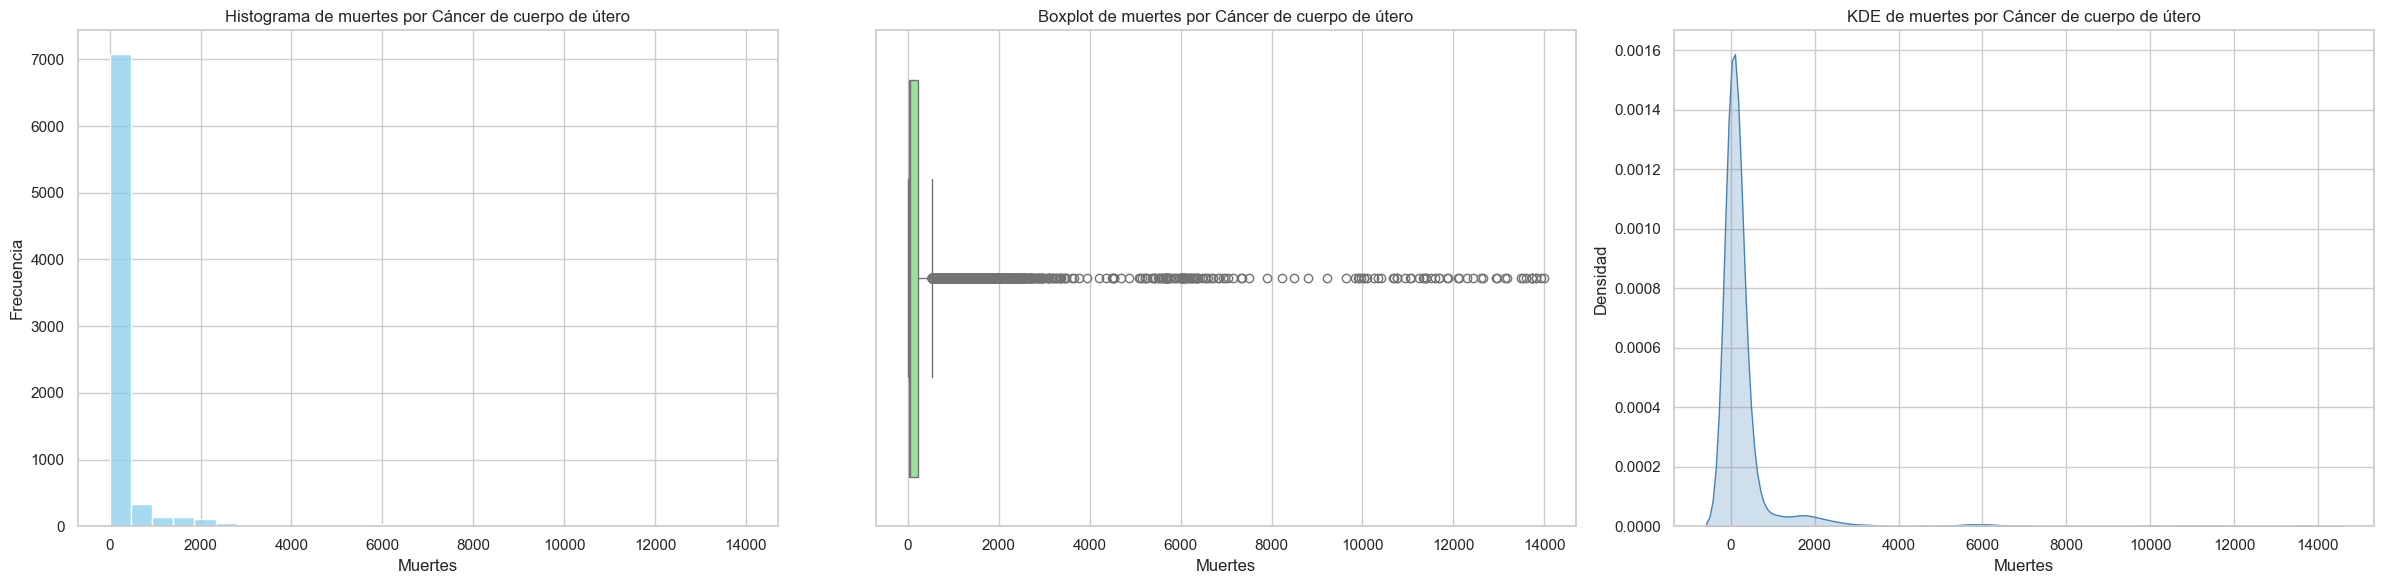

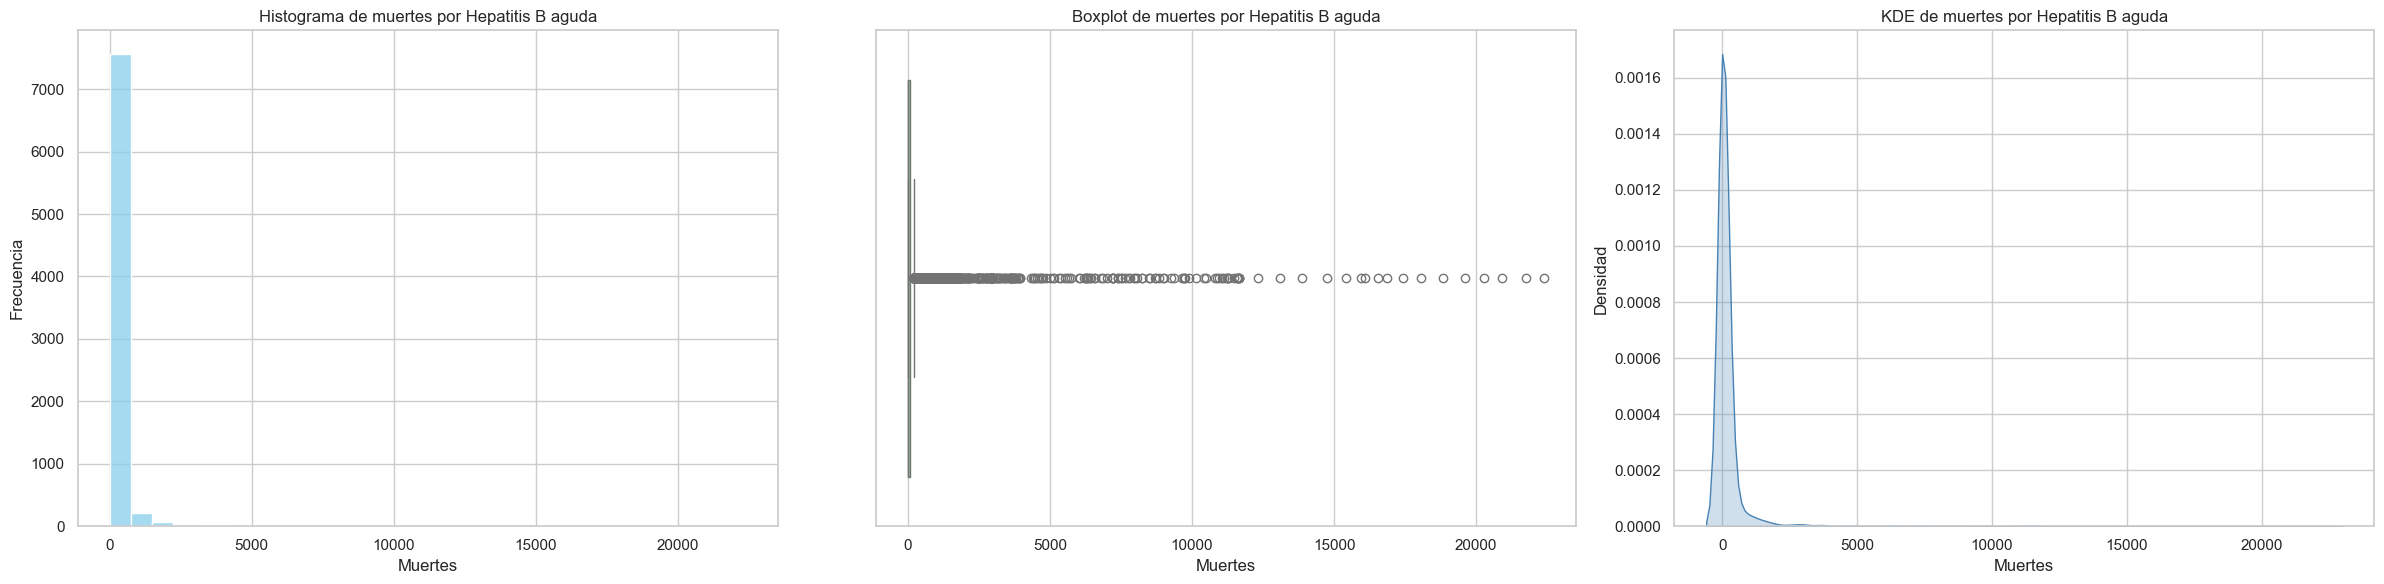

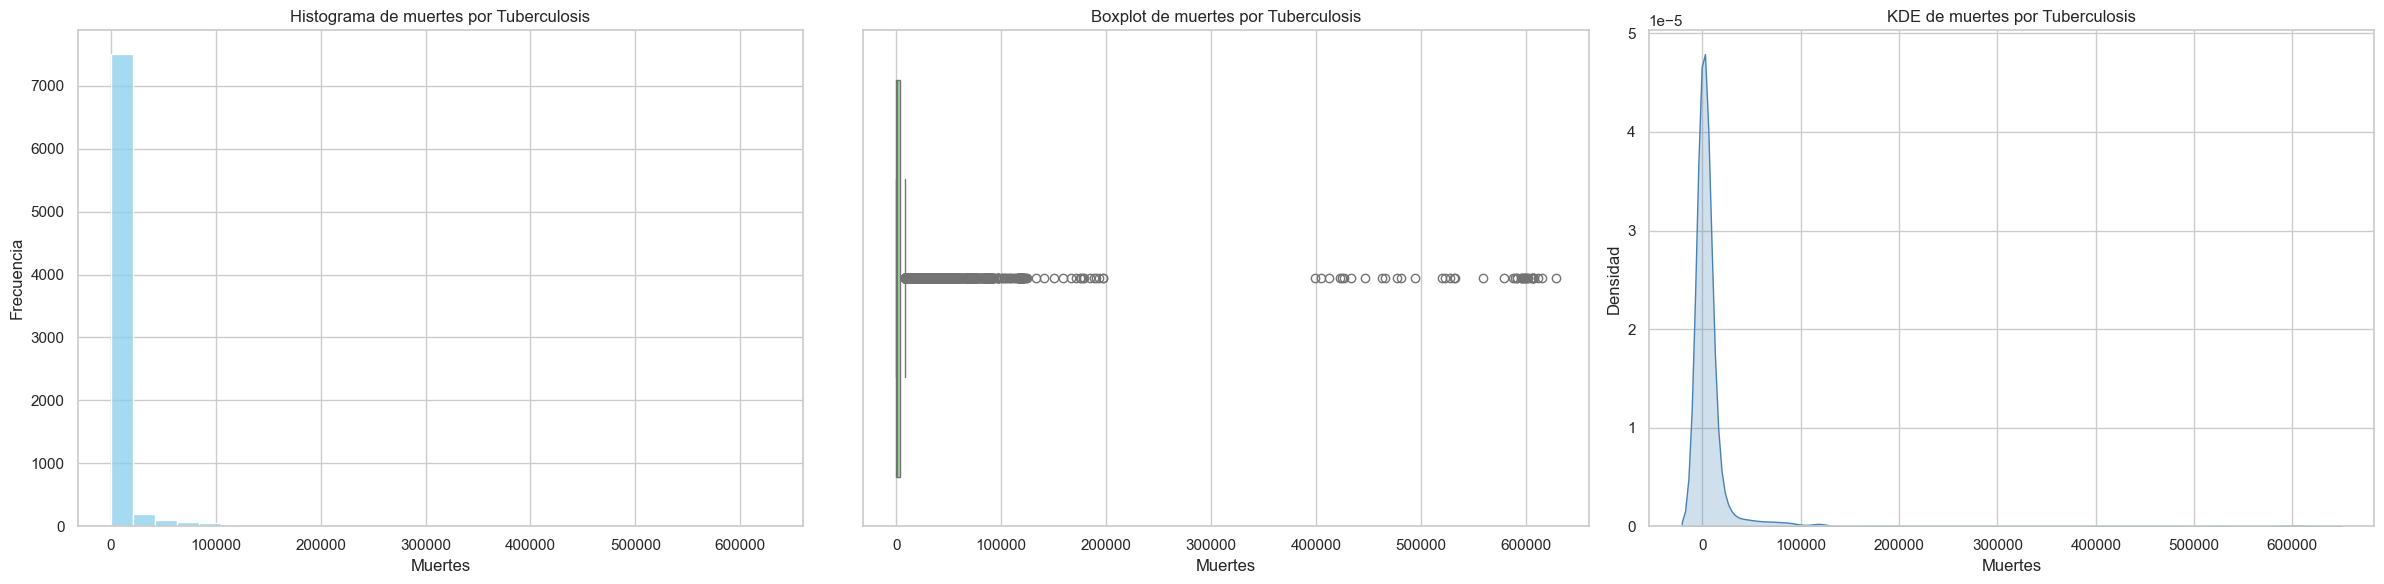

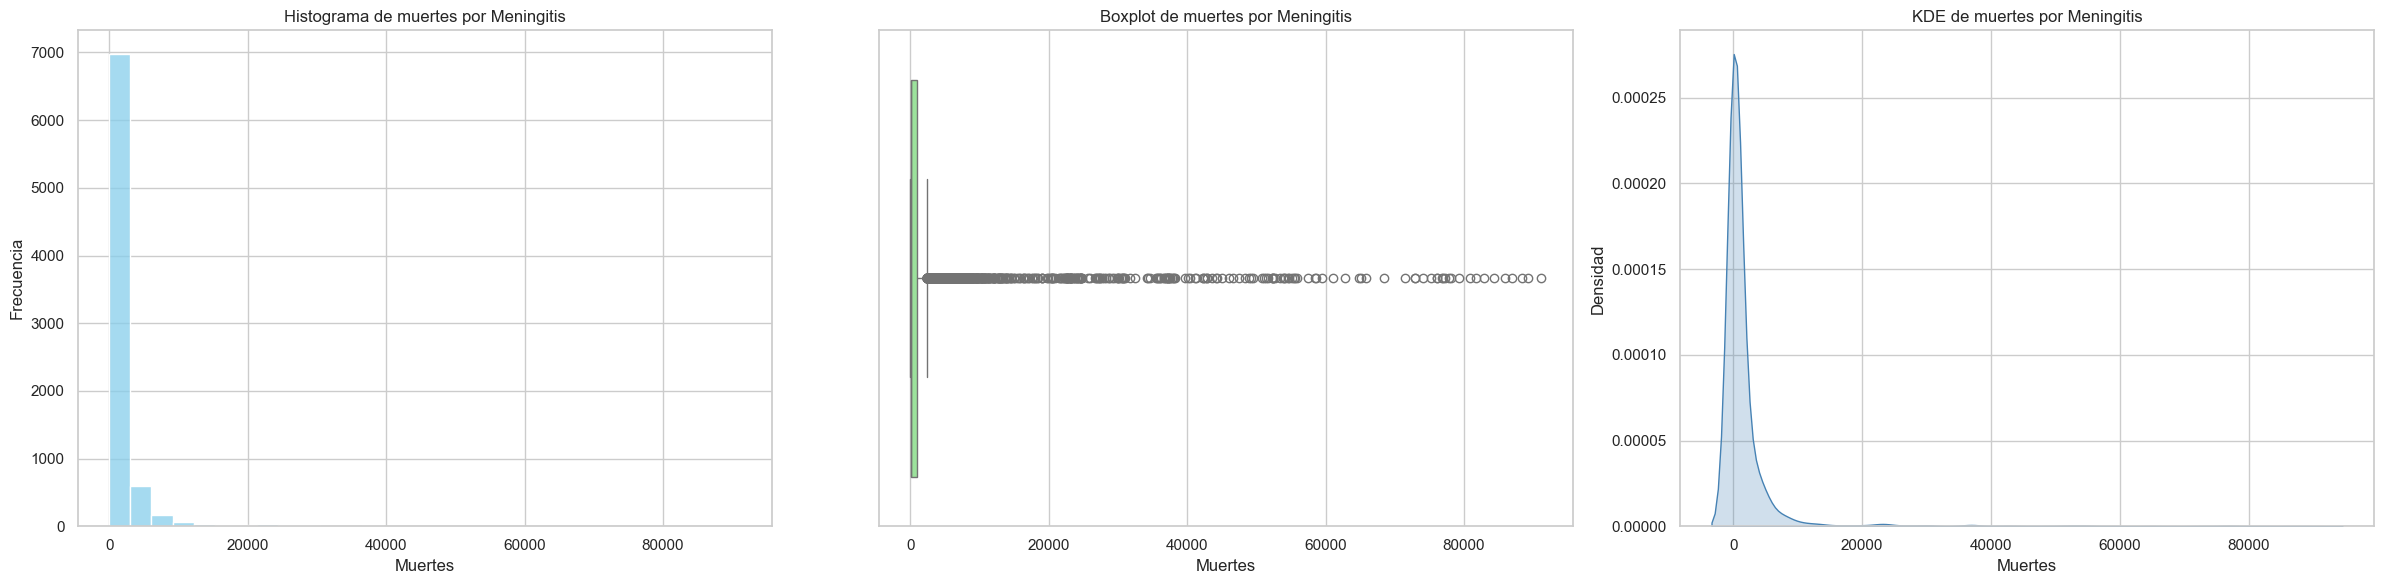

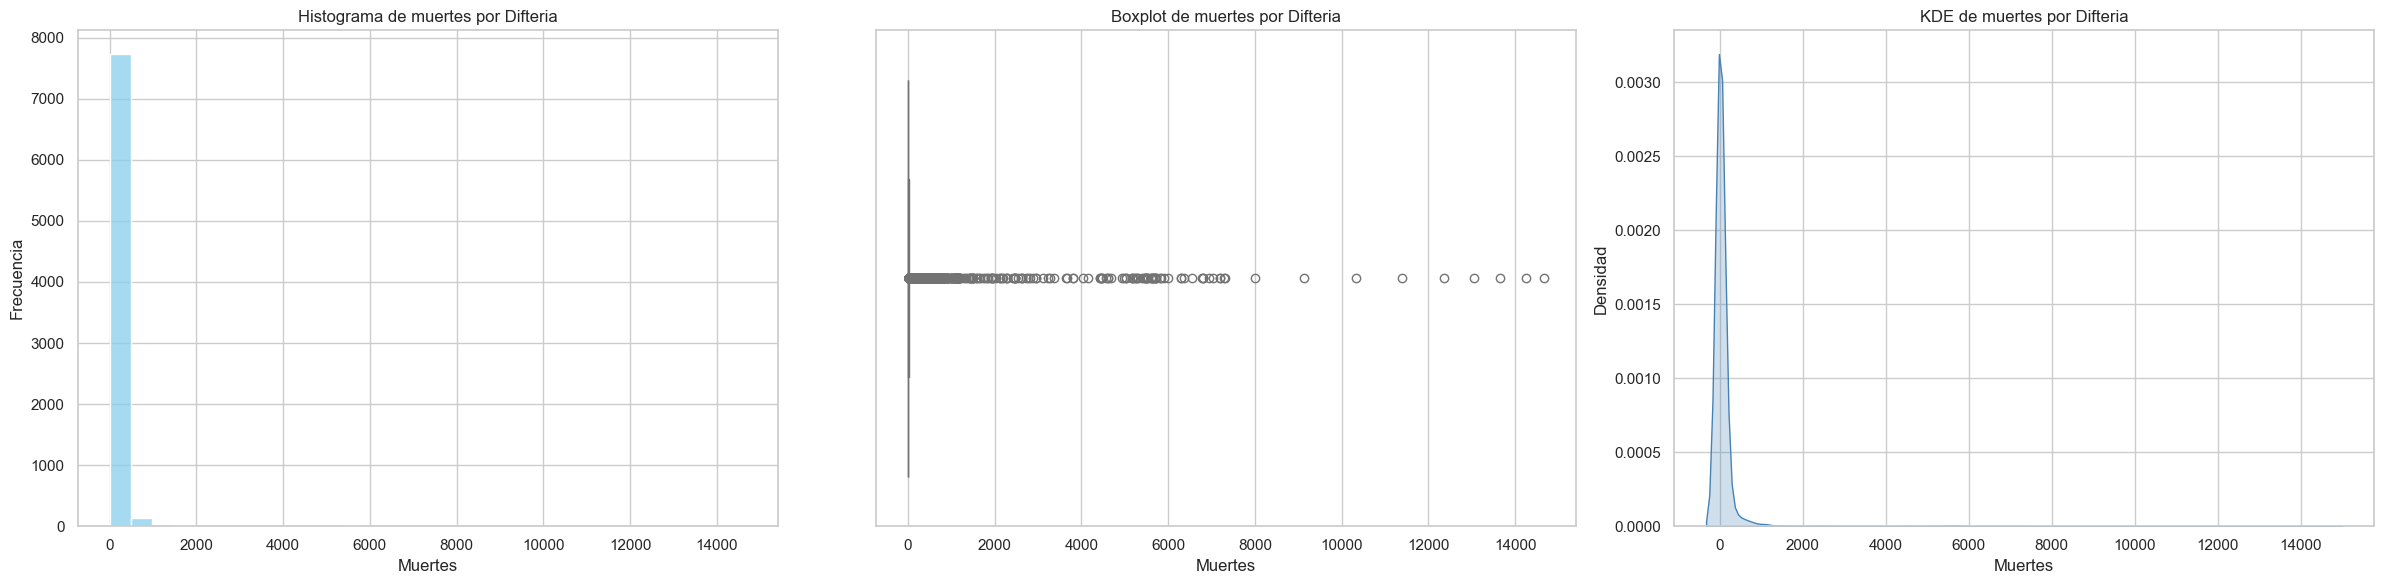

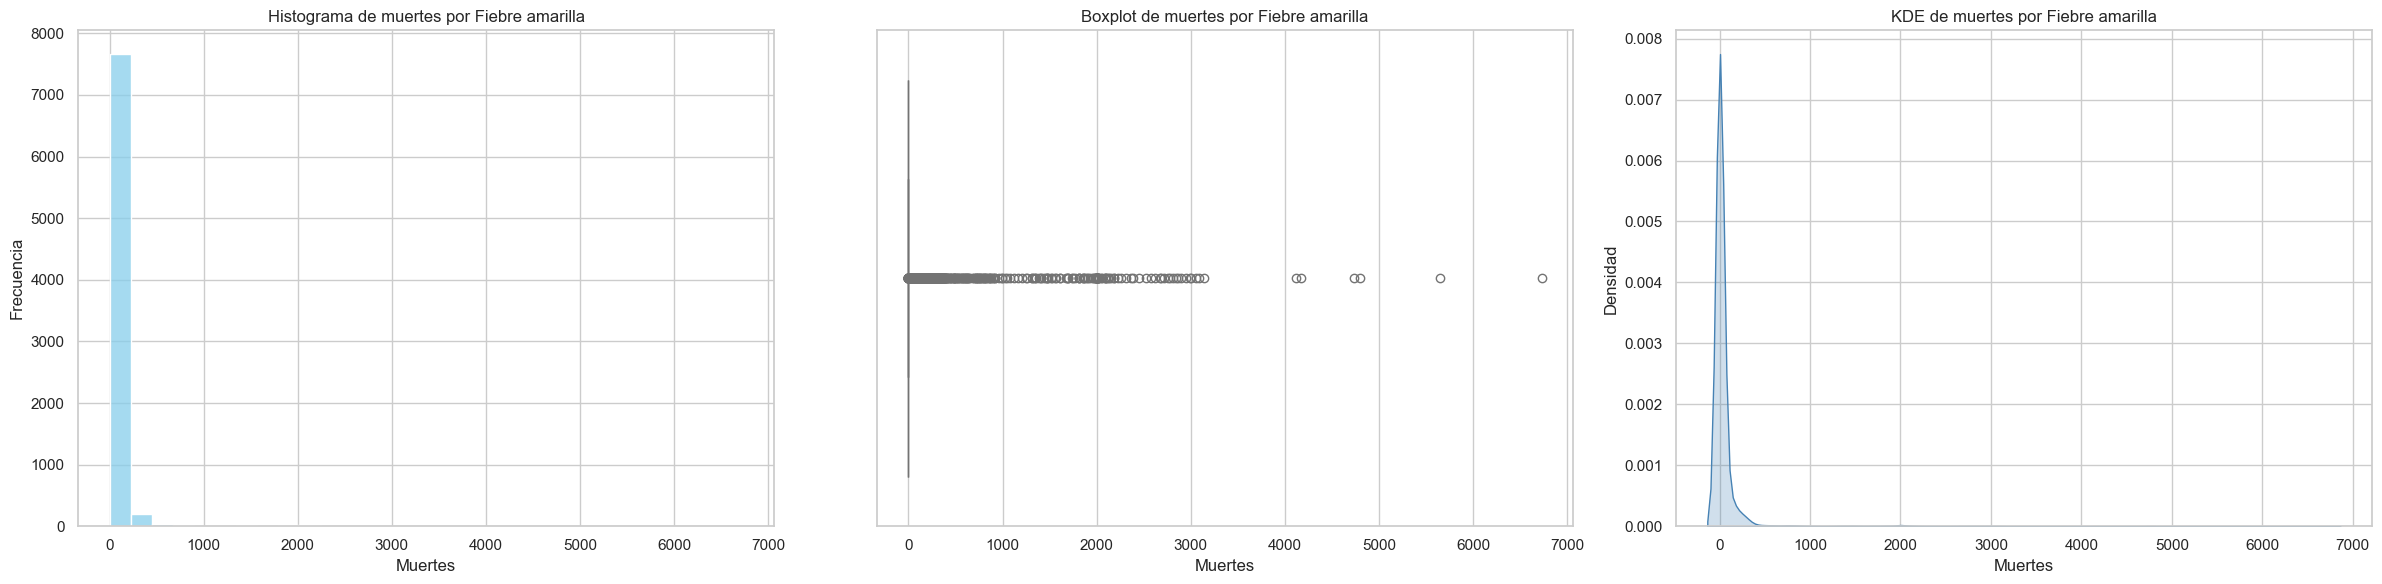

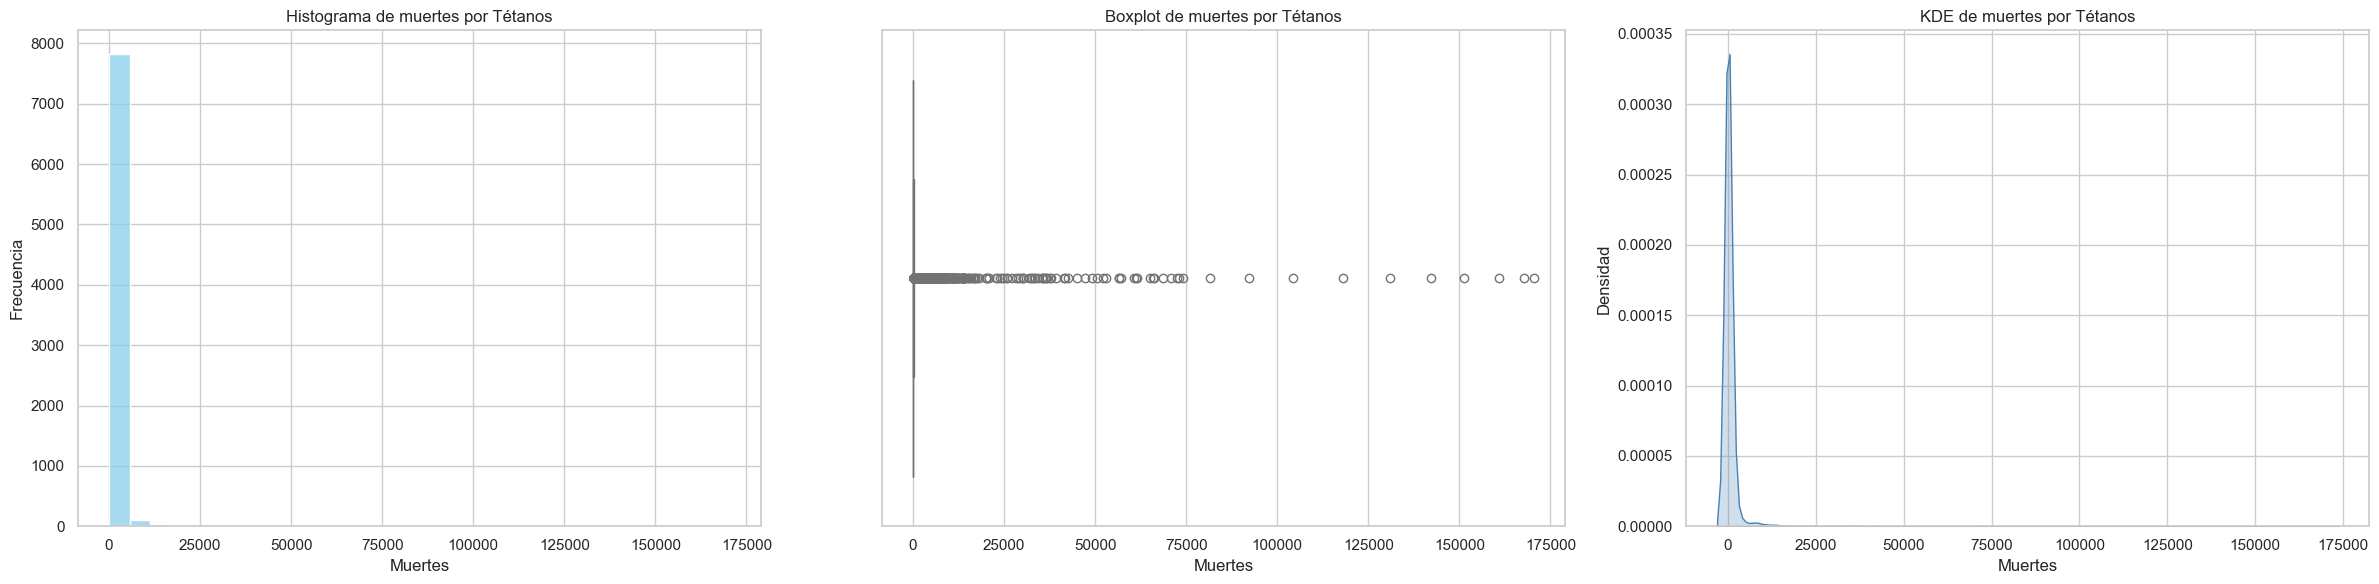

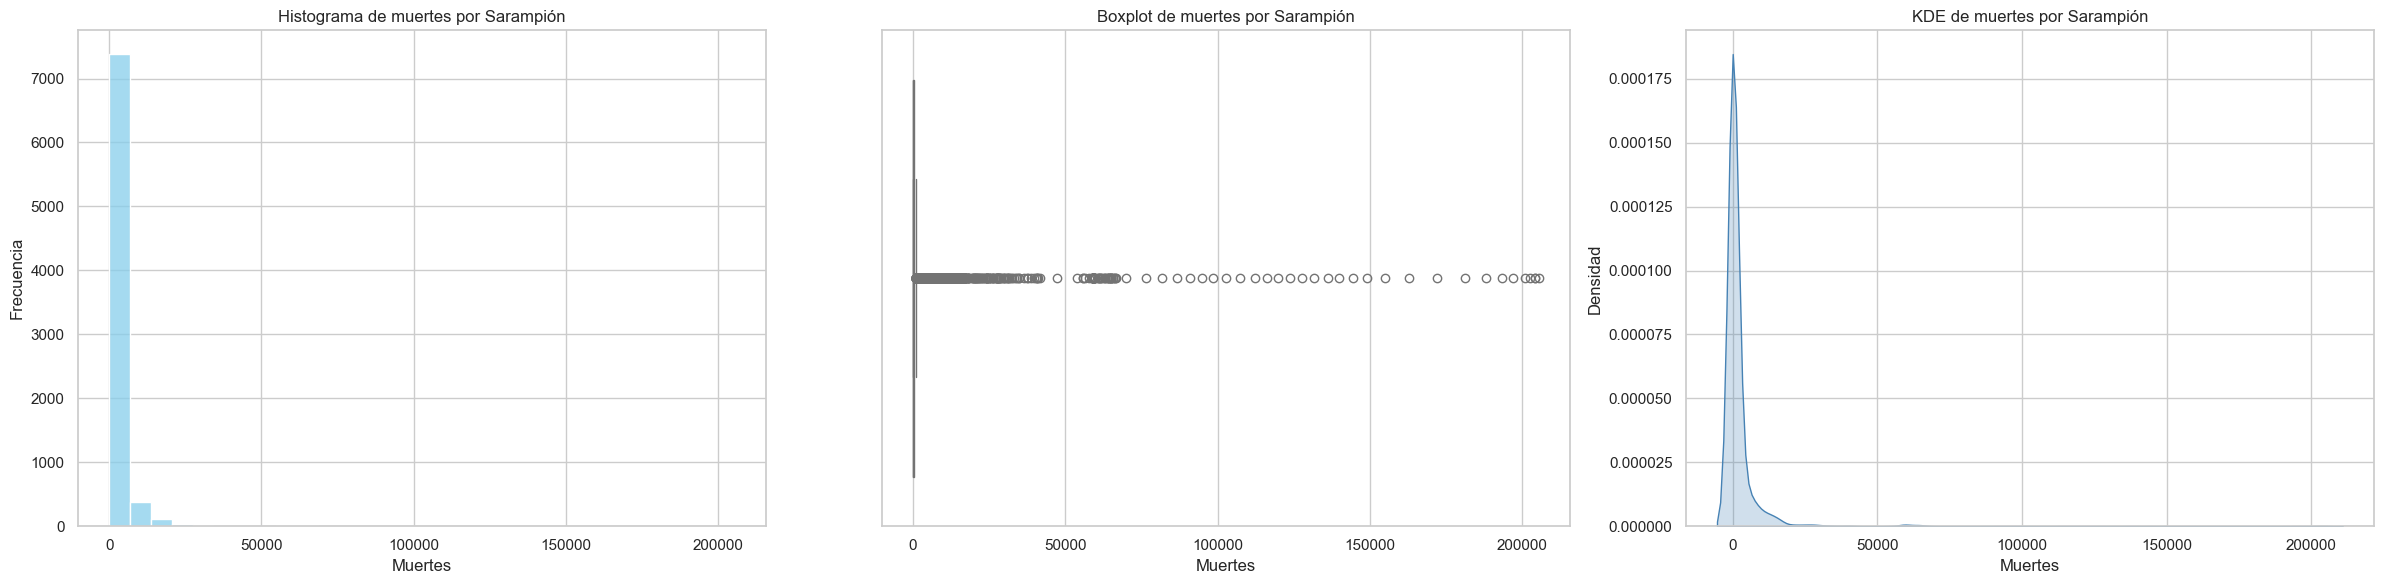

In [42]:
# GRAFICO HISTOGRAMA Y BOXPLOT
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

for cause in preventable_deaths['Causa de muerte'].unique():
    plt.figure(figsize=(24, 6))
    filtered_data = preventable_deaths[preventable_deaths['Causa de muerte'] == cause]

    # HISTOGRAMA
    plt.subplot(1, 3, 1)
    sns.histplot(filtered_data['Muertes'], kde=False, color="skyblue", bins=30)
    plt.title(f"Histograma de muertes por {cause}")
    plt.xlabel('Muertes')
    plt.ylabel('Frecuencia')

    # BOXPLOT
    plt.subplot(1, 3, 2)
    sns.boxplot(x=filtered_data['Muertes'], color="lightgreen")
    plt.title(f"Boxplot de muertes por {cause}")
    plt.xlabel('Muertes')

    # KDE
    plt.subplot(1, 3, 3)
    sns.kdeplot(filtered_data['Muertes'], fill=True, color="steelblue")
    plt.title(f"KDE de muertes por {cause}")
    plt.xlabel('Muertes')
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

In [33]:
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA 'MUERTES' EN 2019 A NIVEL GLOBAL
deaths_col = "Muertes"
global_deaths_2019 = preventable_deaths[preventable_deaths['Año'] == 2019]
sum_deaths_2019 = global_deaths_2019.groupby("País")[deaths_col].sum()

print(f"Estadísticas descriptivas globales para '{deaths_col}' en 2019:")
print(f"Media: {sum_deaths_2019.mean():.2f}")
print(f"Mediana: {sum_deaths_2019.median():.2f}")
print(f"Moda: {sum_deaths_2019.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {sum_deaths_2019.std():.2f}")
print(f"Varianza: {sum_deaths_2019.var():.2f}")
print(f"Mínimo: {sum_deaths_2019.min():.2f}")
print(f"Máximo: {sum_deaths_2019.max():.2f}")
print(f"Rango: {sum_deaths_2019.max() - sum_deaths_2019.min():.2f}")
print(f"Percentil 25: {sum_deaths_2019.quantile(0.25):.2f}")
print(f"Percentil 50: {sum_deaths_2019.quantile(0.50):.2f}")
print(f"Percentil 75: {sum_deaths_2019.quantile(0.75):.2f}")

# ANÁLISIS ESTADÍSTICO PARA ESPAÑA A LO LARGO DEL TIEMPO
spain_deaths = preventable_deaths[preventable_deaths['País'] == 'España']
spain_deaths_sum = spain_deaths.groupby("Año")[deaths_col].sum()

print(f"\nEstadísticas descriptivas de '{deaths_col}' en España a lo largo de los años:")
print(f"Media: {spain_deaths_sum.mean():.2f}")
print(f"Mediana: {spain_deaths_sum.median():.2f}")
print(f"Moda: {spain_deaths_sum.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {spain_deaths_sum.std():.2f}")
print(f"Varianza: {spain_deaths_sum.var():.2f}")
print(f"Mínimo: {spain_deaths_sum.min():.2f}")
print(f"Máximo: {spain_deaths_sum.max():.2f}")
print(f"Rango: {spain_deaths_sum.max() - spain_deaths_sum.min():.2f}")
print(f"Percentil 25: {spain_deaths_sum.quantile(0.25):.2f}")
print(f"Percentil 50: {spain_deaths_sum.quantile(0.50):.2f}")
print(f"Percentil 75: {spain_deaths_sum.quantile(0.75):.2f}")

Estadísticas descriptivas globales para 'Muertes' en 2019:
Media: 8764.31
Mediana: 706.74
Moda: 0.17
Desviación estándar: 37449.96
Varianza: 1402499460.98
Mínimo: 0.17
Máximo: 474534.06
Rango: 474533.89
Percentil 25: 135.01
Percentil 50: 706.74
Percentil 75: 4152.09

Estadísticas descriptivas de 'Muertes' en España a lo largo de los años:
Media: 2312.28
Mediana: 2120.39
Moda: 1953.68
Desviación estándar: 356.36
Varianza: 126991.83
Mínimo: 1953.68
Máximo: 3376.93
Rango: 1423.25
Percentil 25: 2079.50
Percentil 50: 2120.39
Percentil 75: 2459.61


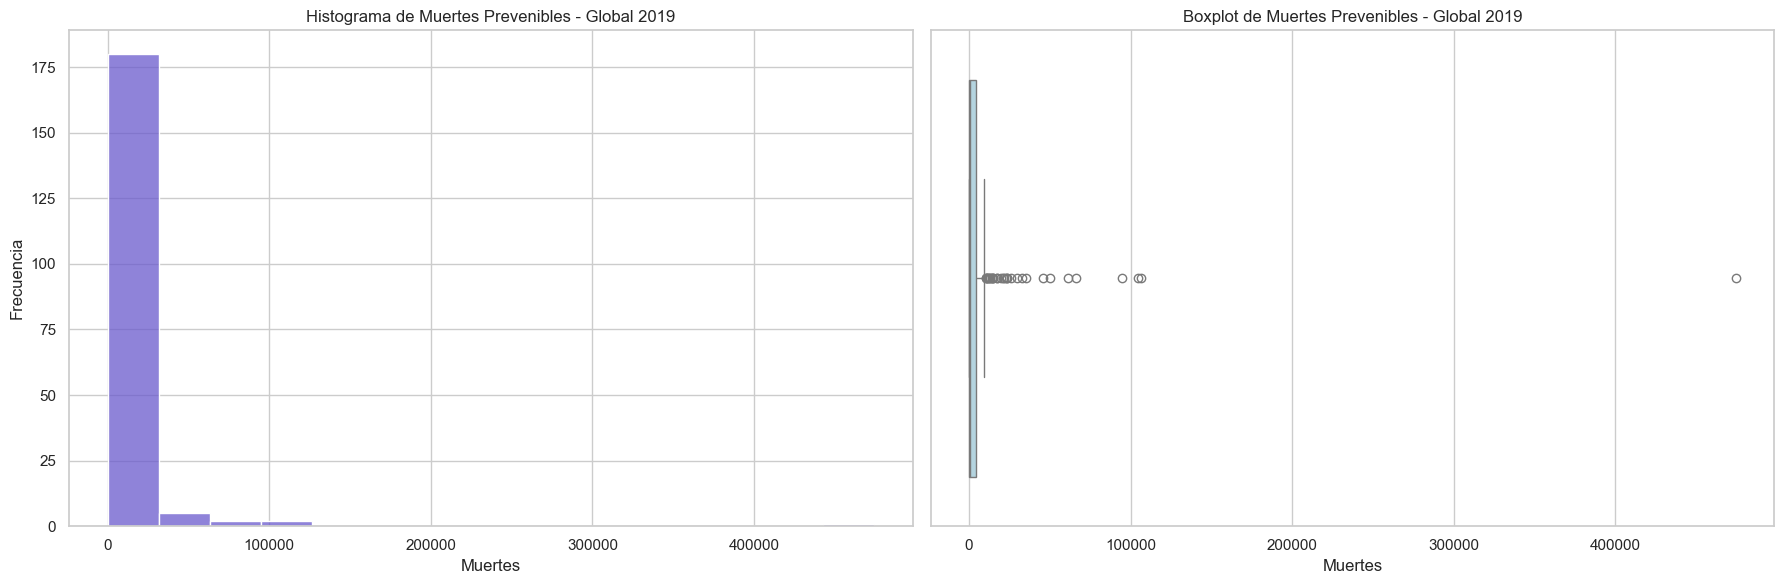

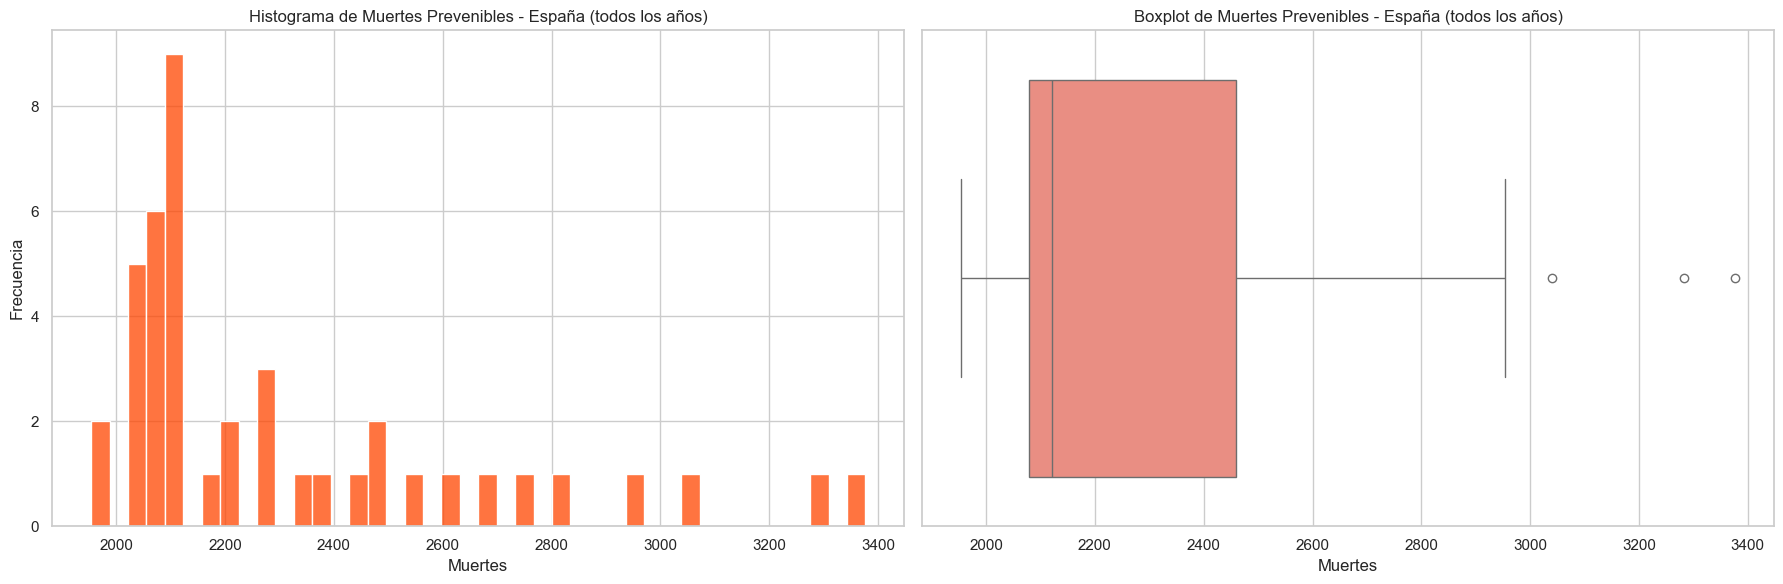

In [ ]:
# GRAFICO HISTOGRAMA Y BOXPLOT DE MUERTES QUE SE PODRÍAN HABER PREVENIDO POR VACUNACIÓN PARA EL AÑO 2019 A NIVEL GLOBAL Y EN ESPAÑA A LO LARGO DE LOS AÑOS
sns.set(style="whitegrid")

# GLOBAL 2019
plt.figure(figsize=(24, 6))

# HISTOGRAMA 2019
plt.subplot(1, 3, 1)
sns.histplot(sum_deaths_2019, kde=False, color="slateblue", bins=15)
plt.title("Histograma de Muertes Prevenibles - Global 2019")
plt.xlabel("Muertes")
plt.ylabel("Frecuencia")

# BOXPLOT 2019
plt.subplot(1, 3, 2)
sns.boxplot(x=sum_deaths_2019, color="lightblue")
plt.title("Boxplot de Muertes Prevenibles - Global 2019")
plt.xlabel("Muertes")

# KDE 2019
plt.subplot(1, 3, 3)
sns.kdeplot(sum_deaths_2019, fill=True, color="mediumslateblue")
plt.title("KDE de Muertes Prevenibles - Global 2019")
plt.xlabel("Muertes")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

# ESPAÑA A LO LARGO DE LOS AÑOS 
plt.figure(figsize=(24, 6))

# HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 1)
sns.histplot(spain_deaths_sum, kde=False, color="orangered", bins=len(spain_deaths_sum))
plt.title("Histograma de Muertes Prevenibles - España (todos los años)")
plt.xlabel("Muertes")
plt.ylabel("Frecuencia")

# BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 2)
sns.boxplot(x=spain_deaths_sum, color="salmon")
plt.title("Boxplot de Muertes Prevenibles - España (todos los años)")
plt.xlabel("Muertes")

# KDE ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 3)
sns.kdeplot(spain_deaths_sum, fill=True, color="tomato")
plt.title("KDE de Muertes Prevenibles - España (todos los años)")
plt.xlabel("Muertes")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

GDP

In [ ]:
# EXPLORO EL DATAFRAME GDP 
print(gdp.head(10000)) 
print(gdp.info()) 
for column in gdp.columns: 
    print(f"Columna: {column}") 
    print(gdp[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
gdp.isna().sum() 

,Entity,Code,Year,ny_gdp_pcap_pp_kd
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182
...,...,...,...,...
7058,Zimbabwe,ZWE,2019,3294.8062
7059,Zimbabwe,ZWE,2020,2987.2698
7060,Zimbabwe,ZWE,2021,3184.7854
7061,Zimbabwe,ZWE,2022,3323.1218


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7063 entries, 0 to 7062
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             7063 non-null   object 
 1   Code               6605 non-null   object 
 2   Year               7063 non-null   int64  
 3   ny_gdp_pcap_pp_kd  7063 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 220.8+ KB


None

Columna: Entity
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia and Pacific (WB)'
 'East Timor' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Europe and Central Asia (WB)'
 'European Union (27)' 'Faeroe Islands' 'Fiji' 'Finland' 'France' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'G

Entity                 0
Code                 458
Year                   0
ny_gdp_pcap_pp_kd      0
dtype: int64

In [34]:
# ELIMINO LA COLUMNA "CODE"
gdp.drop(columns=["Code"], inplace=True) 

# ELIMINO LAS FILAS DE GEOGRAFÍAS REPETIDAS 
repeated_geographies = ['Bermuda', 'East Asia and Pacific (WB)', 'Europe and Central Asia (WB)', 'European Union (27)', 'High-income countries', 'Latin America and Caribbean (WB)', 'Low-income countries', 'Lower-middle-income countries', 'Middle East and North Africa (WB)', 'Middle-income countries', 'North America (WB)', 'South Asia (WB)', 'Sub-Saharan Africa (WB)', 'United States Virgin Islands', 'Upper-middle-income countries', 'World']
gdp = gdp[~gdp['Entity'].isin(repeated_geographies)] 

# TRADUZCO Y REEMPLAZO LOS NOMBRES DE LOS PAÍSES Y DE LAS COLUMNAS AL ESPAÑOL 
country_translation_dict = {
    'Afghanistan': 'Afganistán', 'Albania': 'Albania', 'Algeria': 'Argelia', 'Andorra': 'Andorra',
    'Angola': 'Angola', 'Antigua and Barbuda': 'Antigua y Barbuda', 'Argentina': 'Argentina',
    'Armenia': 'Armenia', 'Aruba': 'Aruba', 'Australia': 'Australia', 'Austria': 'Austria',
    'Azerbaijan': 'Azerbaiyán', 'Bahamas': 'Bahamas', 'Bahrain': 'Baréin', 'Bangladesh': 'Bangladesh', 'Barbados': 'Barbados',
    'Belarus': 'Bielorrusia', 'Belgium': 'Bélgica', 'Belize': 'Belice', 'Benin': 'Benín',
    'Bhutan': 'Bután', 'Bolivia': 'Bolivia', 'Bosnia and Herzegovina': 'Bosnia y Herzegovina', 'Botswana': 'Botsuana',
    'Brazil': 'Brasil', 'Brunei': 'Brunéi', 'Bulgaria': 'Bulgaria', 'Burkina Faso': 'Burkina Faso',
    'Burundi': 'Burundi', 'Cambodia': 'Camboya', 'Cameroon': 'Camerún', 'Canada': 'Canadá',
    'Cape Verde': 'Cabo Verde', 'Cayman Islands': 'Islas Caimán', 'Central African Republic': 'República Centroafricana', 'Chad': 'Chad',
    'Chile': 'Chile', 'China': 'China', 'Colombia': 'Colombia', 'Comoros': 'Comoras',
    'Congo': 'Congo', 'Costa Rica': 'Costa Rica', "Cote d'Ivoire": 'Costa de Marfil', 'Croatia': 'Croacia',
    'Curacao': 'Curazao', 'Cyprus': 'Chipre', 'Czechia': 'República Checa', 'Democratic Republic of Congo': 'República Democrática del Congo',
    'Denmark': 'Dinamarca', 'Djibouti': 'Yibuti', 'Dominica': 'Dominica', 'Dominican Republic': 'República Dominicana',
    'East Timor': 'Timor Oriental', 'Ecuador': 'Ecuador', 'Egypt': 'Egipto', 'El Salvador': 'El Salvador',
    'Equatorial Guinea': 'Guinea Ecuatorial', 'Estonia': 'Estonia', 'Eswatini': 'Esuatini', 'Ethiopia': 'Etiopía',
    'Faeroe Islands': 'Islas Feroe', 'Fiji': 'Fiyi', 'Finland': 'Finlandia', 'France': 'Francia',
    'Gabon': 'Gabón', 'Gambia': 'Gambia', 'Georgia': 'Georgia', 'Germany': 'Alemania',
    'Ghana': 'Ghana', 'Greece': 'Grecia', 'Greenland': 'Groenlandia', 'Grenada': 'Granada',
    'Guatemala': 'Guatemala', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bisáu', 'Guyana': 'Guyana',
    'Haiti': 'Haití', 'Honduras': 'Honduras', 'Hong Kong': 'Hong Kong', 'Hungary': 'Hungría',
    'Iceland': 'Islandia', 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Irán',
    'Iraq': 'Irak', 'Ireland': 'Irlanda', 'Israel': 'Israel', 'Italy': 'Italia',
    'Jamaica': 'Jamaica', 'Japan': 'Japón', 'Jordan': 'Jordania', 'Kazakhstan': 'Kazajistán',
    'Kenya': 'Kenia', 'Kiribati': 'Kiribati', 'Kosovo': 'Kosovo', 'Kuwait': 'Kuwait',
    'Kyrgyzstan': 'Kirguistán', 'Laos': 'Laos', 'Latvia': 'Letonia', 'Lebanon': 'Líbano',
    'Lesotho': 'Lesoto', 'Liberia': 'Liberia', 'Libya': 'Libia', 'Lithuania': 'Lituania',
    'Luxembourg': 'Luxemburgo', 'Macao': 'Macao', 'Madagascar': 'Madagascar', 'Malawi': 'Malaui',
    'Malaysia': 'Malasia', 'Maldives': 'Maldivas', 'Mali': 'Malí', 'Malta': 'Malta',
    'Marshall Islands': 'Islas Marshall', 'Mauritania': 'Mauritania', 'Mauritius': 'Mauricio', 'Mexico': 'México',
    'Micronesia (country)': 'Micronesia', 'Moldova': 'Moldavia', 'Mongolia': 'Mongolia', 'Montenegro': 'Montenegro',
    'Morocco': 'Marruecos', 'Mozambique': 'Mozambique', 'Myanmar': 'Birmania', 'Namibia': 'Namibia',
    'Nauru': 'Nauru', 'Nepal': 'Nepal', 'Netherlands': 'Países Bajos', 'New Zealand': 'Nueva Zelanda',
    'Nicaragua': 'Nicaragua', 'Niger': 'Níger', 'Nigeria': 'Nigeria', 'North Macedonia': 'Macedonia del Norte',
    'Norway': 'Noruega', 'Oman': 'Omán', 'Pakistan': 'Pakistán', 'Palau': 'Palaos',
    'Palestine': 'Palestina', 'Panama': 'Panamá', 'Papua New Guinea': 'Papúa Nueva Guinea', 'Paraguay': 'Paraguay',
    'Peru': 'Perú', 'Philippines': 'Filipinas', 'Poland': 'Polonia', 'Portugal': 'Portugal',
    'Puerto Rico': 'Puerto Rico', 'Qatar': 'Catar', 'Romania': 'Rumanía', 'Russia': 'Rusia',
    'Rwanda': 'Ruanda', 'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 'Saint Lucia': 'Santa Lucía', 'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas',
    'Samoa': 'Samoa', 'San Marino': 'San Marino', 'Sao Tome and Principe': 'Santo Tomé y Príncipe', 'Saudi Arabia': 'Arabia Saudita',
    'Senegal': 'Senegal', 'Serbia': 'Serbia', 'Seychelles': 'Seychelles', 'Sierra Leone': 'Sierra Leona',
    'Singapore': 'Singapur', 'Sint Maarten (Dutch part)': 'Sint Maarten (parte neerlandesa)',
    'Slovakia': 'Eslovaquia', 'Slovenia': 'Eslovenia', 'Solomon Islands': 'Islas Salomón', 'Somalia': 'Somalia',
    'South Africa': 'Sudáfrica', 'South Korea': 'Corea del Sur', 'Spain': 'España', 'Sri Lanka': 'Sri Lanka',
    'Sudan': 'Sudán', 'Suriname': 'Surinam', 'Sweden': 'Suecia', 'Switzerland': 'Suiza',
    'Syria': 'Siria', 'Tajikistan': 'Tayikistán', 'Tanzania': 'Tanzania', 'Thailand': 'Tailandia',
    'Togo': 'Togo', 'Tonga': 'Tonga', 'Trinidad and Tobago': 'Trinidad y Tobago', 'Tunisia': 'Túnez',
    'Turkey': 'Turquía', 'Turkmenistan': 'Turkmenistán', 'Turks and Caicos Islands': 'Islas Turcas y Caicos', 'Tuvalu': 'Tuvalu',
    'Uganda': 'Uganda', 'Ukraine': 'Ucrania', 'United Arab Emirates': 'Emiratos Árabes Unidos', 'United Kingdom': 'Reino Unido',
    'United States': 'Estados Unidos', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistán', 'Vanuatu': 'Vanuatu',
    'Vietnam': 'Vietnam', 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabue'
}
gdp['Entity'] = gdp['Entity'].replace(country_translation_dict)
gdp.columns = ['País', 'Año', 'PIB per cápita a precios constantes']

In [ ]:
# EXPLORO NUEVAMENTE EL DATAFRAME GDP PARA CHEQUEAR QUE ESTÉ LIMPIO
print(gdp.head(10000)) 
print(gdp.info()) 
for column in gdp.columns: 
    print(f"Columna: {column}") 
    print(gdp[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
gdp.isna().sum() 

,País,Año,PIB per cápita a precios constantes
0,Afganistán,2000,1617.8264
1,Afganistán,2001,1454.1108
2,Afganistán,2002,1774.3087
3,Afganistán,2003,1815.9282
4,Afganistán,2004,1776.9182
...,...,...,...
7058,Zimbabue,2019,3294.8062
7059,Zimbabue,2020,2987.2698
7060,Zimbabue,2021,3184.7854
7061,Zimbabue,2022,3323.1218


<class 'pandas.core.frame.DataFrame'>
Index: 6532 entries, 0 to 7062
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 6532 non-null   object 
 1   Año                                  6532 non-null   int64  
 2   PIB per cápita a precios constantes  6532 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.1+ KB


None

Columna: País
['Afganistán' 'Albania' 'Argelia' 'Andorra' 'Angola' 'Antigua y Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaiyán'
 'Bahamas' 'Baréin' 'Bangladesh' 'Barbados' 'Bielorrusia' 'Bélgica'
 'Belice' 'Benín' 'Bután' 'Bolivia' 'Bosnia y Herzegovina' 'Botsuana'
 'Brasil' 'Brunéi' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Camboya' 'Camerún'
 'Canadá' 'Cabo Verde' 'Islas Caimán' 'República Centroafricana' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoras' 'Congo' 'Costa Rica'
 'Costa de Marfil' 'Croacia' 'Curazao' 'Chipre' 'República Checa'
 'República Democrática del Congo' 'Dinamarca' 'Yibuti' 'Dominica'
 'República Dominicana' 'Timor Oriental' 'Ecuador' 'Egipto' 'El Salvador'
 'Guinea Ecuatorial' 'Estonia' 'Esuatini' 'Etiopía' 'Islas Feroe' 'Fiyi'
 'Finlandia' 'Francia' 'Gabón' 'Gambia' 'Georgia' 'Alemania' 'Ghana'
 'Grecia' 'Groenlandia' 'Granada' 'Guatemala' 'Guinea' 'Guinea-Bisáu'
 'Guyana' 'Haití' 'Honduras' 'Hong Kong' 'Hungría' 'Islandia' 'India'
 'Indonesia' '

País                                   0
Año                                    0
PIB per cápita a precios constantes    0
dtype: int64

In [35]:
# HAGO ANÁLISIS ESTADÍSTICO DESCRIPTIVO 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

gdp_mean = gdp['PIB per cápita a precios constantes'].mean() 
gdp_median = gdp['PIB per cápita a precios constantes'].median() 
gdp_mode = gdp['PIB per cápita a precios constantes'].mode().iloc[0] 
gdp_std = gdp['PIB per cápita a precios constantes'].std() 
gdp_var = gdp['PIB per cápita a precios constantes'].var() 
gdp_percentile_25 = gdp['PIB per cápita a precios constantes'].quantile(0.25) 
gdp_percentile_50 = gdp['PIB per cápita a precios constantes'].quantile(0.50) 
gdp_percentile_75 = gdp['PIB per cápita a precios constantes'].quantile(0.75) 
gdp_min = gdp['PIB per cápita a precios constantes'].min() 
gdp_max = gdp['PIB per cápita a precios constantes'].max()
gdp_range = gdp_max - gdp_min
print(f"La media por año y país es:\n{gdp_mean}\n") 
print(f"La mediana por año y país es:\n{gdp_median}\n") 
print(f"La moda por año y país es:\n{gdp_mode}\n") 
print(f"La desviación estándar por año y país es:\n{gdp_std}\n") 
print(f"La varianza por año y país es:\n{gdp_var}\n")
print(f"El percentil 25 por año y país es:\n{gdp_percentile_25}\n") 
print(f"El percentil 50 por año y país es:\n{gdp_percentile_50}\n") 
print(f"El percentil 75 por año y país es:\n{gdp_percentile_75}\n") 
print(f"El valor mínimo por año y país es:\n{gdp_min}\n") 
print(f"El valor máximo por año y país es:\n{gdp_max}\n") 
print(f"El rango por año y país es:\n{gdp_range}\n") 


La media por año y país es:
21227.725654533067

La mediana por año y país es:
12308.323

La moda por año y país es:
24910.422

La desviación estándar por año y país es:
23480.469083871332

La varianza por año y país es:
551332428.3986374

El percentil 25 por año y país es:
4274.681375

El percentil 50 por año y país es:
12308.323

El percentil 75 por año y país es:
31103.816

El valor mínimo por año y país es:
510.8228

El valor máximo por año y país es:
174339.08

El rango por año y país es:
173828.2572



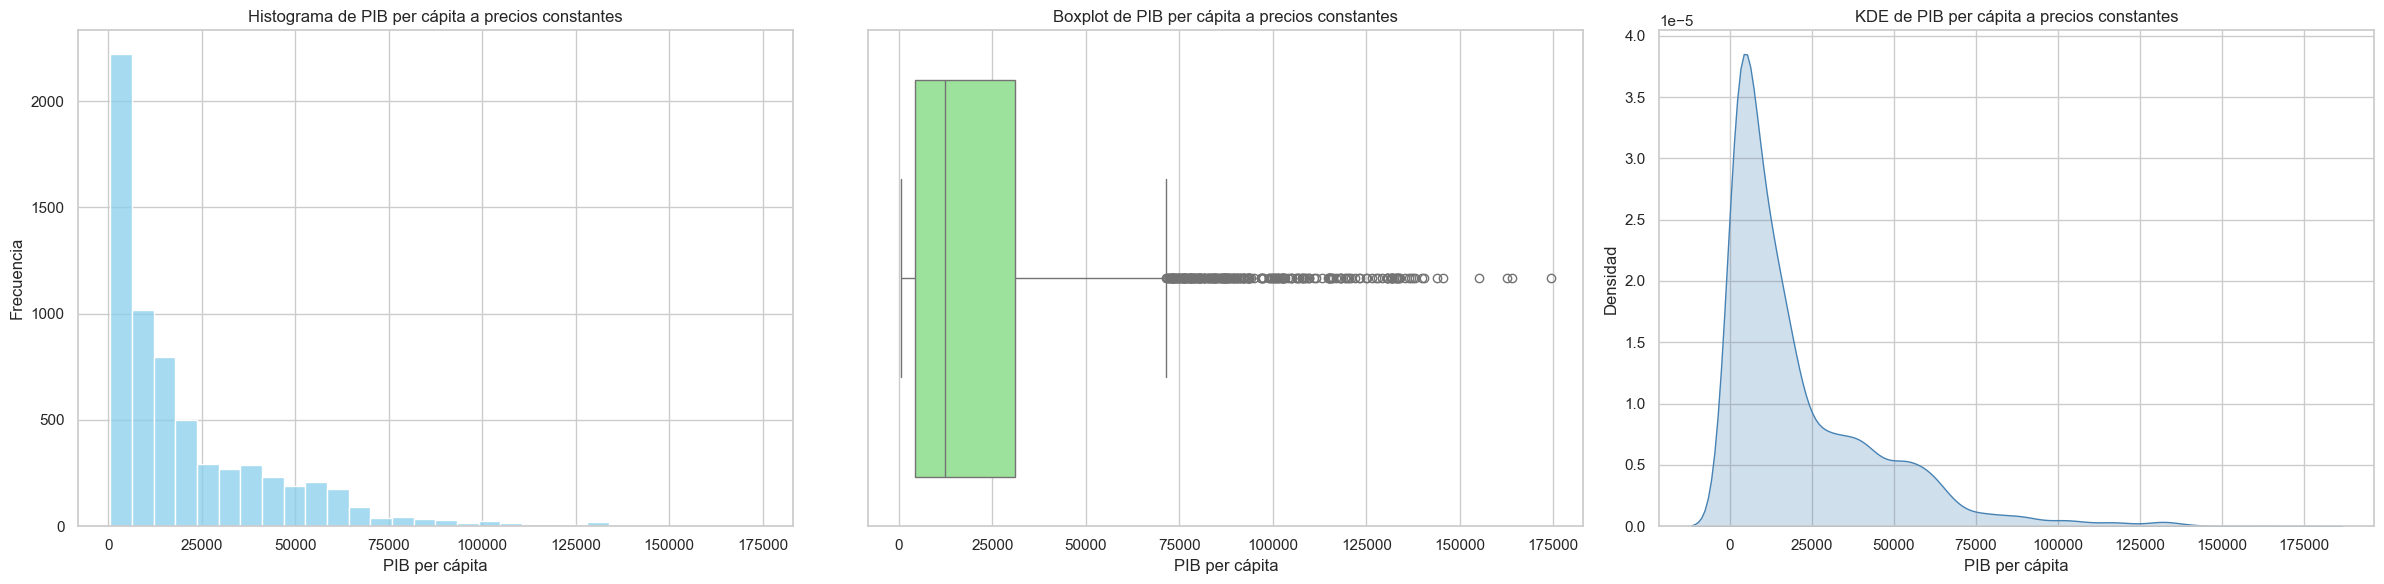

In [47]:
# GRAFICO HISTOGRAMA Y BOXPLOT DEL PIB
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

sns.set(style="whitegrid")
column = 'PIB per cápita a precios constantes'
plt.figure(figsize=(24, 6))

# HISTOGRAMA
plt.subplot(1, 3, 1)
sns.histplot(gdp[column], kde=False, color="skyblue", bins=30)
plt.title(f"Histograma de {column}")
plt.xlabel('PIB per cápita')
plt.ylabel('Frecuencia')

# BOXPLOT
plt.subplot(1, 3, 2)
sns.boxplot(x=gdp[column], color="lightgreen")
plt.title(f"Boxplot de {column}")
plt.xlabel('PIB per cápita')

# KDE
plt.subplot(1, 3, 3)
sns.kdeplot(gdp[column], fill=True, color="steelblue")
plt.title(f"KDE de {column}")
plt.xlabel('PIB per cápita')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


In [36]:
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA 'PIB per cápita a precios constantes' EN 2019 A NIVEL GLOBAL
gdp_col = "PIB per cápita a precios constantes"
global_gdp_2019 = gdp[gdp['Año'] == 2019]
values_gdp_2019 = global_gdp_2019[gdp_col]

print(f"Estadísticas descriptivas globales para '{gdp_col}' en 2019:")
print(f"Media: {values_gdp_2019.mean():.2f}")
print(f"Mediana: {values_gdp_2019.median():.2f}")
print(f"Moda: {values_gdp_2019.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {values_gdp_2019.std():.2f}")
print(f"Varianza: {values_gdp_2019.var():.2f}")
print(f"Mínimo: {values_gdp_2019.min():.2f}")
print(f"Máximo: {values_gdp_2019.max():.2f}")
print(f"Rango: {values_gdp_2019.max() - values_gdp_2019.min():.2f}")
print(f"Percentil 25: {values_gdp_2019.quantile(0.25):.2f}")
print(f"Percentil 50: {values_gdp_2019.quantile(0.50):.2f}")
print(f"Percentil 75: {values_gdp_2019.quantile(0.75):.2f}")

# ANÁLISIS ESTADÍSTICO PARA ESPAÑA A LO LARGO DEL TIEMPO
spain_gdp = gdp[gdp['País'] == 'España']
spain_gdp_values = spain_gdp[gdp_col]

print(f"\nEstadísticas descriptivas de '{gdp_col}' en España a lo largo de los años:")
print(f"Media: {spain_gdp_values.mean():.2f}")
print(f"Mediana: {spain_gdp_values.median():.2f}")
print(f"Moda: {spain_gdp_values.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {spain_gdp_values.std():.2f}")
print(f"Varianza: {spain_gdp_values.var():.2f}")
print(f"Mínimo: {spain_gdp_values.min():.2f}")
print(f"Máximo: {spain_gdp_values.max():.2f}")
print(f"Rango: {spain_gdp_values.max() - spain_gdp_values.min():.2f}")
print(f"Percentil 25: {spain_gdp_values.quantile(0.25):.2f}")
print(f"Percentil 50: {spain_gdp_values.quantile(0.50):.2f}")
print(f"Percentil 75: {spain_gdp_values.quantile(0.75):.2f}")

Estadísticas descriptivas globales para 'PIB per cápita a precios constantes' en 2019:
Media: 25779.96
Mediana: 16186.35
Moda: 855.73
Desviación estándar: 25900.68
Varianza: 670845073.60
Mínimo: 855.73
Máximo: 134105.64
Rango: 133249.91
Percentil 25: 6264.02
Percentil 50: 16186.35
Percentil 75: 37698.95

Estadísticas descriptivas de 'PIB per cápita a precios constantes' en España a lo largo de los años:
Media: 40489.86
Mediana: 41817.50
Moda: 31639.24
Desviación estándar: 4840.33
Varianza: 23428805.90
Mínimo: 31639.24
Máximo: 47141.54
Rango: 15502.30
Percentil 25: 36888.44
Percentil 50: 41817.50
Percentil 75: 44084.18


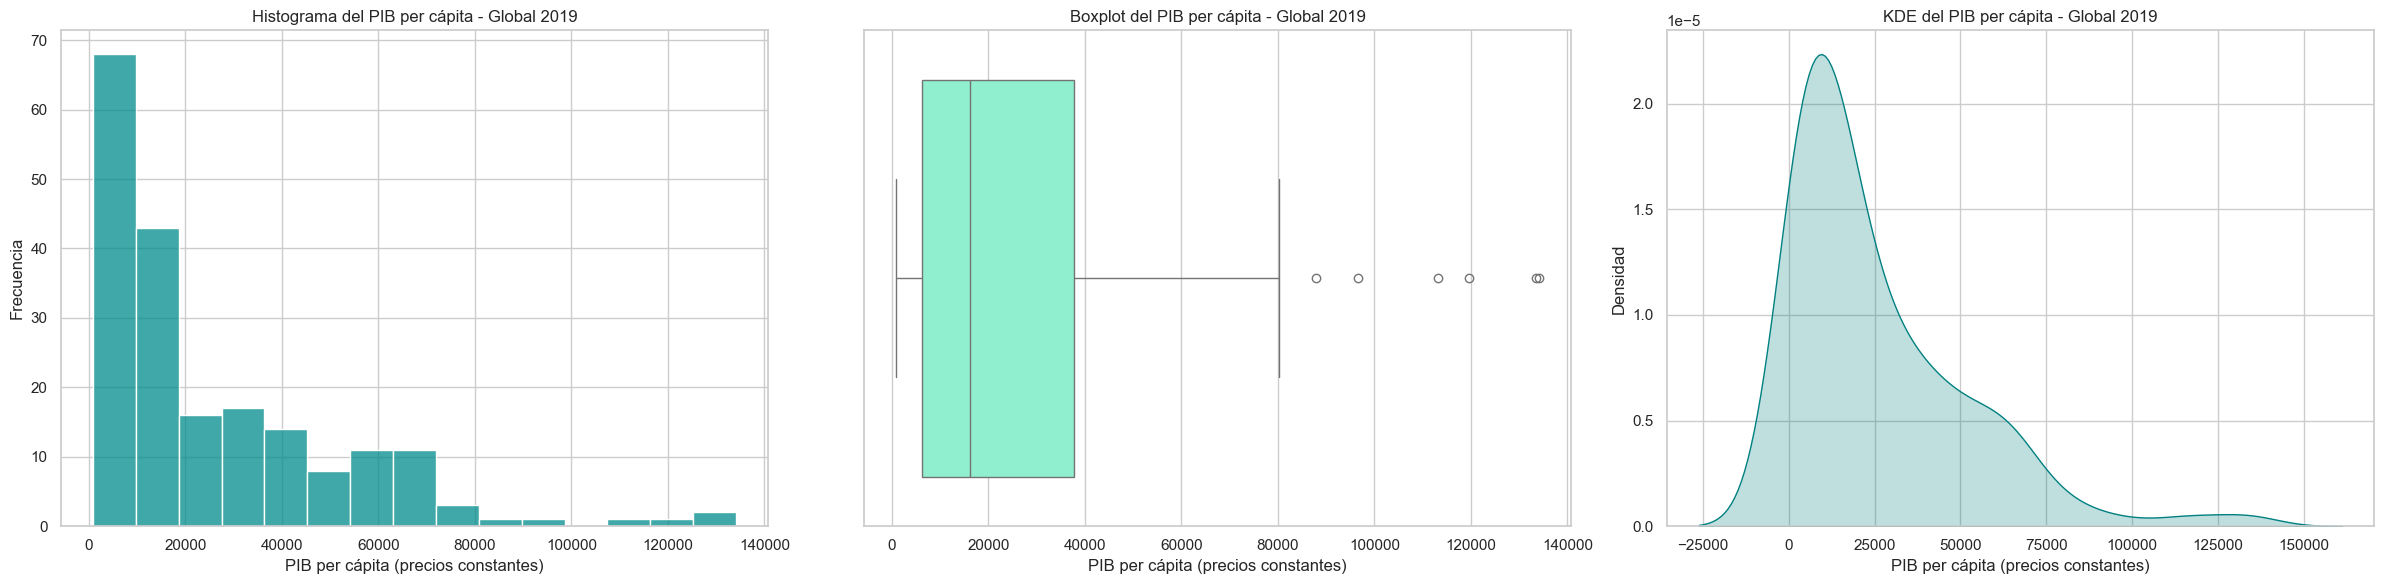

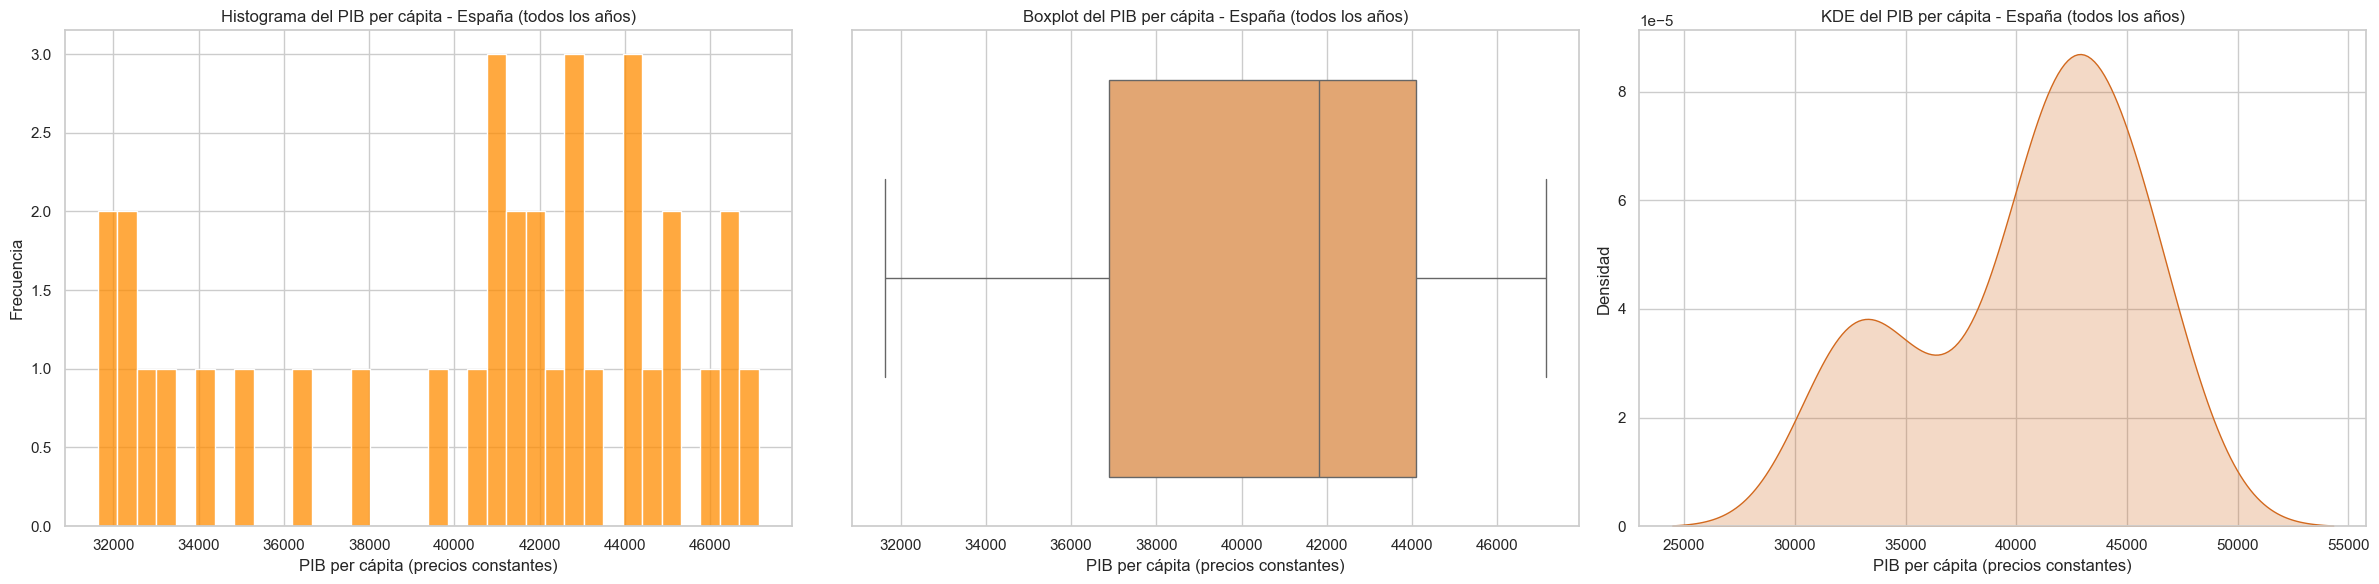

In [ ]:
# GRAFICO HISTOGRAMA Y BOXPLOT DEL PIB EN 2019 A NIVEL GLOBAL Y EN ESPAÑA A LO LARGO DE LOS AÑOS

sns.set(style="whitegrid")

# GLOBAL 2019
plt.figure(figsize=(24, 6))

# HISTOGRAMA 2019
plt.subplot(1, 3, 1)
sns.histplot(values_gdp_2019, kde=False, color="darkcyan", bins=15)
plt.title("Histograma del PIB per cápita - Global 2019")
plt.xlabel("PIB per cápita (precios constantes)")
plt.ylabel("Frecuencia")

# BOXPLOT 2019
plt.subplot(1, 3, 2)
sns.boxplot(x=values_gdp_2019, color="aquamarine")
plt.title("Boxplot del PIB per cápita - Global 2019")
plt.xlabel("PIB per cápita (precios constantes)")

# KDE 2019
plt.subplot(1, 3, 3)
sns.kdeplot(values_gdp_2019, fill=True, color="teal")
plt.title("KDE del PIB per cápita - Global 2019")
plt.xlabel("PIB per cápita (precios constantes)")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

# ESPAÑA A LO LARGO DE LOS AÑOS
plt.figure(figsize=(24, 6))

# HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 1)
sns.histplot(spain_gdp_values, kde=False, color="darkorange", bins=len(spain_gdp_values))
plt.title("Histograma del PIB per cápita - España (todos los años)")
plt.xlabel("PIB per cápita (precios constantes)")
plt.ylabel("Frecuencia")

# BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 2)
sns.boxplot(x=spain_gdp_values, color="sandybrown")
plt.title("Boxplot del PIB per cápita - España (todos los años)")
plt.xlabel("PIB per cápita (precios constantes)")

# KDE ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 3)
sns.kdeplot(spain_gdp_values, fill=True, color="chocolate")
plt.title("KDE del PIB per cápita - España (todos los años)")
plt.xlabel("PIB per cápita (precios constantes)")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

LITERACY

In [ ]:
# EXPLORO EL DATAFRAME LITERACY 
print(literacy.head(10000)) 
print(literacy.info()) 
for column in literacy.columns: 
    print(f"Columna: {column}") 
    print(literacy[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
literacy.isna().sum() 

,Entity,Code,Year,combined_literacy
0,Afghanistan,AFG,1979,18.00000
1,Afghanistan,AFG,2011,31.00000
2,Afghanistan,AFG,2015,33.75384
3,Afghanistan,AFG,2021,37.00000
4,Albania,ALB,2001,99.00000
...,...,...,...,...
2399,Zimbabwe,ZWE,2011,83.58271
2400,Zimbabwe,ZWE,2014,88.69342
2401,Zimbabwe,ZWE,2015,86.87348
2402,Zimbabwe,ZWE,2019,93.22755


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             2404 non-null   object 
 1   Code               1738 non-null   object 
 2   Year               2404 non-null   int64  
 3   combined_literacy  2404 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 75.3+ KB


None

Columna: Entity
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Arab World' 'Arab World (WB)'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Central Europe and the Baltics (WB)'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)'
 'East Asia a

Entity                 0
Code                 666
Year                   0
combined_literacy      0
dtype: int64

In [37]:
# ELIMINO LAS FILAS DE GEOGRAFÍAS REPETIDAS 
repeated_geographies = ['Arab World', 'Arab World (WB)', 'British Virgin Islands', 'Caribbean small states', 'Central Europe and the Baltics', 'Central Europe and the Baltics (WB)', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'East Asia and the Pacific (WB)', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'Europe and Central Asia (WB)', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (IDA & IBRD)', 'Latin America & Caribbean (excluding high income)', 'Latin America and Caribbean (WB)', 'Least developed countries: UN classification', 'Low income', 'Low-income countries', 'Lower middle income', 'Lower-middle-income countries', 'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD)', 'Middle East & North Africa (excluding high income)', 'Middle East and North Africa (WB)', 'Middle income', 'North America (WB)', 'Northern Mariana Islands', 'Other small states', 'Pacific island small states', 'Pre-demographic dividend', 'Saint Pierre and Miquelon', 'Small states', 'South Asia', 'South Asia (IDA & IBRD)', 'South Asia (WB)', 'Southern and Eastern Africa (WB)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD)', 'Sub-Saharan Africa (WB)', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'Upper-middle-income countries', 'Virgin Islands', 'Western and Central Africa (WB)', 'World']
literacy = literacy[~literacy['Entity'].isin(repeated_geographies)] 

# ELIMINO LA COLUMNA "CODE"
literacy.drop(columns=["Code"], inplace=True) 

# TRADUZCO Y REEMPLAZO LOS NOMBRES DE LOS PAÍSES Y DE LAS COLUMNAS AL ESPAÑOL 
country_translation_dict = {
    'Afghanistan': 'Afganistán', 'Albania': 'Albania', 'Algeria': 'Argelia', 'American Samoa': 'Samoa Americana', 'Andorra': 'Andorra', 'Angola': 'Angola',
    'Anguilla': 'Anguila', 'Antigua and Barbuda': 'Antigua y Barbuda', 'Argentina': 'Argentina', 'Armenia': 'Armenia', 'Aruba': 'Aruba',
    'Australia': 'Australia', 'Austria': 'Austria', 'Azerbaijan': 'Azerbaiyán', 'Bahamas': 'Bahamas', 'Bahrain': 'Baréin', 'Bangladesh': 'Bangladés',
    'Barbados': 'Barbados', 'Belarus': 'Bielorrusia', 'Belgium': 'Bélgica', 'Belize': 'Belice', 'Benin': 'Benín', 'Bermuda': 'Bermudas', 'Bhutan': 'Bután',
    'Bolivia': 'Bolivia', 'Bosnia and Herzegovina': 'Bosnia y Herzegovina', 'Botswana': 'Botsuana', 'Brazil': 'Brasil', 'Brunei': 'Brunéi',
    'Bulgaria': 'Bulgaria', 'Burkina Faso': 'Burkina Faso', 'Burundi': 'Burundi', 'Cambodia': 'Camboya', 'Cameroon': 'Camerún', 'Canada': 'Canadá',
    'Cape Verde': 'Cabo Verde', 'Cayman Islands': 'Islas Caimán', 'Central African Republic': 'República Centroafricana', 'Chad': 'Chad', 'Chile': 'Chile',
    'China': 'China', 'Colombia': 'Colombia', 'Comoros': 'Comoras', 'Congo': 'Congo', 'Cook Islands': 'Islas Cook', 'Costa Rica': 'Costa Rica',
    'Cote d\'Ivoire': 'Costa de Marfil', 'Croatia': 'Croacia', 'Cuba': 'Cuba', 'Cyprus': 'Chipre', 'Czechia': 'República Checa',
    'Democratic Republic of Congo': 'República Democrática del Congo', 'Denmark': 'Dinamarca', 'Djibouti': 'Yibuti', 'Dominica': 'Dominica',
    'Dominican Republic': 'República Dominicana', 'East Timor': 'Timor Oriental', 'Ecuador': 'Ecuador', 'Egypt': 'Egipto', 'El Salvador': 'El Salvador',
    'Equatorial Guinea': 'Guinea Ecuatorial', 'Eritrea': 'Eritrea', 'Estonia': 'Estonia', 'Eswatini': 'Esuatini', 'Ethiopia': 'Etiopía', 'Fiji': 'Fiyi',
    'Finland': 'Finlandia', 'France': 'Francia', 'French Polynesia': 'Polinesia Francesa', 'Gabon': 'Gabón', 'Gambia': 'Gambia', 'Georgia': 'Georgia',
    'Germany': 'Alemania', 'Ghana': 'Ghana', 'Gibraltar': 'Gibraltar', 'Greece': 'Grecia', 'Greenland': 'Groenlandia', 'Grenada': 'Granada', 'Guam': 'Guam',
    'Guatemala': 'Guatemala', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bisáu', 'Guyana': 'Guyana', 'Haiti': 'Haití', 'Honduras': 'Honduras',
    'Hong Kong': 'Hong Kong', 'Hungary': 'Hungría', 'Iceland': 'Islandia', 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Irán', 'Iraq': 'Irak',
    'Ireland': 'Irlanda', 'Israel': 'Israel', 'Italy': 'Italia', 'Jamaica': 'Jamaica', 'Japan': 'Japón', 'Jordan': 'Jordania', 'Kazakhstan': 'Kazajistán',
    'Kenya': 'Kenia', 'Kiribati': 'Kiribati', 'Kosovo': 'Kosovo', 'Kuwait': 'Kuwait', 'Kyrgyzstan': 'Kirguistán', 'Laos': 'Laos', 'Latvia': 'Letonia',
    'Lebanon': 'Líbano', 'Lesotho': 'Lesoto', 'Liberia': 'Liberia', 'Libya': 'Libia', 'Liechtenstein': 'Liechtenstein', 'Lithuania': 'Lituania',
    'Luxembourg': 'Luxemburgo', 'Macao': 'Macao', 'Madagascar': 'Madagascar', 'Malawi': 'Malawi', 'Malaysia': 'Malasia', 'Maldives': 'Maldivas', 'Mali': 'Malí',
    'Malta': 'Malta', 'Marshall Islands': 'Islas Marshall', 'Mauritania': 'Mauritania', 'Mauritius': 'Mauricio', 'Mexico': 'México', 'Micronesia': 'Micronesia',
    'Moldova': 'Moldavia', 'Monaco': 'Mónaco', 'Mongolia': 'Mongolia', 'Montenegro': 'Montenegro', 'Montserrat': 'Montserrat', 'Morocco': 'Marruecos',
    'Mozambique': 'Mozambique', 'Myanmar': 'Birmania', 'Namibia': 'Namibia', 'Nepal': 'Nepal', 'Netherlands': 'Países Bajos', 'New Caledonia': 'Nueva Caledonia',
    'New Zealand': 'Nueva Zelanda', 'Nicaragua': 'Nicaragua', 'Niger': 'Níger', 'Nigeria': 'Nigeria', 'Niue': 'Niue', 'North Korea': 'Corea del Norte',
    'North Macedonia': 'Macedonia del Norte', 'Norway': 'Noruega', 'Oman': 'Omán', 'Pakistan': 'Pakistán', 'Palau': 'Palau', 'Palestine': 'Palestina', 'Panama': 'Panamá',
    'Papua New Guinea': 'Papúa Nueva Guinea', 'Paraguay': 'Paraguay', 'Peru': 'Perú', 'Philippines': 'Filipinas', 'Poland': 'Polonia', 'Portugal': 'Portugal',
    'Puerto Rico': 'Puerto Rico', 'Qatar': 'Catar', 'Romania': 'Rumanía', 'Russia': 'Rusia', 'Rwanda': 'Ruanda', 'Saint Helena': 'Santa Elena',
    'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 'Saint Lucia': 'Santa Lucía', 'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas',
    'Samoa': 'Samoa', 'San Marino': 'San Marino', 'Sao Tome and Principe': 'Santo Tomé y Príncipe', 'Saudi Arabia': 'Arabia Saudita', 'Senegal': 'Senegal',
    'Serbia': 'Serbia', 'Seychelles': 'Seychelles', 'Sierra Leone': 'Sierra Leona', 'Singapore': 'Singapur', 'Slovakia': 'Eslovaquia', 'Slovenia': 'Eslovenia',
    'Solomon Islands': 'Islas Salomón', 'Somalia': 'Somalia', 'South Africa': 'Sudáfrica', 'South Korea': 'Corea del Sur', 'South Sudan': 'Sudán del Sur',
    'Spain': 'España', 'Sri Lanka': 'Sri Lanka', 'Sudan': 'Sudán', 'Suriname': 'Surinam', 'Sweden': 'Suecia', 'Switzerland': 'Suiza', 'Syria': 'Siria',
    'Taiwan': 'Taiwán', 'Tajikistan': 'Tayikistán', 'Tanzania': 'Tanzania', 'Thailand': 'Tailandia', 'Togo': 'Togo', 'Tonga': 'Tonga',
    'Trinidad and Tobago': 'Trinidad y Tobago', 'Tunisia': 'Túnez', 'Turkey': 'Turquía', 'Turkmenistan': 'Turkmenistán',
    'Turks and Caicos Islands': 'Islas Turcas y Caicos', 'Uganda': 'Uganda', 'Ukraine': 'Ucrania', 'United Arab Emirates': 'Emiratos Árabes Unidos',
    'United Kingdom': 'Reino Unido', 'United States': 'Estados Unidos', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistán', 'Vanuatu': 'Vanuatu',
    'Vatican': 'Vaticano', 'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam', 'Wallis and Futuna': 'Wallis y Futuna', 'Yemen': 'Yemen', 'Zambia': 'Zambia',
    'Zimbabwe': 'Zimbabue'
}
literacy['Entity'] = literacy['Entity'].replace(country_translation_dict) 

literacy.columns = ['País', 'Año', 'Tasa de alfabetización']

In [ ]:
# EXPLORO EL DATAFRAME LITERACY NUEVAMENTE PARA CHEQUEAR QUE ESTÉ LIMPIO 
print(literacy.head(10000))
print(literacy.info()) 
for column in literacy.columns: 
    print(f"Columna: {column}")
    print(literacy[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
literacy.isna().sum()

,País,Año,Tasa de alfabetización
0,Afganistán,1979,18.00000
1,Afganistán,2011,31.00000
2,Afganistán,2015,33.75384
3,Afganistán,2021,37.00000
4,Albania,2001,99.00000
...,...,...,...
2399,Zimbabue,2011,83.58271
2400,Zimbabue,2014,88.69342
2401,Zimbabue,2015,86.87348
2402,Zimbabue,2019,93.22755


<class 'pandas.core.frame.DataFrame'>
Index: 1677 entries, 0 to 2403
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   País                    1677 non-null   object 
 1   Año                     1677 non-null   int64  
 2   Tasa de alfabetización  1677 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 52.4+ KB


None

Columna: País
['Afganistán' 'Albania' 'Argelia' 'Samoa Americana' 'Andorra' 'Angola'
 'Anguila' 'Antigua y Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaiyán' 'Bahamas' 'Baréin' 'Bangladés' 'Barbados'
 'Bielorrusia' 'Bélgica' 'Belice' 'Benín' 'Bermudas' 'Bután' 'Bolivia'
 'Bosnia y Herzegovina' 'Botsuana' 'Brasil' 'Brunéi' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Camboya' 'Camerún' 'Canadá' 'Cabo Verde'
 'Islas Caimán' 'República Centroafricana' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoras' 'Congo' 'Islas Cook' 'Costa Rica' 'Costa de Marfil'
 'Croacia' 'Cuba' 'Chipre' 'República Checa'
 'República Democrática del Congo' 'Dinamarca' 'Yibuti' 'Dominica'
 'República Dominicana' 'Timor Oriental' 'Ecuador' 'Egipto' 'El Salvador'
 'Guinea Ecuatorial' 'Eritrea' 'Estonia' 'Esuatini' 'Etiopía' 'Fiyi'
 'Finlandia' 'Francia' 'Polinesia Francesa' 'Gabón' 'Gambia' 'Georgia'
 'Alemania' 'Ghana' 'Gibraltar' 'Grecia' 'Groenlandia' 'Granada' 'Guam'
 'Guatemala' 'Guinea' 'Guinea-Bisáu

País                      0
Año                       0
Tasa de alfabetización    0
dtype: int64

In [38]:
# HAGO ANÁLISIS ESTADÍSTICO DESCRIPTIVO
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

tasa_alfabetizacion = literacy.columns.difference(['País', 'Año']) 
literacy_mean = literacy['Tasa de alfabetización'].mean() 
literacy_median = literacy['Tasa de alfabetización'].median() 
literacy_mode = literacy['Tasa de alfabetización'].mode().iloc[0] 
literacy_std = literacy['Tasa de alfabetización'].std() 
literacy_var = literacy['Tasa de alfabetización'].var() 
literacy_percentile_25 = literacy['Tasa de alfabetización'].quantile(0.25) 
literacy_percentile_50 = literacy['Tasa de alfabetización'].quantile(0.50) 
literacy_percentile_75 = literacy['Tasa de alfabetización'].quantile(0.75) 
literacy_min = literacy['Tasa de alfabetización'].min() 
literacy_max = literacy['Tasa de alfabetización'].max()
literacy_range = literacy_max - literacy_min

print(f"La media por año y país es:\n{literacy_mean}\n") 
print(f"La mediana por año y país es:\n{literacy_median}\n") 
print(f"La moda por año y país es:\n{literacy_mode}\n") 
print(f"La desviación estándar por año y país es:\n{literacy_std}\n") 
print(f"La varianza por año y país es:\n{literacy_var}\n")
print(f"El percentil 25 por año y país es:\n{literacy_percentile_25}\n") 
print(f"El percentil 50 por año y país es:\n{literacy_percentile_50}\n") 
print(f"El percentil 75 por año y país es:\n{literacy_percentile_75}\n") 
print(f"El valor mínimo por año y país es:\n{literacy_min}\n") 
print(f"El valor máximo por año y país es:\n{literacy_max}\n") 
print(f"El rango por año y país es:\n{literacy_range}\n")

La media por año y país es:
75.54773721526536

La mediana por año y país es:
84.7

La moda por año y país es:
98.0

La desviación estándar por año y país es:
24.461798716760157

La varianza por año y país es:
598.3795964592888

El percentil 25 por año y país es:
61.0

El percentil 50 por año y país es:
84.7

El percentil 75 por año y país es:
95.0

El valor mínimo por año y país es:
0.0

El valor máximo por año y país es:
100.0

El rango por año y país es:
100.0



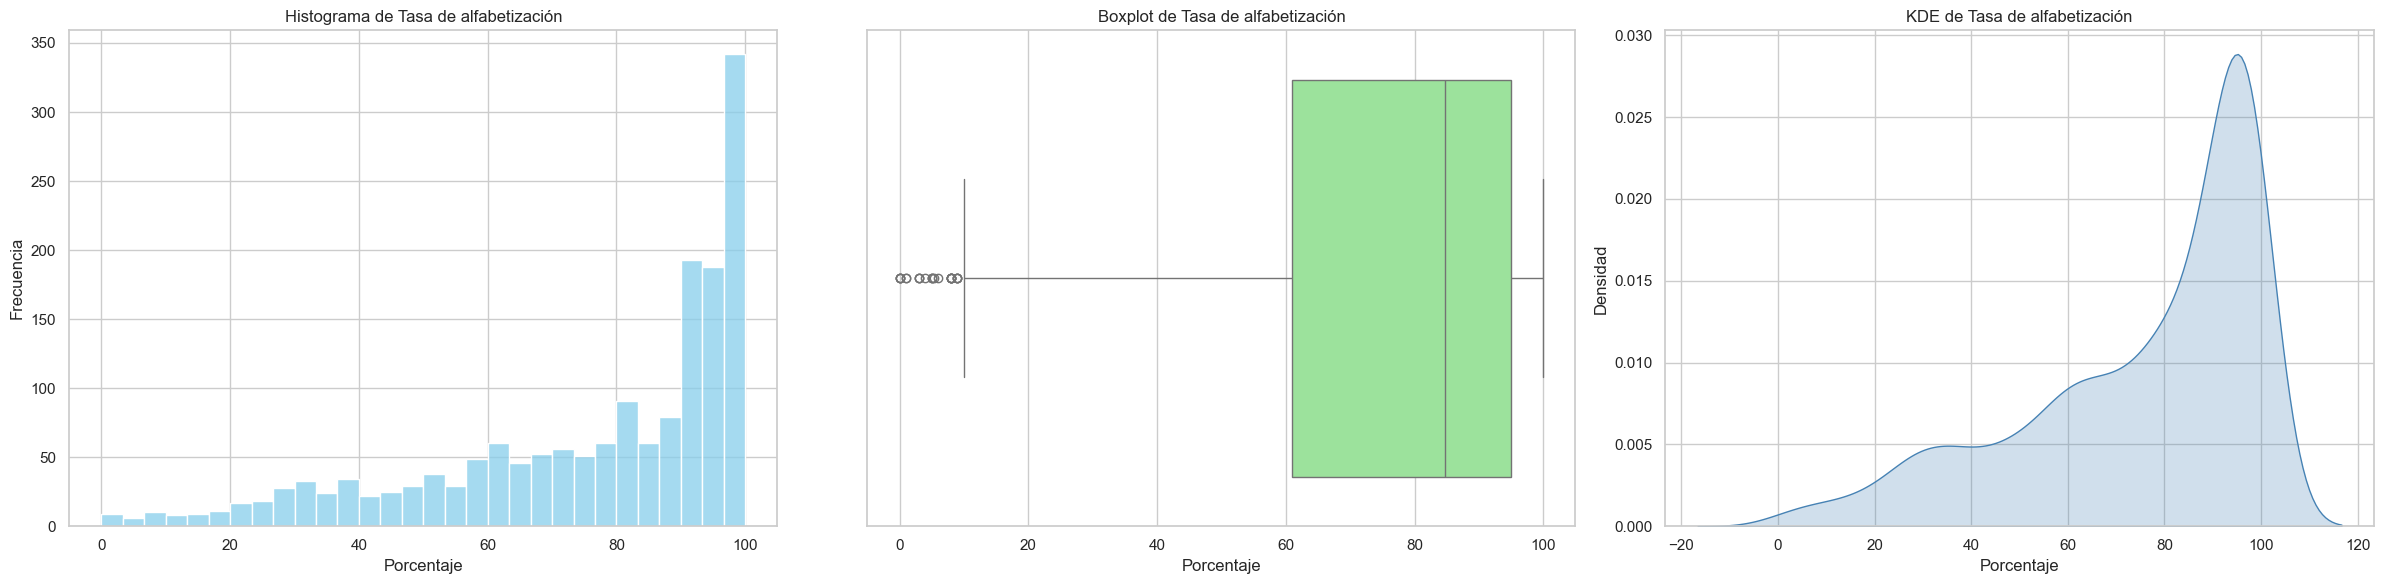

In [51]:
# GRAFICO HISTOGRAMA, BOXPLOT Y KDE 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

# HISTOGRAMA
plt.subplot(1, 3, 1)
sns.histplot(literacy['Tasa de alfabetización'], kde=False, color="skyblue", bins=30)
plt.title("Histograma de Tasa de alfabetización")
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')

# BOXPLOT
plt.subplot(1, 3, 2)
sns.boxplot(x=literacy['Tasa de alfabetización'], color="lightgreen")
plt.title("Boxplot de Tasa de alfabetización")
plt.xlabel('Porcentaje')

# KDE
plt.subplot(1, 3, 3)
sns.kdeplot(literacy['Tasa de alfabetización'], fill=True, color="steelblue")
plt.title("KDE de Tasa de alfabetización")
plt.xlabel("Porcentaje")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [39]:
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA 'TASA DE ALFABETIZACIÓN' EN 2019 A NIVEL GLOBAL
literacy_col = "Tasa de alfabetización"
global_literacy_2019 = literacy[literacy['Año'] == 2019]
values_literacy_2019 = global_literacy_2019[literacy_col]

print(f"Estadísticas descriptivas globales para '{literacy_col}' en 2019:")
print(f"Media: {values_literacy_2019.mean():.2f}")
print(f"Mediana: {values_literacy_2019.median():.2f}")
print(f"Moda: {values_literacy_2019.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {values_literacy_2019.std():.2f}")
print(f"Varianza: {values_literacy_2019.var():.2f}")
print(f"Mínimo: {values_literacy_2019.min():.2f}")
print(f"Máximo: {values_literacy_2019.max():.2f}")
print(f"Rango: {values_literacy_2019.max() - values_literacy_2019.min():.2f}")
print(f"Percentil 25: {values_literacy_2019.quantile(0.25):.2f}")
print(f"Percentil 50: {values_literacy_2019.quantile(0.50):.2f}")
print(f"Percentil 75: {values_literacy_2019.quantile(0.75):.2f}")

# ANÁLISIS ESTADÍSTICO PARA ESPAÑA A LO LARGO DEL TIEMPO
literacy_spain = literacy[literacy['País'] == 'España']
spain_literacy_values = literacy_spain[literacy_col]

print(f"\nEstadísticas descriptivas de '{literacy_col}' en España a lo largo de los años:")
print(f"Media: {spain_literacy_values.mean():.2f}")
print(f"Mediana: {spain_literacy_values.median():.2f}")
if not spain_literacy_values.mode().empty:
    print(f"Moda: {spain_literacy_values.mode().iloc[0]:.2f}")
else:
    print("Moda: No existe (todos los valores son únicos)")
print(f"Desviación estándar: {spain_literacy_values.std():.2f}")
print(f"Varianza: {spain_literacy_values.var():.2f}")
print(f"Mínimo: {spain_literacy_values.min():.2f}")
print(f"Máximo: {spain_literacy_values.max():.2f}")
print(f"Rango: {spain_literacy_values.max() - spain_literacy_values.min():.2f}")
print(f"Percentil 25: {spain_literacy_values.quantile(0.25):.2f}")
print(f"Percentil 50: {spain_literacy_values.quantile(0.50):.2f}")
print(f"Percentil 75: {spain_literacy_values.quantile(0.75):.2f}")

Estadísticas descriptivas globales para 'Tasa de alfabetización' en 2019:
Media: 84.28
Mediana: 93.23
Moda: 89.00
Desviación estándar: 20.53
Varianza: 421.61
Mínimo: 30.00
Máximo: 100.00
Rango: 70.00
Percentil 25: 81.00
Percentil 50: 93.23
Percentil 75: 97.65

Estadísticas descriptivas de 'Tasa de alfabetización' en España a lo largo de los años:
Media: 75.17
Mediana: 98.00
Moda: 98.00
Desviación estándar: 38.94
Varianza: 1516.60
Mínimo: 3.00
Máximo: 99.00
Rango: 96.00
Percentil 25: 61.50
Percentil 50: 98.00
Percentil 75: 98.00


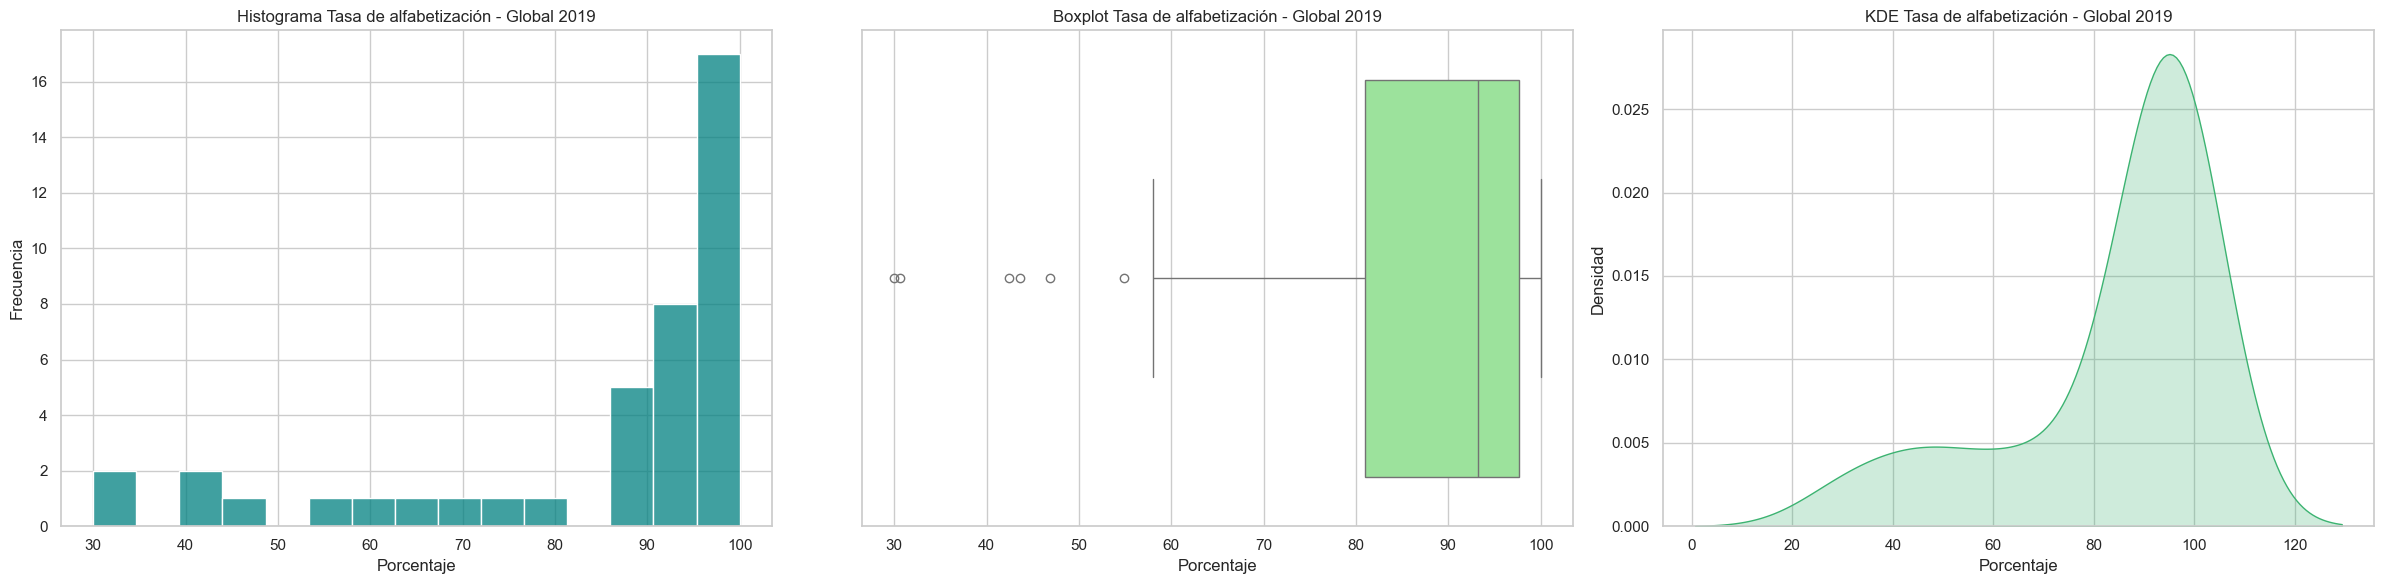

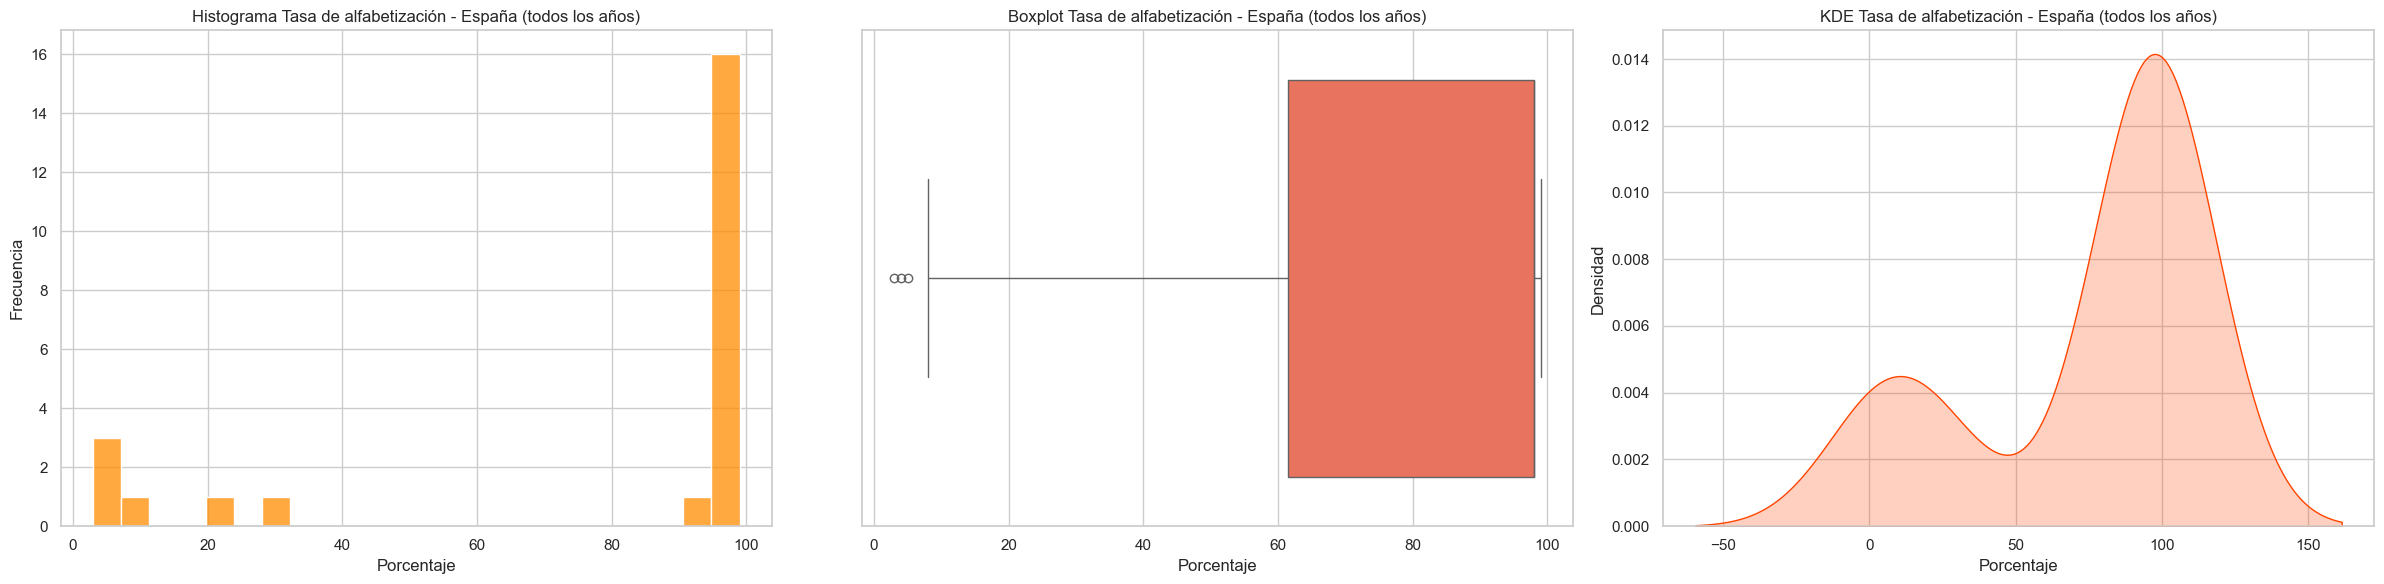

In [53]:
# GRAFICO HISTOGRAMA Y BOXPLOT DE TASA DE ALFABETIZACIÓN PARA EL AÑO 2019 A NIVEL GLOBAL Y PARA ESPAÑA A LO LARGO DEL TIEMPO
sns.set(style="whitegrid")

# GLOBAL 2019
plt.figure(figsize=(24, 6))

# HISTOGRAMA 2019
plt.subplot(1, 3, 1)
sns.histplot(values_literacy_2019, kde=False, color="teal", bins=15)
plt.title("Histograma Tasa de alfabetización - Global 2019")
plt.xlabel("Porcentaje")
plt.ylabel("Frecuencia")

# BOXPLOT 2019
plt.subplot(1, 3, 2)
sns.boxplot(x=values_literacy_2019, color="lightgreen")
plt.title("Boxplot Tasa de alfabetización - Global 2019")
plt.xlabel("Porcentaje")

# KDE 2019
plt.subplot(1, 3, 3)
sns.kdeplot(values_literacy_2019, fill=True, color="mediumseagreen")
plt.title("KDE Tasa de alfabetización - Global 2019")
plt.xlabel("Porcentaje")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

# ESPAÑA A LO LARGO DE LOS AÑOS
plt.figure(figsize=(24, 6))

# HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 1)
sns.histplot(spain_literacy_values, kde=False, color="darkorange", bins=len(spain_literacy_values))
plt.title("Histograma Tasa de alfabetización - España (todos los años)")
plt.xlabel("Porcentaje")
plt.ylabel("Frecuencia")

# BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 2)
sns.boxplot(x=spain_literacy_values, color="tomato")
plt.title("Boxplot Tasa de alfabetización - España (todos los años)")
plt.xlabel("Porcentaje")

# KDE ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 3)
sns.kdeplot(spain_literacy_values, fill=True, color="orangered")
plt.title("KDE Tasa de alfabetización - España (todos los años)")
plt.xlabel("Porcentaje")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

UNDER_FIVE_MORTALITY_RATE

In [ ]:
# EXPLORO EL DATAFRAME CHILD_MORTALITY 
print(child_mortality.head(10000)) 
print(child_mortality.info()) 
for column in child_mortality.columns: 
    print(f"Columna: {column}") 
    print(child_mortality[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
child_mortality.isna().sum() 

,Entity,Code,Year,Under-five mortality rate
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880
...,...,...,...,...
9995,Montenegro,MNE,2006,0.969325
9996,Montenegro,MNE,2007,0.885152
9997,Montenegro,MNE,2008,0.804069
9998,Montenegro,MNE,2009,0.728030


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     17052 non-null  object 
 1   Code                       15825 non-null  object 
 2   Year                       17052 non-null  int64  
 3   Under-five mortality rate  17052 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 533.0+ KB


None

Columna: Entity
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia'
 'Australia and New Zealand' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Central Asia (SDG)' 'Central Asia and Southern Asia (SDG)' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Eastern Asia (SDG)'
 'Eastern Asia and South-Eastern Asia (SDG)' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'Europe (SDG)' 'European Union (27)' 'F

Entity                          0
Code                         1227
Year                            0
Under-five mortality rate       0
dtype: int64

In [54]:
# ELIMINO LAS FILAS DE GEOGRAFÍAS REPETIDAS 
repeated_geographies = ['Africa', 'Australia and New Zealand', 'British Virgin Islands', 'Central Asia (SDG)', 'Central Asia and Southern Asia (SDG)', 'Eastern Asia (SDG)', 'Eastern Asia and South-Eastern Asia (SDG)', 'Europe', 'Europe (SDG)', 'European Union (27)', 'High-income countries', 'Landlocked developing countries (SDG)', 'Latin America and the Caribbean (SDG)', 'Least developed countries (SDG)', 'Low-income countries', 'Lower-middle-income countries', 'North America', 'Northern Africa (SDG)', 'Northern America (SDG)', 'Northern America and Europe (SDG)', 'Oceania', 'Oceania (SDG)', 'Oceania excluding Australia and New Zealand', 'Small island developing States (SDG)', 'South America', 'South-Eastern Asia (SDG)', 'Southern Asia (SDG)', 'Sub-Saharan Africa (SDG)', 'Upper-middle-income countries', 'Western Asia (SDG)', 'Western Asia and Northern Africa (SDG)', 'World']
child_mortality = child_mortality[~child_mortality['Entity'].isin(repeated_geographies)] 


# ELIMINO LA COLUMNA "CODE"
child_mortality.drop(columns=['Code'], inplace=True) 

# TRADUZCO Y REEMPLAZO LOS NOMBRES DE LOS PAÍSES Y DE LAS COLUMNAS AL ESPAÑOL 
country_translation_dict = {
    'Afghanistan': 'Afganistán', 'Albania': 'Albania', 'Algeria': 'Argelia', 'Andorra': 'Andorra', 'Angola': 'Angola',
    'Anguilla': 'Anguila', 'Antigua and Barbuda': 'Antigua y Barbuda', 'Argentina': 'Argentina', 'Armenia': 'Armenia',
    'Asia': 'Asia', 'Australia': 'Australia', 'Austria': 'Austria', 'Azerbaijan': 'Azerbaiyán', 'Bahamas': 'Bahamas',
    'Bahrain': 'Baréin', 'Bangladesh': 'Bangladesh', 'Barbados': 'Barbados', 'Belarus': 'Bielorrusia', 'Belgium': 'Bélgica',
    'Belize': 'Belice', 'Benin': 'Benín', 'Bhutan': 'Bután', 'Bolivia': 'Bolivia', 'Bosnia and Herzegovina': 'Bosnia y Herzegovina',
    'Botswana': 'Botsuana', 'Brazil': 'Brasil', 'Brunei': 'Brunéi', 'Bulgaria': 'Bulgaria', 'Burkina Faso': 'Burkina Faso',
    'Burundi': 'Burundi', 'Cambodia': 'Camboya', 'Cameroon': 'Camerún', 'Canada': 'Canadá', 'Cape Verde': 'Cabo Verde',
    'Central African Republic': 'República Centroafricana', 'Chad': 'Chad', 'Chile': 'Chile', 'China': 'China', 'Colombia': 'Colombia',
    'Comoros': 'Comoras', 'Congo': 'Congo', 'Cook Islands': 'Islas Cook', 'Costa Rica': 'Costa Rica', "Cote d'Ivoire": 'Costa de Marfil',
    'Croatia': 'Croacia', 'Cuba': 'Cuba', 'Cyprus': 'Chipre', 'Czechia': 'República Checa', 'Democratic Republic of Congo': 'República Democrática del Congo',
    'Denmark': 'Dinamarca', 'Djibouti': 'Yibuti', 'Dominica': 'Dominica', 'Dominican Republic': 'República Dominicana', 'East Timor': 'Timor Oriental',
    'Ecuador': 'Ecuador', 'Egypt': 'Egipto', 'El Salvador': 'El Salvador', 'Equatorial Guinea': 'Guinea Ecuatorial', 'Eritrea': 'Eritrea',
    'Estonia': 'Estonia', 'Eswatini': 'Eswatini', 'Ethiopia': 'Etiopía', 'Fiji': 'Fiyi', 'Finland': 'Finlandia', 'France': 'Francia',
    'Gabon': 'Gabón', 'Gambia': 'Gambia', 'Georgia': 'Georgia', 'Germany': 'Alemania', 'Ghana': 'Ghana', 'Greece': 'Grecia',
    'Grenada': 'Granada', 'Guatemala': 'Guatemala', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bisáu', 'Guyana': 'Guyana', 'Haiti': 'Haití',
    'Honduras': 'Honduras', 'Hungary': 'Hungría', 'Iceland': 'Islandia', 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Irán',
    'Iraq': 'Irak', 'Ireland': 'Irlanda', 'Israel': 'Israel', 'Italy': 'Italia', 'Jamaica': 'Jamaica', 'Japan': 'Japón', 'Jordan': 'Jordania',
    'Kazakhstan': 'Kazajistán', 'Kenya': 'Kenia', 'Kiribati': 'Kiribati', 'Kosovo': 'Kosovo', 'Kuwait': 'Kuwait', 'Kyrgyzstan': 'Kirguistán',
    'Laos': 'Laos', 'Latvia': 'Letonia', 'Lebanon': 'Líbano', 'Lesotho': 'Lesoto', 'Liberia': 'Liberia', 'Libya': 'Libia', 'Lithuania': 'Lituania',
    'Luxembourg': 'Luxemburgo', 'Madagascar': 'Madagascar', 'Malawi': 'Malaui', 'Malaysia': 'Malasia', 'Maldives': 'Maldivas', 'Mali': 'Malí',
    'Malta': 'Malta', 'Marshall Islands': 'Islas Marshall', 'Mauritania': 'Mauritania', 'Mauritius': 'Mauricio', 'Mexico': 'México',
    'Micronesia (country)': 'Micronesia', 'Moldova': 'Moldavia', 'Monaco': 'Mónaco', 'Mongolia': 'Mongolia', 'Montenegro': 'Montenegro',
    'Montserrat': 'Montserrat', 'Morocco': 'Marruecos', 'Mozambique': 'Mozambique', 'Myanmar': 'Birmania', 'Namibia': 'Namibia', 'Nauru': 'Naurú',
    'Nepal': 'Nepal', 'Netherlands': 'Países Bajos', 'New Zealand': 'Nueva Zelanda', 'Nicaragua': 'Nicaragua', 'Niger': 'Níger', 'Nigeria': 'Nigeria',
    'Niue': 'Niue', 'North Korea': 'Corea del Norte', 'North Macedonia': 'Macedonia del Norte', 'Norway': 'Noruega', 'Oman': 'Omán', 'Pakistan': 'Pakistán',
    'Palau': 'Palau', 'Palestine': 'Palestina', 'Panama': 'Panamá', 'Papua New Guinea': 'Papúa Nueva Guinea', 'Paraguay': 'Paraguay', 'Peru': 'Perú',
    'Philippines': 'Filipinas', 'Poland': 'Polonia', 'Portugal': 'Portugal', 'Qatar': 'Catar', 'Romania': 'Rumanía', 'Russia': 'Rusia', 'Rwanda': 'Ruanda',
    'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 'Saint Lucia': 'Santa Lucía', 'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas',
    'Samoa': 'Samoa', 'San Marino': 'San Marino', 'Sao Tome and Principe': 'Santo Tomé y Príncipe', 'Saudi Arabia': 'Arabia Saudita', 'Senegal': 'Senegal',
    'Serbia': 'Serbia', 'Seychelles': 'Seychelles', 'Sierra Leone': 'Sierra Leona', 'Singapore': 'Singapur', 'Slovakia': 'Eslovaquia', 'Slovenia': 'Eslovenia',
    'Solomon Islands': 'Islas Salomón', 'Somalia': 'Somalia', 'South Africa': 'Sudáfrica', 'South Korea': 'Corea del Sur', 'South Sudan': 'Sudán del Sur',
    'Spain': 'España', 'Sri Lanka': 'Sri Lanka', 'Sudan': 'Sudán', 'Suriname': 'Surinam', 'Sweden': 'Suecia', 'Switzerland': 'Suiza', 'Syria': 'Siria',
    'Taiwan': 'Taiwán', 'Tajikistan': 'Tayikistán', 'Tanzania': 'Tanzania', 'Thailand': 'Tailandia', 'Togo': 'Togo', 'Tonga': 'Tonga',
    'Trinidad and Tobago': 'Trinidad y Tobago', 'Tunisia': 'Túnez', 'Turkey': 'Turquía', 'Turkmenistan': 'Turkmenistán', 'Turks and Caicos Islands': 'Islas Turcas y Caicos',
    'Tuvalu': 'Tuvalu', 'Uganda': 'Uganda', 'Ukraine': 'Ucrania', 'United Arab Emirates': 'Emiratos Árabes Unidos', 'United Kingdom': 'Reino Unido',
    'United States': 'Estados Unidos', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistán', 'Vanuatu': 'Vanuatu', 'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam',
    'Yemen': 'Yemen', 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabue'
}
child_mortality['Entity'] = child_mortality['Entity'].replace(country_translation_dict) 

child_mortality.columns= ['País', 'Año', 'Mortalidad infantil']

In [ ]:
# EXPLORO NUEVAMENTE EL DATAFRAME CHILD_MORTALITY 
print(child_mortality.head(10000)) 
print(child_mortality.info()) 
for column in child_mortality.columns: 
    print(f"Columna: {column}") 
    print(child_mortality[column].unique()) 
    print("-" * 40) # Separa entre columna y columna. 
child_mortality.isna().sum() 

,País,Año,Mortalidad infantil
0,Afganistán,1957,37.245758
1,Afganistán,1958,36.626625
2,Afganistán,1959,36.043480
3,Afganistán,1960,35.459850
4,Afganistán,1961,34.894880
...,...,...,...
10626,Nueva Zelanda,1874,16.595000
10627,Nueva Zelanda,1875,19.785000
10628,Nueva Zelanda,1876,15.480000
10629,Nueva Zelanda,1877,13.297999


<class 'pandas.core.frame.DataFrame'>
Index: 15778 entries, 0 to 17051
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   País                 15778 non-null  object 
 1   Año                  15778 non-null  int64  
 2   Mortalidad infantil  15778 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 493.1+ KB


None

Columna: País
['Afganistán' 'Albania' 'Argelia' 'Andorra' 'Angola' 'Anguila'
 'Antigua y Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaiyán' 'Bahamas' 'Baréin' 'Bangladesh' 'Barbados' 'Bielorrusia'
 'Bélgica' 'Belice' 'Benín' 'Bután' 'Bolivia' 'Bosnia y Herzegovina'
 'Botsuana' 'Brasil' 'Brunéi' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Camboya' 'Camerún' 'Canadá' 'Cabo Verde' 'República Centroafricana'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoras' 'Congo' 'Islas Cook'
 'Costa Rica' 'Costa de Marfil' 'Croacia' 'Cuba' 'Chipre'
 'República Checa' 'República Democrática del Congo' 'Dinamarca' 'Yibuti'
 'Dominica' 'República Dominicana' 'Timor Oriental' 'Ecuador' 'Egipto'
 'El Salvador' 'Guinea Ecuatorial' 'Eritrea' 'Estonia' 'Eswatini'
 'Etiopía' 'Fiyi' 'Finlandia' 'Francia' 'Gabón' 'Gambia' 'Georgia'
 'Alemania' 'Ghana' 'Grecia' 'Granada' 'Guatemala' 'Guinea' 'Guinea-Bisáu'
 'Guyana' 'Haití' 'Honduras' 'Hungría' 'Islandia' 'India' 'Indonesia'
 'Irán' 'Irak' 'Irlanda' 'Is

País                   0
Año                    0
Mortalidad infantil    0
dtype: int64

In [57]:
# HAGO ANÁLISIS ESTADÍSTICO DESCRIPTIVO 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

child_mortality_mean = child_mortality['Mortalidad infantil'].mean() 
child_mortality_median = child_mortality['Mortalidad infantil'].median() 
child_mortality_mode = child_mortality['Mortalidad infantil'].mode().iloc[0] 
child_mortality_std = child_mortality['Mortalidad infantil'].std() 
child_mortality_var = child_mortality['Mortalidad infantil'].var() 
child_mortality_percentile_25 = child_mortality['Mortalidad infantil'].quantile(0.25) 
child_mortality_percentile_50 = child_mortality['Mortalidad infantil'].quantile(0.50) 
child_mortality_percentile_75 = child_mortality['Mortalidad infantil'].quantile(0.75) 
child_mortality_min = child_mortality['Mortalidad infantil'].min() 
child_mortality_max = child_mortality['Mortalidad infantil'].max()
child_mortality_range = child_mortality_max - child_mortality_min

print(f"La media por año y país es:\n{child_mortality_mean}\n") 
print(f"La mediana por año y país es:\n{child_mortality_median}\n") 
print(f"La moda por año y país es:\n{child_mortality_mode}\n") 
print(f"La desviación estándar por año y país es:\n{child_mortality_std}\n") 
print(f"La varianza por año y país es:\n{child_mortality_var}\n")
print(f"El percentil 25 por año y país es:\n{child_mortality_percentile_25}\n") 
print(f"El percentil 50 por año y país es:\n{child_mortality_percentile_50}\n") 
print(f"El percentil 75 por año y país es:\n{child_mortality_percentile_75}\n") 
print(f"El valor mínimo por año y país es:\n{child_mortality_min}\n") 
print(f"El valor máximo por año y país es:\n{child_mortality_max}\n") 
print(f"El rango por año y país es:\n{child_mortality_range}\n")

La media por año y país es:
10.741431151987577

La mediana por año y país es:
6.84166095

La moda por año y país es:
28.437

La desviación estándar por año y país es:
10.561830337507002

La varianza por año y país es:
111.55226007828327

El percentil 25 por año y país es:
2.224907775

El percentil 50 por año y país es:
6.84166095

El percentil 75 por año y país es:
16.897527500000002

El valor mínimo por año y país es:
0.14605829

El valor máximo por año y país es:
68.208

El rango por año y país es:
68.06194171



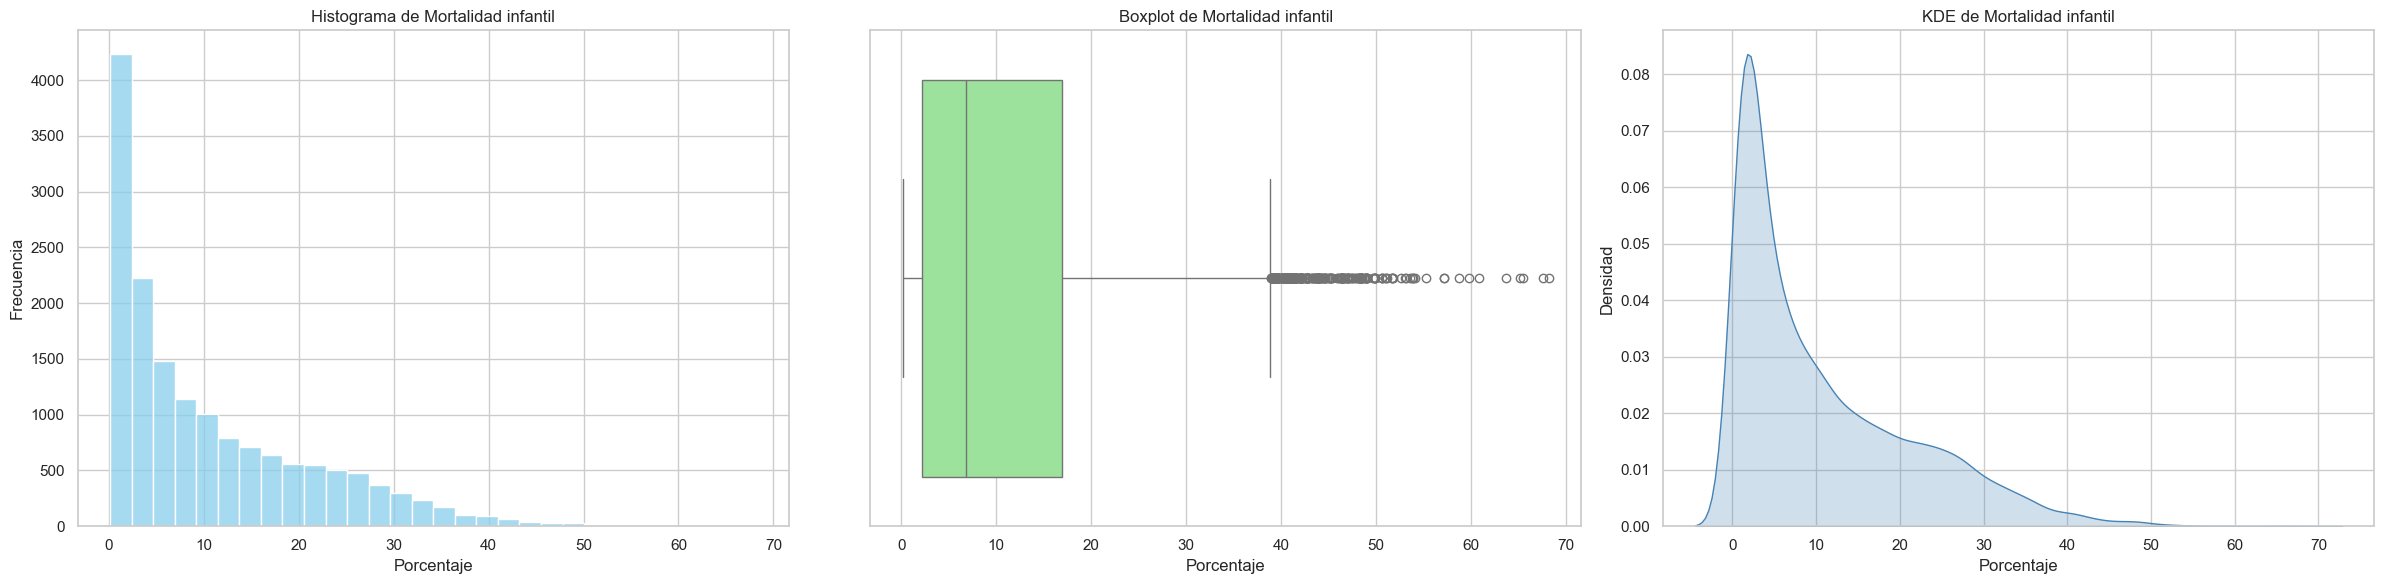

In [60]:
# GRAFICO HISTOGRAMA Y BOXPLOT 
''' 
NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
DEL ANÁLISIS SIN AGRUPAR.
'''

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

# HISTOGRAMA
plt.subplot(1, 3, 1)
sns.histplot(child_mortality['Mortalidad infantil'], kde=False, color="skyblue", bins=30)
plt.title("Histograma de Mortalidad infantil")
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')

# BOXPLOT
plt.subplot(1, 3, 2)
sns.boxplot(x=child_mortality['Mortalidad infantil'], color="lightgreen")
plt.title("Boxplot de Mortalidad infantil")
plt.xlabel('Porcentaje')

# KDE
plt.subplot(1, 3, 3)
sns.kdeplot(child_mortality['Mortalidad infantil'], fill=True, color="steelblue")
plt.title("KDE de Mortalidad infantil")
plt.xlabel("Porcentaje")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [58]:
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA MORTALIDAD INFANTIL EN 2019 A NIVEL GLOBAL
mortality_col = "Mortalidad infantil"
global_mortality_2019 = child_mortality[child_mortality['Año'] == 2019]
values_mortality_2019 = global_mortality_2019[mortality_col]

print(f"Estadísticas descriptivas globales para '{mortality_col}' en 2019:")
print(f"Media: {values_mortality_2019.mean():.2f}")
print(f"Mediana: {values_mortality_2019.median():.2f}")
print(f"Moda: {values_mortality_2019.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {values_mortality_2019.std():.2f}")
print(f"Varianza: {values_mortality_2019.var():.2f}")
print(f"Mínimo: {values_mortality_2019.min():.2f}")
print(f"Máximo: {values_mortality_2019.max():.2f}")
print(f"Rango: {values_mortality_2019.max() - values_mortality_2019.min():.2f}")
print(f"Percentil 25: {values_mortality_2019.quantile(0.25):.2f}")
print(f"Percentil 50: {values_mortality_2019.quantile(0.50):.2f}")
print(f"Percentil 75: {values_mortality_2019.quantile(0.75):.2f}")

# ANÁLISIS ESTADÍSTICO PARA MORTALIDAD INFANTIL EN ESPAÑA A LO LARGO DEL TIEMPO
mortality_spain = child_mortality[child_mortality['País'] == 'España']
spain_mortality_values = mortality_spain[mortality_col]

print(f"\nEstadísticas descriptivas de '{mortality_col}' en España a lo largo de los años:")
print(f"Media: {spain_mortality_values.mean():.2f}")
print(f"Mediana: {spain_mortality_values.median():.2f}")
print(f"Moda: {spain_mortality_values.mode().iloc[0]:.2f}")
print(f"Desviación estándar: {spain_mortality_values.std():.2f}")
print(f"Varianza: {spain_mortality_values.var():.2f}")
print(f"Mínimo: {spain_mortality_values.min():.2f}")
print(f"Máximo: {spain_mortality_values.max():.2f}")
print(f"Rango: {spain_mortality_values.max() - spain_mortality_values.min():.2f}")
print(f"Percentil 25: {spain_mortality_values.quantile(0.25):.2f}")
print(f"Percentil 50: {spain_mortality_values.quantile(0.50):.2f}")
print(f"Percentil 75: {spain_mortality_values.quantile(0.75):.2f}")

Estadísticas descriptivas globales para 'Mortalidad infantil' en 2019:
Media: 2.73
Mediana: 1.59
Moda: 0.16
Desviación estándar: 2.81
Varianza: 7.89
Mínimo: 0.16
Máximo: 12.22
Rango: 12.06
Percentil 25: 0.68
Percentil 50: 1.59
Percentil 75: 4.22

Estadísticas descriptivas de 'Mortalidad infantil' en España a lo largo de los años:
Media: 13.96
Mediana: 10.35
Moda: 28.44
Desviación estándar: 12.59
Varianza: 158.51
Mínimo: 0.30
Máximo: 34.50
Rango: 34.20
Percentil 25: 1.09
Percentil 50: 10.35
Percentil 75: 27.24


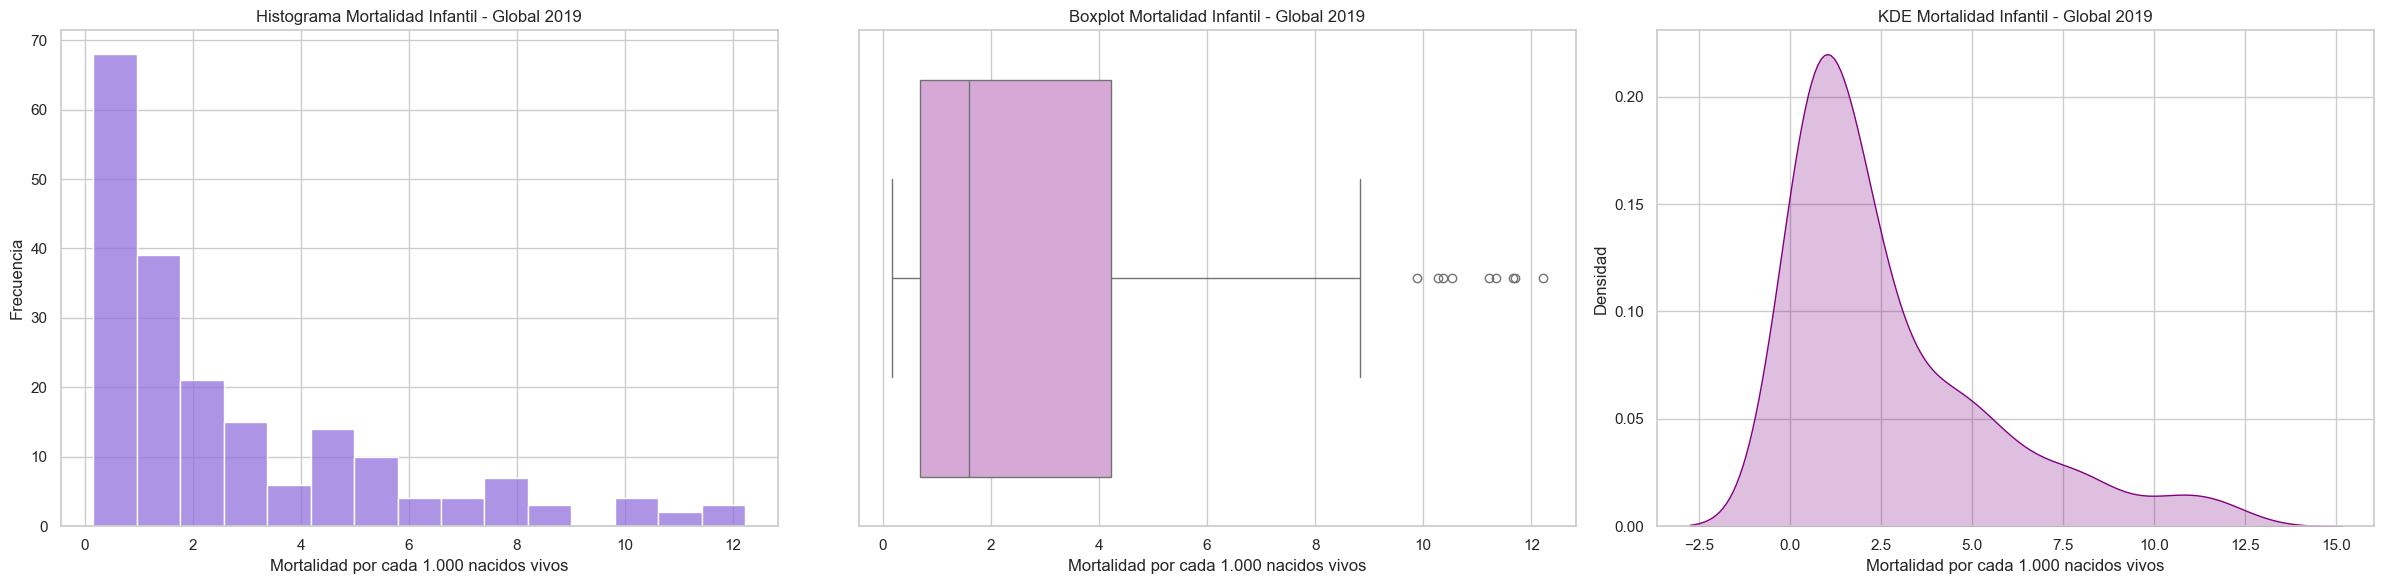

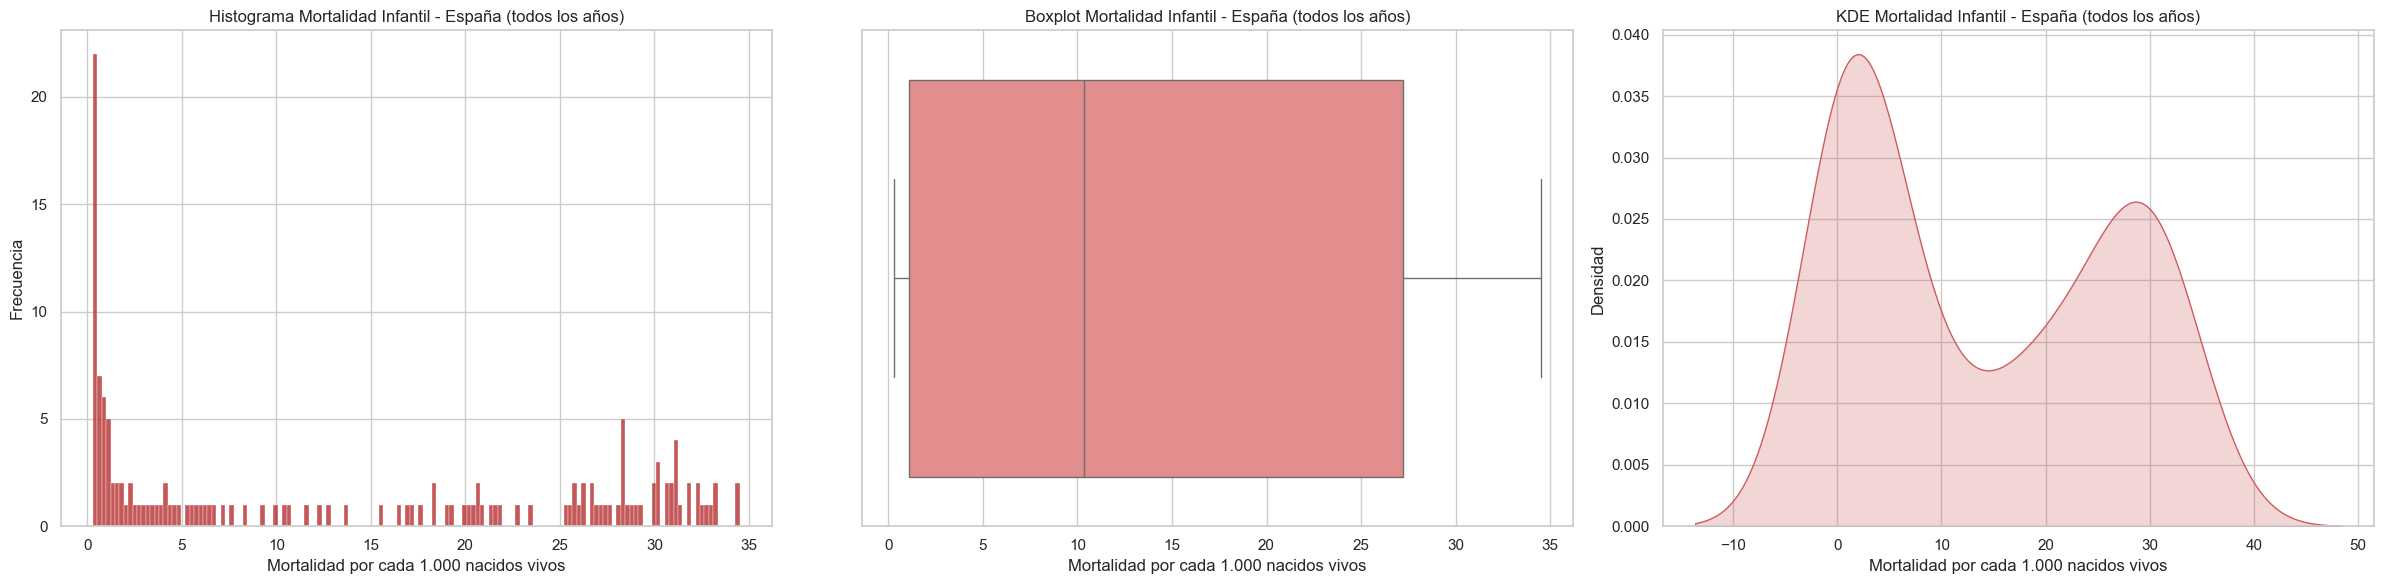

In [63]:
# GRAFICO HISTOGRAMA Y BOXPLOT PARA MORTALIDAD INFANTIL A NIVEL GLOBAL EN 2019 Y PARA ESPAÑA A LO LARGO DEL TIEMPO
sns.set(style="whitegrid")

# GLOBAL 2019
plt.figure(figsize=(24, 6))

# HISTOGRAMA 2019
plt.subplot(1, 3, 1)
sns.histplot(values_mortality_2019, kde=False, color="mediumpurple", bins=15)
plt.title("Histograma Mortalidad Infantil - Global 2019")
plt.xlabel("Mortalidad por cada 1.000 nacidos vivos")
plt.ylabel("Frecuencia")

# BOXPLOT 2019
plt.subplot(1, 3, 2)
sns.boxplot(x=values_mortality_2019, color="plum")
plt.title("Boxplot Mortalidad Infantil - Global 2019")
plt.xlabel("Mortalidad por cada 1.000 nacidos vivos")

# KDE 2019
plt.subplot(1, 3, 3)
sns.kdeplot(values_mortality_2019, fill=True, color="purple")
plt.title("KDE Mortalidad Infantil - Global 2019")
plt.xlabel("Mortalidad por cada 1.000 nacidos vivos")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

# ESPAÑA A LO LARGO DE LOS AÑOS
plt.figure(figsize=(24, 6))

# HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 1)
sns.histplot(spain_mortality_values, kde=False, color="firebrick", bins=len(spain_mortality_values))
plt.title("Histograma Mortalidad Infantil - España (todos los años)")
plt.xlabel("Mortalidad por cada 1.000 nacidos vivos")
plt.ylabel("Frecuencia")

# BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 2)
sns.boxplot(x=spain_mortality_values, color="lightcoral")
plt.title("Boxplot Mortalidad Infantil - España (todos los años)")
plt.xlabel("Mortalidad por cada 1.000 nacidos vivos")

# KDE ESPAÑA A LO LARGO DE LOS AÑOS
plt.subplot(1, 3, 3)
sns.kdeplot(spain_mortality_values, fill=True, color="indianred")
plt.title("KDE Mortalidad Infantil - España (todos los años)")
plt.xlabel("Mortalidad por cada 1.000 nacidos vivos")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [267]:
# Filter data for the years 1990 to 2019
years_range = range(1990, 2020)

# Calculate the average global vaccination rate per year
vaccination_coverage['Average Vaccination Rate'] = vaccination_coverage[vaccines_columns].mean(axis=1)
avg_vaccination_rate = vaccination_coverage[vaccination_coverage['Año'].isin(years_range)].groupby('Año')['Average Vaccination Rate'].mean()

# Calculate the global life expectancy per year
avg_life_expectancy = life_expectancy[life_expectancy['Año'].isin(years_range)].groupby('Año')['Esperanza de vida al nacer'].mean()

# Calculate the global child mortality rate per year
avg_child_mortality = child_mortality[child_mortality['Año'].isin(years_range)].groupby('Año')['Mortalidad infantil'].mean()

# Calculate the global number of deaths preventable by vaccines per year
avg_preventable_deaths = preventable_deaths[preventable_deaths['Año'].isin(years_range)].groupby('Año')['Muertes'].mean()

# Calculate the global literacy rate per year
avg_literacy_rate = literacy[literacy['Año'].isin(years_range)].groupby('Año')['Tasa de alfabetización'].mean()

# Combine all the data into a single DataFrame
global_indicators = pd.DataFrame({
    'Average Vaccination Rate': avg_vaccination_rate,
    'Global Life Expectancy': avg_life_expectancy,
    'Global Child Mortality Rate': avg_child_mortality,
    'Global Preventable Deaths': avg_preventable_deaths,
    'Global Literacy Rate': avg_literacy_rate
})

# Compute the correlation matrix
correlation_matrix = global_indicators.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Global Indicators (1990-2019)')
plt.show()

KeyError: "None of [Index(['Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3)',\n       'Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC)',\n       'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1)',\n       'Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)',\n       'Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3)',\n       'Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)',\n       'Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3)',\n       'Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)',\n       'Porcentaje de niños de un año que han recibido una dosis de vacuna contra la fiebre amarilla (YFV)',\n       'Porcentaje de niños de un año que han recibido una dosis de vacuna contra la rubéola (RCV1)'],\n      dtype='object')] are in the [columns]"

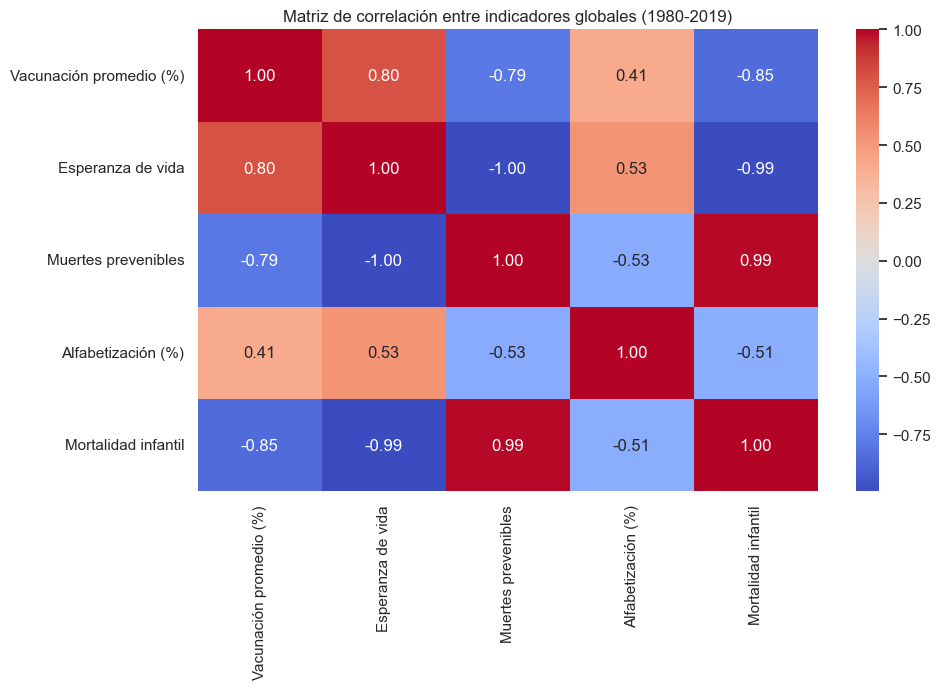

In [ ]:
# ANÁLISIS DE CORRELACIÓN ENTRE INDICADORES GLOBALES (1980-2019)
years = list(range(1980, 2020))

# VACUNAS A PROMEDIAR
vacunas_cols = [
    "Porcentaje de niños de un año que han recibido tres dosis de vacuna contra la Hepatitis B (HEPB3)",
    "Porcentaje de niños de un año que han recibido tres dosis de vacuna contra Haemophilus influenzae tipo b (HIB3)",
    "Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra la poliomielitis inactivada (IPV1)",
    "Porcentaje de niños de un año que han recibido su primera dosis de vacuna contra el sarampión (MCV1)",
    "Porcentaje de niños de un año que han recibido la tercera dosis de vacuna conjugada contra el neumococo (PCV3)",
    "Porcentaje de niños de un año que han recibido su tercera dosis de vacuna oral o inactivada contra la poliomielitis (POL3)",
    "Porcentaje de niños de un año que han recibido una dosis de vacuna contra la rubéola (RCV1)",
    "Porcentaje de niños de un año que han recibido su dosis final recomendada (2ª o 3ª) de vacuna contra el rotavirus (ROTAC)",
    "Porcentaje de niños de un año que han recibido una dosis de vacuna contra la fiebre amarilla (YFV)",
    "Porcentaje de niños de un año que han recibido tres dosis de vacuna combinada contra la difteria, el tétanos y la tosferina (DTP3)"
]

# CALCULO PROMEDIOS POR AÑO
vacunas_avg = vaccination_coverage[vaccination_coverage['Año'].isin(years)].groupby("Año")[vacunas_cols].mean().mean(axis=1)
vida_avg = life_expectancy[life_expectancy["Año"].isin(years)].groupby("Año")["Esperanza de vida al nacer"].mean()
muertes_avg = preventable_deaths[preventable_deaths["Año"].isin(years)].groupby("Año")["Muertes"].mean()
alfabet_avg = literacy[literacy["Año"].isin(years)].groupby("Año")["Tasa de alfabetización"].mean()
mortalidad_avg = child_mortality[child_mortality["Año"].isin(years)].groupby("Año")["Mortalidad infantil"].mean()

#UNO TODO EN UN DATAFRAME
df_corr = pd.DataFrame({
    "Vacunación promedio (%)": vacunas_avg,
    "Esperanza de vida": vida_avg,
    "Muertes prevenibles": muertes_avg,
    "Alfabetización (%)": alfabet_avg,
    "Mortalidad infantil": mortalidad_avg
}).dropna()

# MATRIZ DE CORRELACIÓN + HEATMAP
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre indicadores globales (1980-2019)")
plt.show()

In [295]:
# REGRESIÓN LINEAL

print(df_corr.columns)


from sklearn.linear_model import LinearRegression

# Variables predictoras y variable objetivo
X = df_corr[['Vacunación promedio (%)', 'Muertes prevenibles', 'Esperanza de vida']]
y = df_corr['Mortalidad infantil']

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes e intercepto
print("Intercepto:", model.intercept_)
print("Coeficientes:", dict(zip(X.columns, model.coef_)))

# R² del modelo (qué tan bien explica la variación)
print("R² Score:", model.score(X, y))

Index(['Vacunación promedio (%)', 'Esperanza de vida', 'Muertes prevenibles',
       'Alfabetización (%)', 'Mortalidad infantil'],
      dtype='object')
Intercepto: 69.66905355414809
Coeficientes: {'Vacunación promedio (%)': np.float64(-0.09894979564651689), 'Muertes prevenibles': np.float64(-0.001652450134191531), 'Esperanza de vida': np.float64(-0.7752924994645229)}
R² Score: 0.998075075790206


In [296]:
X_simple = df_corr[['Vacunación promedio (%)']]
y = df_corr['Mortalidad infantil']

modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y)

print(f"Coeficiente: {modelo_simple.coef_[0]}")
print(f"R² Score: {modelo_simple.score(X_simple, y)}")

Coeficiente: -0.5478240334579749
R² Score: 0.7295539860754923


In [298]:
y_pred = modelo_simple.predict(X)  # o X_simple si es el modelo simple
residuos = y - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos, color="darkorange")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Esperanza de vida
- Muertes prevenibles


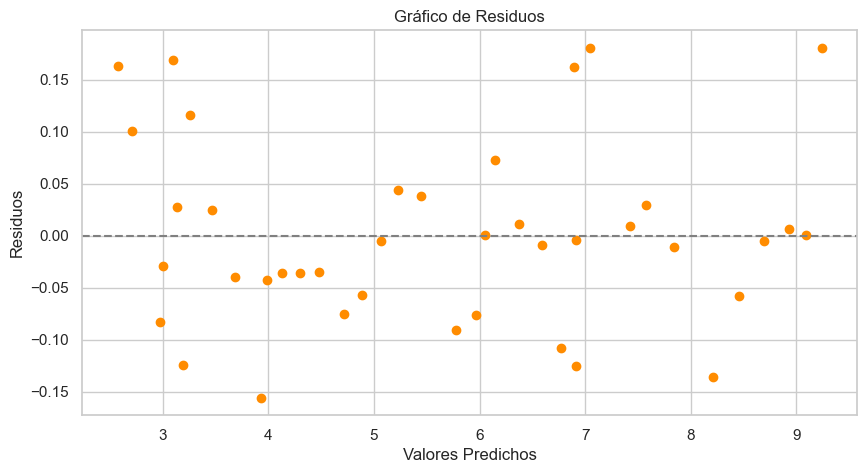

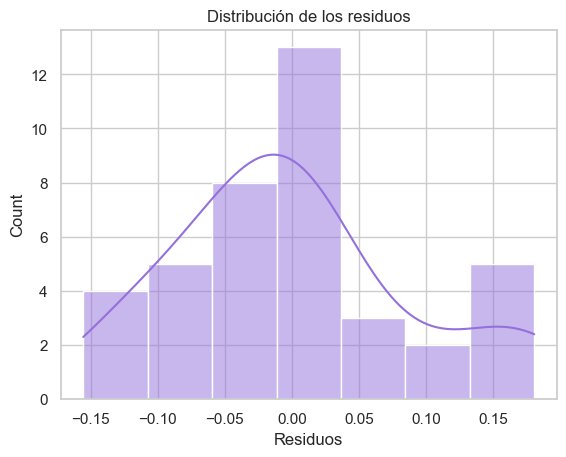

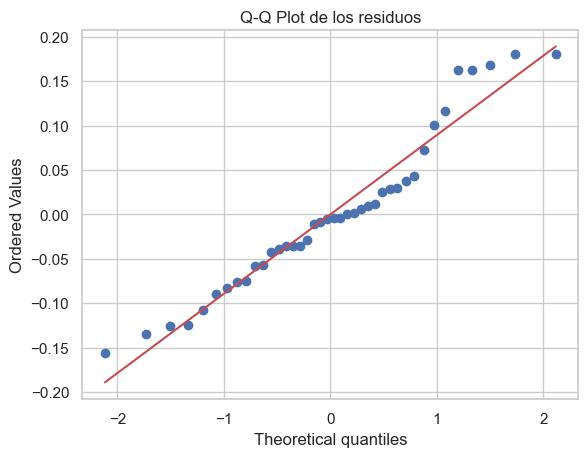

In [301]:
# Entreno el modelo y lo llamo 'modelo'
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones y residuos
y_pred = modelo.predict(X)
residuos = y - y_pred

# Gráfico de dispersión de residuos
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos, color="darkorange")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# Histograma de residuos
sns.histplot(residuos, kde=True, color="mediumpurple")
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.show()

# Q-Q Plot
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.show()

In [300]:
import scipy.stats as stats

In [303]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)  # añade intercepto
modelo_sm = sm.OLS(y, X_sm).fit()

print(modelo_sm.summary())

                             OLS Regression Results                            
Dep. Variable:     Mortalidad infantil   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                     6222.
Date:                 Thu, 10 Apr 2025   Prob (F-statistic):           6.43e-49
Time:                         03:15:25   Log-Likelihood:                 40.591
No. Observations:                   40   AIC:                            -73.18
Df Residuals:                       36   BIC:                            -66.43
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [ ]:
Mira, te paso cómo me han quedado los tres archivos:

- etl.py:
def load_data():
    """
    Carga los siete datasets, unifica los dos dataset de "Deaths vaccines could have
    prevented" y devuelve todos los datasets dentro de un diccionario de DataFrames
    """

    import pandas as pd
    import os

    # RUTA BASE RELATIVA DESDE EL ARCHIVO ACTUAL (SRC/ETL.PY) HACIA DATA/RAW
    BASE_DIR = os.path.dirname(os.path.dirname(__file__))
    DATA_PATH = os.path.join(BASE_DIR, "data", "raw")

    # CARGA DE DATASETS
    vaccination_coverage = pd.read_csv(os.path.join(DATA_PATH, "Global vaccination coverage.csv"))
    life_expectancy = pd.read_csv(os.path.join(DATA_PATH, "Life expectancy.csv"))
    child_mortality = pd.read_csv(os.path.join(DATA_PATH, "Under five mortality rate.csv"))
    preventable_deaths_1 = pd.read_csv(os.path.join(DATA_PATH, "Deaths vaccines could have prevented 1.csv"))
    preventable_deaths_2 = pd.read_csv(os.path.join(DATA_PATH, "Deaths vaccines could have prevented 2.csv"))
    literacy = pd.read_csv(os.path.join(DATA_PATH, "Literacy.csv"))
    gdp = pd.read_csv(os.path.join(DATA_PATH, "Gross Domestic Product.csv"))

    # UNIFICACIÓN VERTICAL DE LOS DATASETS DE "DEATHS VACCINES COULD HAVE PREVENTED"
    preventable_deaths = pd.concat([preventable_deaths_1, preventable_deaths_2], ignore_index=True)

    return {
        "vaccination_coverage": vaccination_coverage,
        "life_expectancy": life_expectancy,
        "child_mortality": child_mortality,
        "preventable_deaths": preventable_deaths,
        "literacy": literacy,
        "gdp": gdp
    }


- eda.py:

def order_and_clean_data() :
    """
    Limpia y transforma los datasets. Se eliminan filas y columnas innecesarias, se 
    traducen los nombres de los países al español y se exportan los datasets procesados como CSV
    a data/processed.
    """

    import pandas as pd
    import os
    from src.etl import load_data

    # CARGA DE DATOS
    datasets = load_data()

    # ASIGNACIÓN DE LOS DATASETS A VARIABLES INDIVIDUALES
    vaccination_coverage = datasets["vaccination_coverage"]
    life_expectancy = datasets["life_expectancy"]
    child_mortality = datasets["child_mortality"]
    preventable_deaths = datasets["preventable_deaths"]
    literacy = datasets["literacy"]
    gdp = datasets["gdp"]

    # DEFINICIÓN DE DIRECTORIOS PARA POSTERIOR EXPORTACIÓN DE ARCHIVOS
    BASE_DIR = os.path.dirname(os.path.dirname(__file__))
    PROCESSED_PATH = os.path.join(BASE_DIR, "data", "processed")


    # ---------------------- EXPLORACIÓN DE VACCINES_COVERAGE ----------------------

    print(vaccination_coverage.head(10000))
    print(vaccination_coverage.info())

    for column in vaccination_coverage.columns:
        print(f"Columna: {column}")
        print(vaccination_coverage[column].unique())
        print("-" * 40) # Separa entre columna y columna.

    vaccination_coverage.isna().sum()

    
(...)
(...)
(...) 

 

    # NUEVA EXPLORACIÓN DEL DATAFRAME VACCINATION_COVERAGE PARA CHEQUEAR QUE ESTÉ LIMPIO
    print(vaccination_coverage.head(10000))
    print(vaccination_coverage.info())

    for column in vaccination_coverage.columns:
        print(f"Columna: {column}")
        print(vaccination_coverage[column].unique())
        print("-" * 40) # Separa entre columna y columna.

    # EXPORTACIÓN DE VACCINATION_COVERAGE COMO CSV A DATA/PROCESSED, PUES ASÍ COMO ESTÁ YA SIRVE PARA VISUALIZAR EN POWER BI
    vaccination_coverage.to_csv(os.path.join(PROCESSED_PATH, 'vaccination_coverage_processed.csv'), index=False)


    # ---------------------- EXPLORACIÓN DE LIFE_EXPECTANCY ----------------------

    print(life_expectancy.head(10000)) 
    print(life_expectancy.info()) 

    for column in life_expectancy.columns: 
        print(f"Columna: {column}") 
        print(life_expectancy[column].unique()) 
        print("-" * 40) # Separa entre columna y columna. 

    life_expectancy.isna().sum() 

    # ELIMINACIÓN DE LAS FILAS DE GEOGRAFÍAS REPETIDAS 
    repeated_geographies = ['Africa', 'Americas', 'Asia', 'England and Wales', 'Europe', 'Falkland Islands', 'High-and-upper-middle-income countries', 'High-income countries', 'Land-locked Developing Countries (LLDC)', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 'Low-and-Lower-middle-income countries', 'Low-and-middle-income countries', 'Low-income countries', 'Lower-middle-income countries', 'Middle-income countries', 'More developed regions', 'No income group available', 'Northern America', 'Oceania', 'Small Island Developing States (SIDS)', 'USSR', 'Upper-middle-income countries', 'World'] 
    life_expectancy = life_expectancy[~life_expectancy['Entity'].isin(repeated_geographies)] 

    # ELIMINACIÓN DE LA COLUMNA "CODE"
    life_expectancy.drop(columns=["Code"], inplace=True) 
(...)
(...)
(...)

    # REEMPLAZO DE LOS NOMBRES DE LAS COLUMNAS POR NOMBRES EN ESPAÑOL
    life_expectancy.columns=['País', 'Año', 'Esperanza de vida al nacer']

    # NUEVA EXPLORACIÓN DEL DATAFRAME LIFE_EXPECTANCY PARA CHEQUEAR QUE ESTÉ LIMPIO 
    print(life_expectancy.head(10000))
    print(life_expectancy.info()) 

    for column in life_expectancy.columns: 
        print(f"Columna: {column}")
        print(life_expectancy[column].unique()) 
        print("-" * 40) # Separa entre columna y columna. 

    life_expectancy.isna().sum() 

    # EXPORTACIÓN DE LIFE_EXPECTANCY COMO CSV A DATA/PROCESSED
    life_expectancy.to_csv(os.path.join(PROCESSED_PATH, 'life_expectancy_processed.csv'), index=False)


    # ---------------------- EXPLORACIÓN DE PREVENTABLE_DEATHS ----------------------

    print(preventable_deaths.head(10000)) 
    print(preventable_deaths.info()) 

    for column in preventable_deaths.columns: 
        print(f"Columna: {column}") 
        print(preventable_deaths[column].unique()) 
        print("-" * 40) # Separa entre columna y columna. 

    preventable_deaths.isna().sum() # No tiene nulos

    
    (...)
    (...)
    (...)

    # ELIMINACIÓN DE LAS FILAS DE "PORCENTAJE" Y "TASA". SÓLO INTERESA EL NÚMERO ABSOLUTO DE MUERTES
    preventable_deaths = preventable_deaths[~preventable_deaths['metric_name'].isin(['Porcentaje', 'Tasa'])]

    # ELIMINACIÓN DE LAS COLUMNAS QUE NO SON NECESARIAS PARA EL ANÁLISIS
    preventable_deaths.drop(columns=['measure_id', 'measure_name', 'location_id', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'metric_name', 'metric_id', 'upper', 'lower'], inplace=True)

    # REEMPLAZO DE LOS NOMBRES DE LAS COLUMNAS POR NOMBRES EN ESPAÑOL
    preventable_deaths.columns = [ 'País', 'Causa de muerte', 'Año', 'Muertes']

    # NUEVA EXPLORACIÓN DE PREVENTABLE_DEATHS PARA CHEQUEAR QUE ESTÉ LIMPIO
    print(preventable_deaths.head(10000)) 
    print(preventable_deaths.info()) 

    for column in preventable_deaths.columns: 
        print(f"Columna: {column}") 
        print(preventable_deaths[column].unique()) 
        print("-" * 40) # Separa entre columna y columna. 

    # EXPORTACIÓN DE PREVENTABLE_DEATHS COMO CSV A DATA/PROCESSED
    preventable_deaths.to_csv(os.path.join(PROCESSED_PATH, 'preventable_deaths_processed.csv'), index=False)

    # ---------------------- EXPLORACIÓN DE GDP ----------------------

    print(gdp.head(10000)) 
    print(gdp.info()) 
    for column in gdp.columns: 
        print(f"Columna: {column}") 
        print(gdp[column].unique()) 
        print("-" * 40) # Separa entre columna y columna. 
    gdp.isna().sum() 

    # ELIMINACIÓN DE LA COLUMNA "CODE"
    gdp.drop(columns=["Code"], inplace=True) 

    # ELIMINACIÓN DE LAS FILAS DE GEOGRAFÍAS REPETIDAS 
    repeated_geographies = ['Bermuda', 'East Asia and Pacific (WB)', 'Europe and Central Asia (WB)', 'European Union (27)', 'High-income countries', 'Latin America and Caribbean (WB)', 'Low-income countries', 'Lower-middle-income countries', 'Middle East and North Africa (WB)', 'Middle-income countries', 'North America (WB)', 'South Asia (WB)', 'Sub-Saharan Africa (WB)', 'United States Virgin Islands', 'Upper-middle-income countries', 'World']
    gdp = gdp[~gdp['Entity'].isin(repeated_geographies)] 

    (...)
    (...)
    (...)
    # REEMPLAZO DE LOS NOMBRES DE LAS COLUMNAS POR NOMBRES EN ESPAÑOL
    gdp.columns = ['País', 'Año', 'PIB per cápita a precios constantes']

    # NUEVA EXPLORACIÓN DE GDP PARA CHEQUEAR QUE ESTÉ LIMPIO
    print(gdp.head(10000)) 
    print(gdp.info()) 

    for column in gdp.columns: 
        print(f"Columna: {column}") 
        print(gdp[column].unique()) 
        print("-" * 40) # Separa entre columna y columna. 

    gdp.isna().sum() 

    # EXPORTACIÓN DE GDP COMO CSV A DATA/PROCESSED
    gdp.to_csv(os.path.join(PROCESSED_PATH, 'gdp_processed.csv'), index=False)
(...)
(...)
(...)
    return {
        "vaccination_coverage": vaccination_coverage,
        "life_expectancy": life_expectancy,
        "child_mortality": child_mortality,
        "preventable_deaths": preventable_deaths,
        "literacy": literacy,
        "gdp": gdp
    }

- stats.py:

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
def stats_life_expectancy(life_expectancy) :
    '''
    
    '''
    
    # ANÁLISIS ESTADÍSTICO DESCRIPTIVO 
    ''' 
    NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
    CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
    DEL ANÁLISIS SIN AGRUPAR.
    '''

    life_expectancy_mean = life_expectancy['Esperanza de vida al nacer'].mean() 
    life_expectancy_median = life_expectancy['Esperanza de vida al nacer'].median() 
    life_expectancy_mode = life_expectancy['Esperanza de vida al nacer'].mode().iloc[0] 
    life_expectancy_std = life_expectancy['Esperanza de vida al nacer'].std() 
    life_expectancy_var = life_expectancy['Esperanza de vida al nacer'].var() 
    life_expectancy_percentile_25 = life_expectancy['Esperanza de vida al nacer'].quantile(0.25) 
    life_expectancy_percentile_50 = life_expectancy['Esperanza de vida al nacer'].quantile(0.50) 
    life_expectancy_percentile_75 = life_expectancy['Esperanza de vida al nacer'].quantile(0.75) 
    life_expectancy_min = life_expectancy['Esperanza de vida al nacer'].min() 
    life_expectancy_max = life_expectancy['Esperanza de vida al nacer'].max()
    life_expectancy_range = life_expectancy_max - life_expectancy_min
    print(f"La media de la esperanza de vida es:\n{life_expectancy_mean}\n") 
    print(f"La mediana de la esperanza de vida es:\n{life_expectancy_median}\n") 
    print(f"La moda de la esperanza de vida es:\n{life_expectancy_mode}\n") 
    print(f"La desviación estándar de la esperanza de vida es:\n{life_expectancy_std}\n") 
    print(f"La varianza de la esperanza de vida es:\n{life_expectancy_var}\n")
    print(f"El percentil 25 para la esperanza de vida es:\n{life_expectancy_percentile_25}\n") 
    print(f"El percentil 50 para la esperanza de vida es:\n{life_expectancy_percentile_50}\n") 
    print(f"El percentil 75 para la esperanza de vida es:\n{life_expectancy_percentile_75}\n") 
    print(f"El valor mínimo para la esperanza de vida es:\n{life_expectancy_min}\n") 
    print(f"El valor máximo para la esperanza de vida es:\n{life_expectancy_max}\n") 
    print(f"El rango para la esperanza de vida es:\n{life_expectancy_range}\n") 

    # GRAFICO HISTOGRAMA, BOXPLOT Y KDE DE LA ESPERANZA DE VIDA
    ''' 
    NO TIENE MUCHO SENTIDO HACERLO SIN AGRUPAR, COMO SE EXPLICA EN EL ARCHIVO MAIN.PY. SÓLO LO HAGO PARA
    CUMPLIR CON EL ENUNCIADO. LO QUE SÍ TIENE SENTIDO ES UN ANÁLISIS SIMILAR AGRUPANDO, QUE SE HACE LUEGO 
    DEL ANÁLISIS SIN AGRUPAR.
    '''

    sns.set(style="whitegrid")
    plt.figure(figsize=(24, 6))

    # HISTOGRAMA
    plt.subplot(1, 3, 1)
    sns.histplot(life_expectancy['Esperanza de vida al nacer'], kde=False, color="skyblue", bins=30)
    plt.title("Histograma de Esperanza de vida al nacer")
    plt.xlabel('Años')
    plt.ylabel('Frecuencia')

    # BOXPLOT
    plt.subplot(1, 3, 2)
    sns.boxplot(x=life_expectancy['Esperanza de vida al nacer'], color="lightgreen")
    plt.title("Boxplot de Esperanza de vida al nacer")
    plt.xlabel('Años')

    # KDE
    plt.subplot(1, 3, 3)
    sns.kdeplot(life_expectancy['Esperanza de vida al nacer'].dropna(), shade=True, color="coral")
    plt.title("KDE de Esperanza de vida al nacer")
    plt.xlabel('Años')
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

    # ANÁLISIS ESTADÍSTICO DESCRIPTIVO PARA ESPERANZA DE VIDA AL NACER EN 2019 A NIVEL GLOBAL
    vida_col = "Esperanza de vida al nacer"
    global_life_2019 = life_expectancy[life_expectancy['Año'] == 2019]
    values_vida_2019 = global_life_2019[vida_col]

    print(f"Estadísticas descriptivas globales para '{vida_col}' en 2019:")
    print(f"Media: {values_vida_2019.mean():.2f}")
    print(f"Mediana: {values_vida_2019.median():.2f}")
    print(f"Moda: {values_vida_2019.mode().iloc[0]:.2f}")
    print(f"Desviación estándar: {values_vida_2019.std():.2f}")
    print(f"Varianza: {values_vida_2019.var():.2f}")
    print(f"Mínimo: {values_vida_2019.min():.2f}")
    print(f"Máximo: {values_vida_2019.max():.2f}")
    print(f"Rango: {values_vida_2019.max() - values_vida_2019.min():.2f}")
    print(f"Percentil 25: {values_vida_2019.quantile(0.25):.2f}")
    print(f"Percentil 50: {values_vida_2019.quantile(0.50):.2f}")
    print(f"Percentil 75: {values_vida_2019.quantile(0.75):.2f}")

    # ANÁLISIS ESTADÍSTICO PARA ESPERANZA DE VIDA AL NACER EN ESPAÑA A LO LARGO DEL TIEMPO
    vida_spain = life_expectancy[life_expectancy['País'] == 'España']
    spain_vida_values = vida_spain[vida_col]

    print(f"\nEstadísticas descriptivas de '{vida_col}' en España a lo largo de los años:")
    print(f"Media: {spain_vida_values.mean():.2f}")
    print(f"Mediana: {spain_vida_values.median():.2f}")
    print(f"Moda: {spain_vida_values.mode().iloc[0]:.2f}")
    print(f"Desviación estándar: {spain_vida_values.std():.2f}")
    print(f"Varianza: {spain_vida_values.var():.2f}")
    print(f"Mínimo: {spain_vida_values.min():.2f}")
    print(f"Máximo: {spain_vida_values.max():.2f}")
    print(f"Rango: {spain_vida_values.max() - spain_vida_values.min():.2f}")
    print(f"Percentil 25: {spain_vida_values.quantile(0.25):.2f}")
    print(f"Percentil 50: {spain_vida_values.quantile(0.50):.2f}")
    print(f"Percentil 75: {spain_vida_values.quantile(0.75):.2f}")

    # GRÁFICO DE HISTOGRAMA, BOXPLOT Y KDE DE LA DE ESPERANZA DE VIDA AL NACER PARA EL AÑO 2019 A NIVEL GLOBAL Y EN ESPAÑA A LO LARGO DE LOS AÑOS
    sns.set(style="whitegrid")

    # GLOBAL 2019
    plt.figure(figsize=(24, 6))

    # HISTOGRAMA 2019
    plt.subplot(1, 3, 1)
    sns.histplot(values_vida_2019, kde=False, color="cornflowerblue", bins=15)
    plt.title("Histograma Esperanza de vida - Global 2019")
    plt.xlabel("Años")
    plt.ylabel("Frecuencia")

    # BOXPLOT 2019
    plt.subplot(1, 3, 2)
    sns.boxplot(x=values_vida_2019, color="mediumseagreen")
    plt.title("Boxplot Esperanza de vida - Global 2019")
    plt.xlabel("Años")

    # KDE 2019
    plt.subplot(1, 3, 3)
    sns.kdeplot(values_vida_2019.dropna(), shade=True, color="coral")
    plt.title("KDE Esperanza de vida - Global 2019")
    plt.xlabel("Años")
    plt.ylabel("Densidad")

    plt.tight_layout()
    plt.show()

    # ESPAÑA A LO LARGO DE LOS AÑOS 
    plt.figure(figsize=(24, 6))

    # HISTOGRAMA ESPAÑA A LO LARGO DE LOS AÑOS 
    plt.subplot(1, 3, 1)
    sns.histplot(spain_vida_values, kde=False, color="goldenrod", bins=len(spain_vida_values))
    plt.title("Histograma Esperanza de vida - España (todos los años)")
    plt.xlabel("Años")
    plt.ylabel("Frecuencia")

    # BOXPLOT ESPAÑA A LO LARGO DE LOS AÑOS 
    plt.subplot(1, 3, 2)
    sns.boxplot(x=spain_vida_values, color="tomato")
    plt.title("Boxplot Esperanza de vida - España (todos los años)")
    plt.xlabel("Años")

    # KDE ESPAÑA A LO LARGO DE LOS AÑOS 
    plt.subplot(1, 3, 3)
    sns.kdeplot(spain_vida_values.dropna(), shade=True, color="orangered")
    plt.title("KDE Esperanza de vida - España (todos los años)")
    plt.xlabel("Años")
    plt.ylabel("Densidad")

    plt.tight_layout()
    plt.show()
(...)
(básicamente es lo mismo para los otros 5 datasets)
(...)

Hasta ahí, qué te parece, ves algún error, alguna inconsistencia, algo que esté mal?